# PyGMT introduciton

In [1]:
import pygmt as pg

fig = pg.Figure()

In [2]:
fig.basemap(region=[-90,-70,0,20],projection='M15c',frame=True)
fig.coast(shorelines=True)

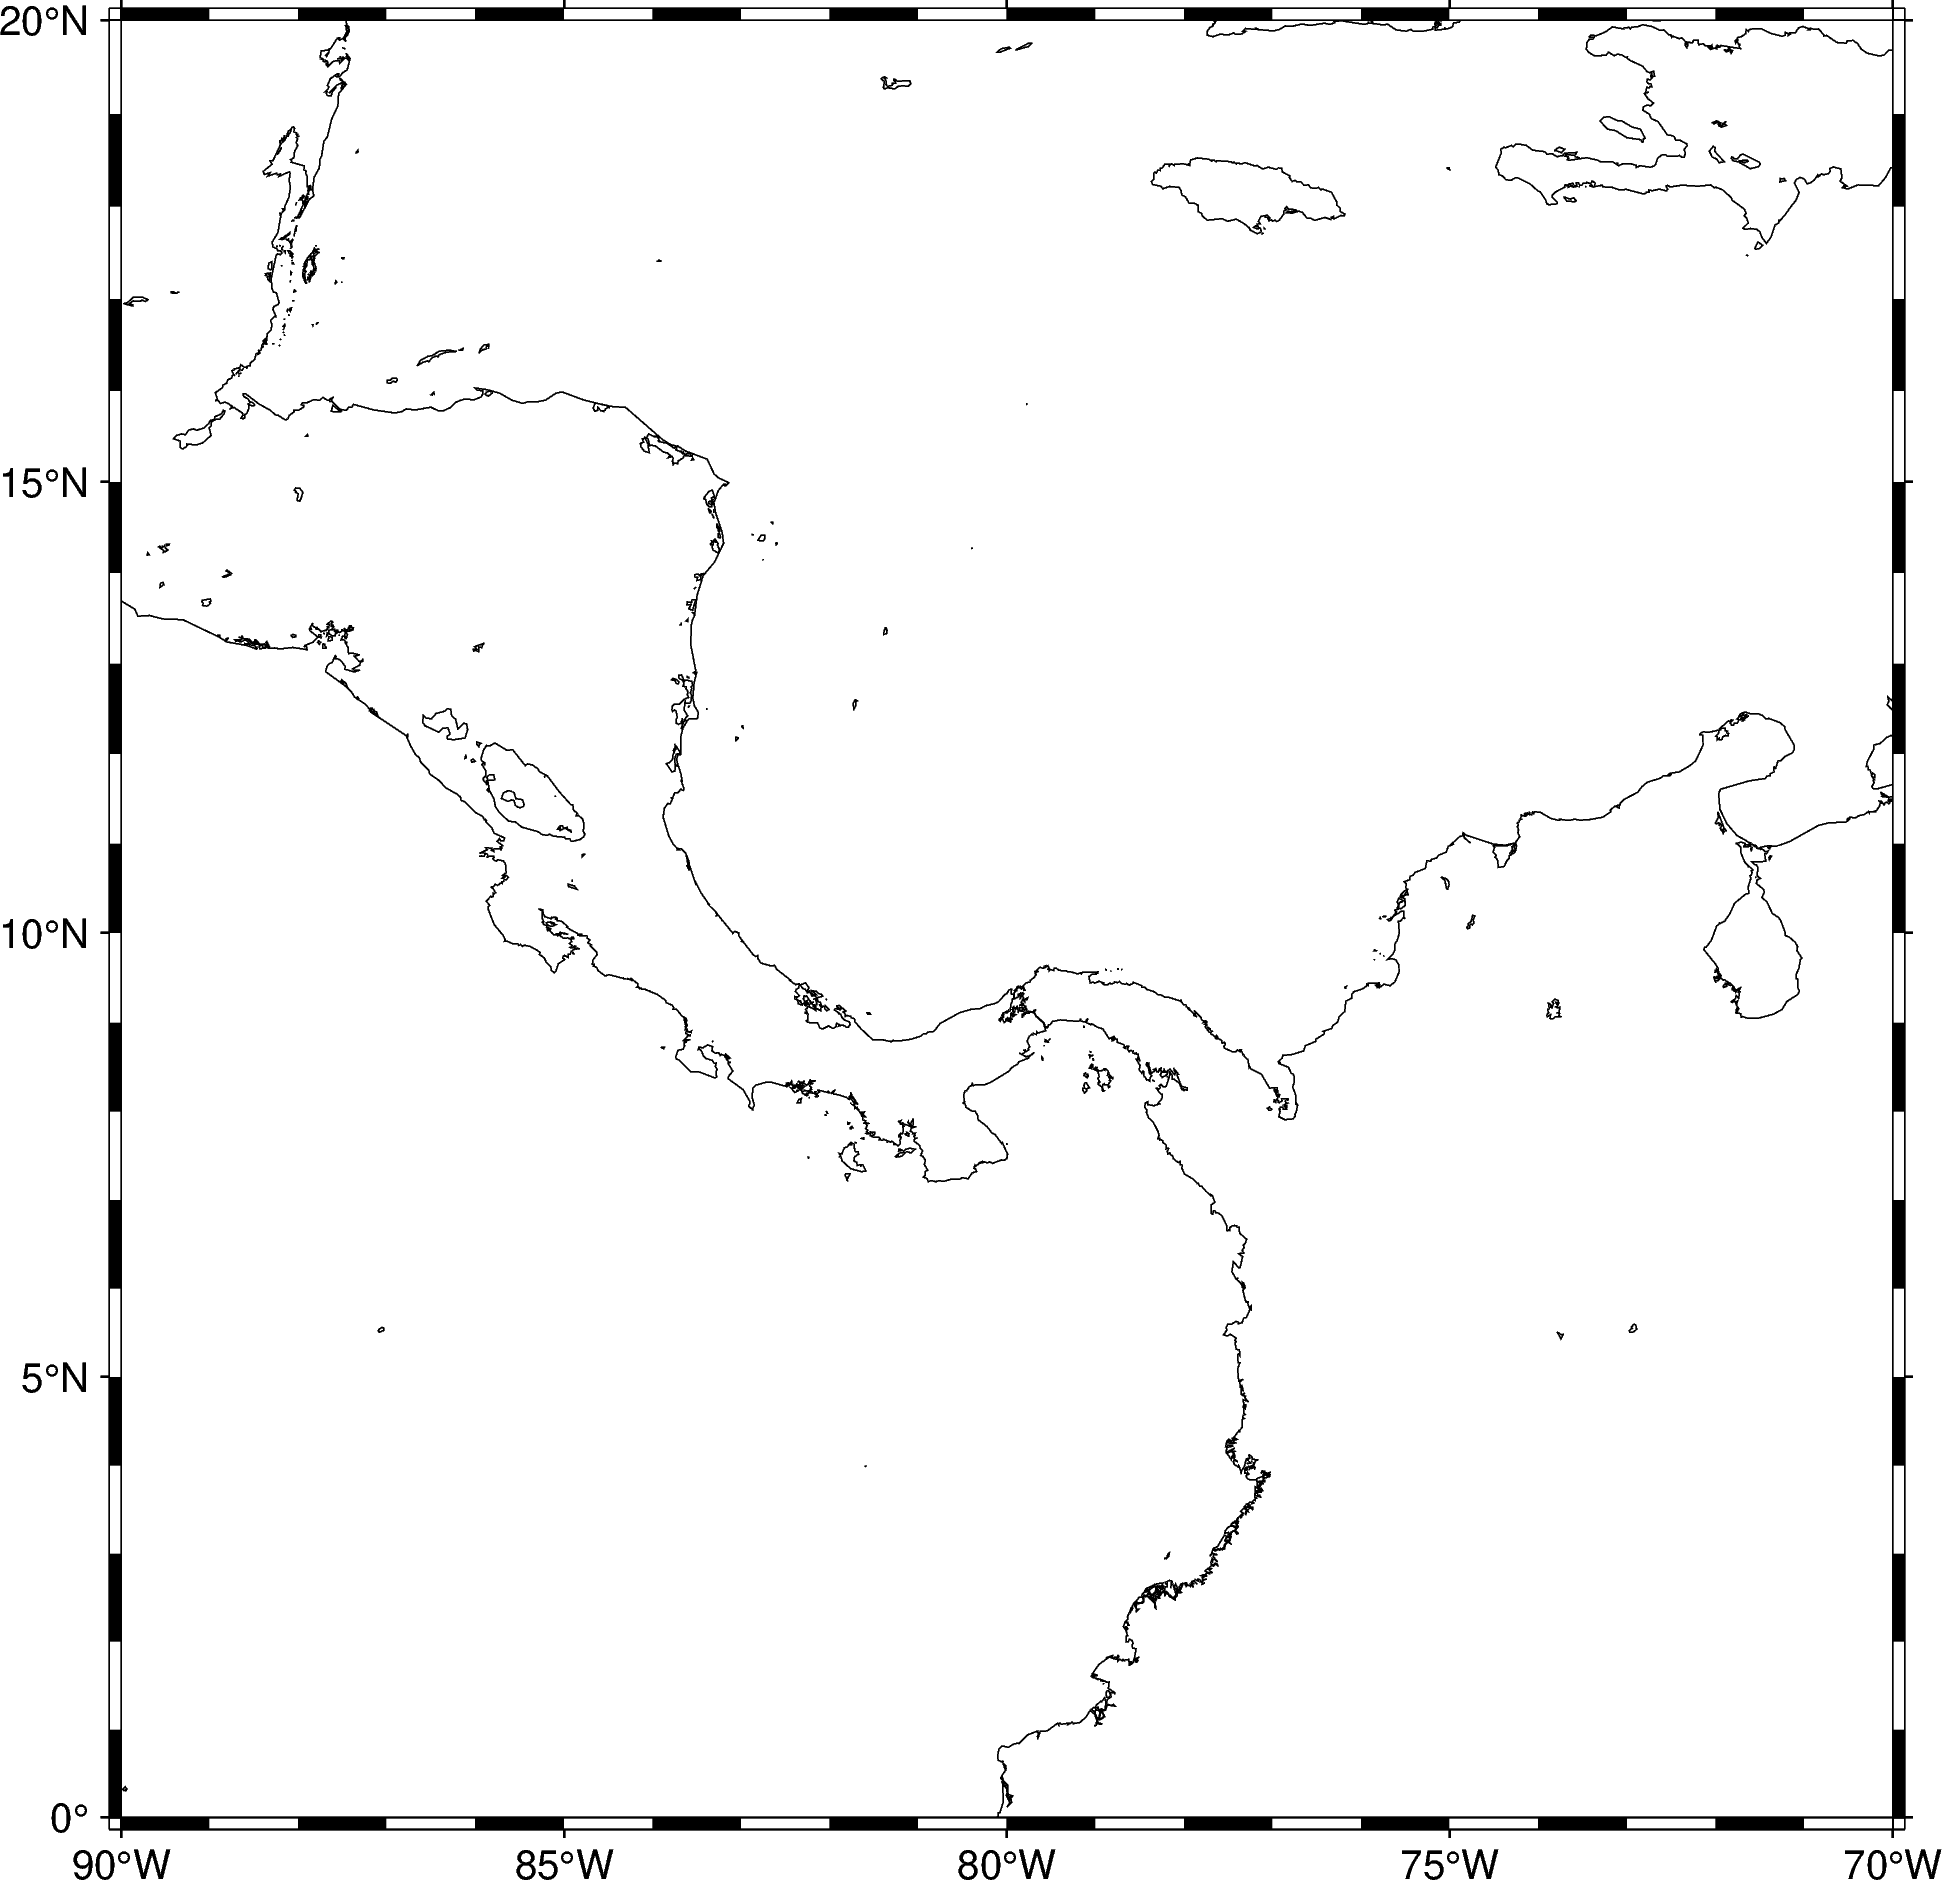

In [3]:
fig.show()

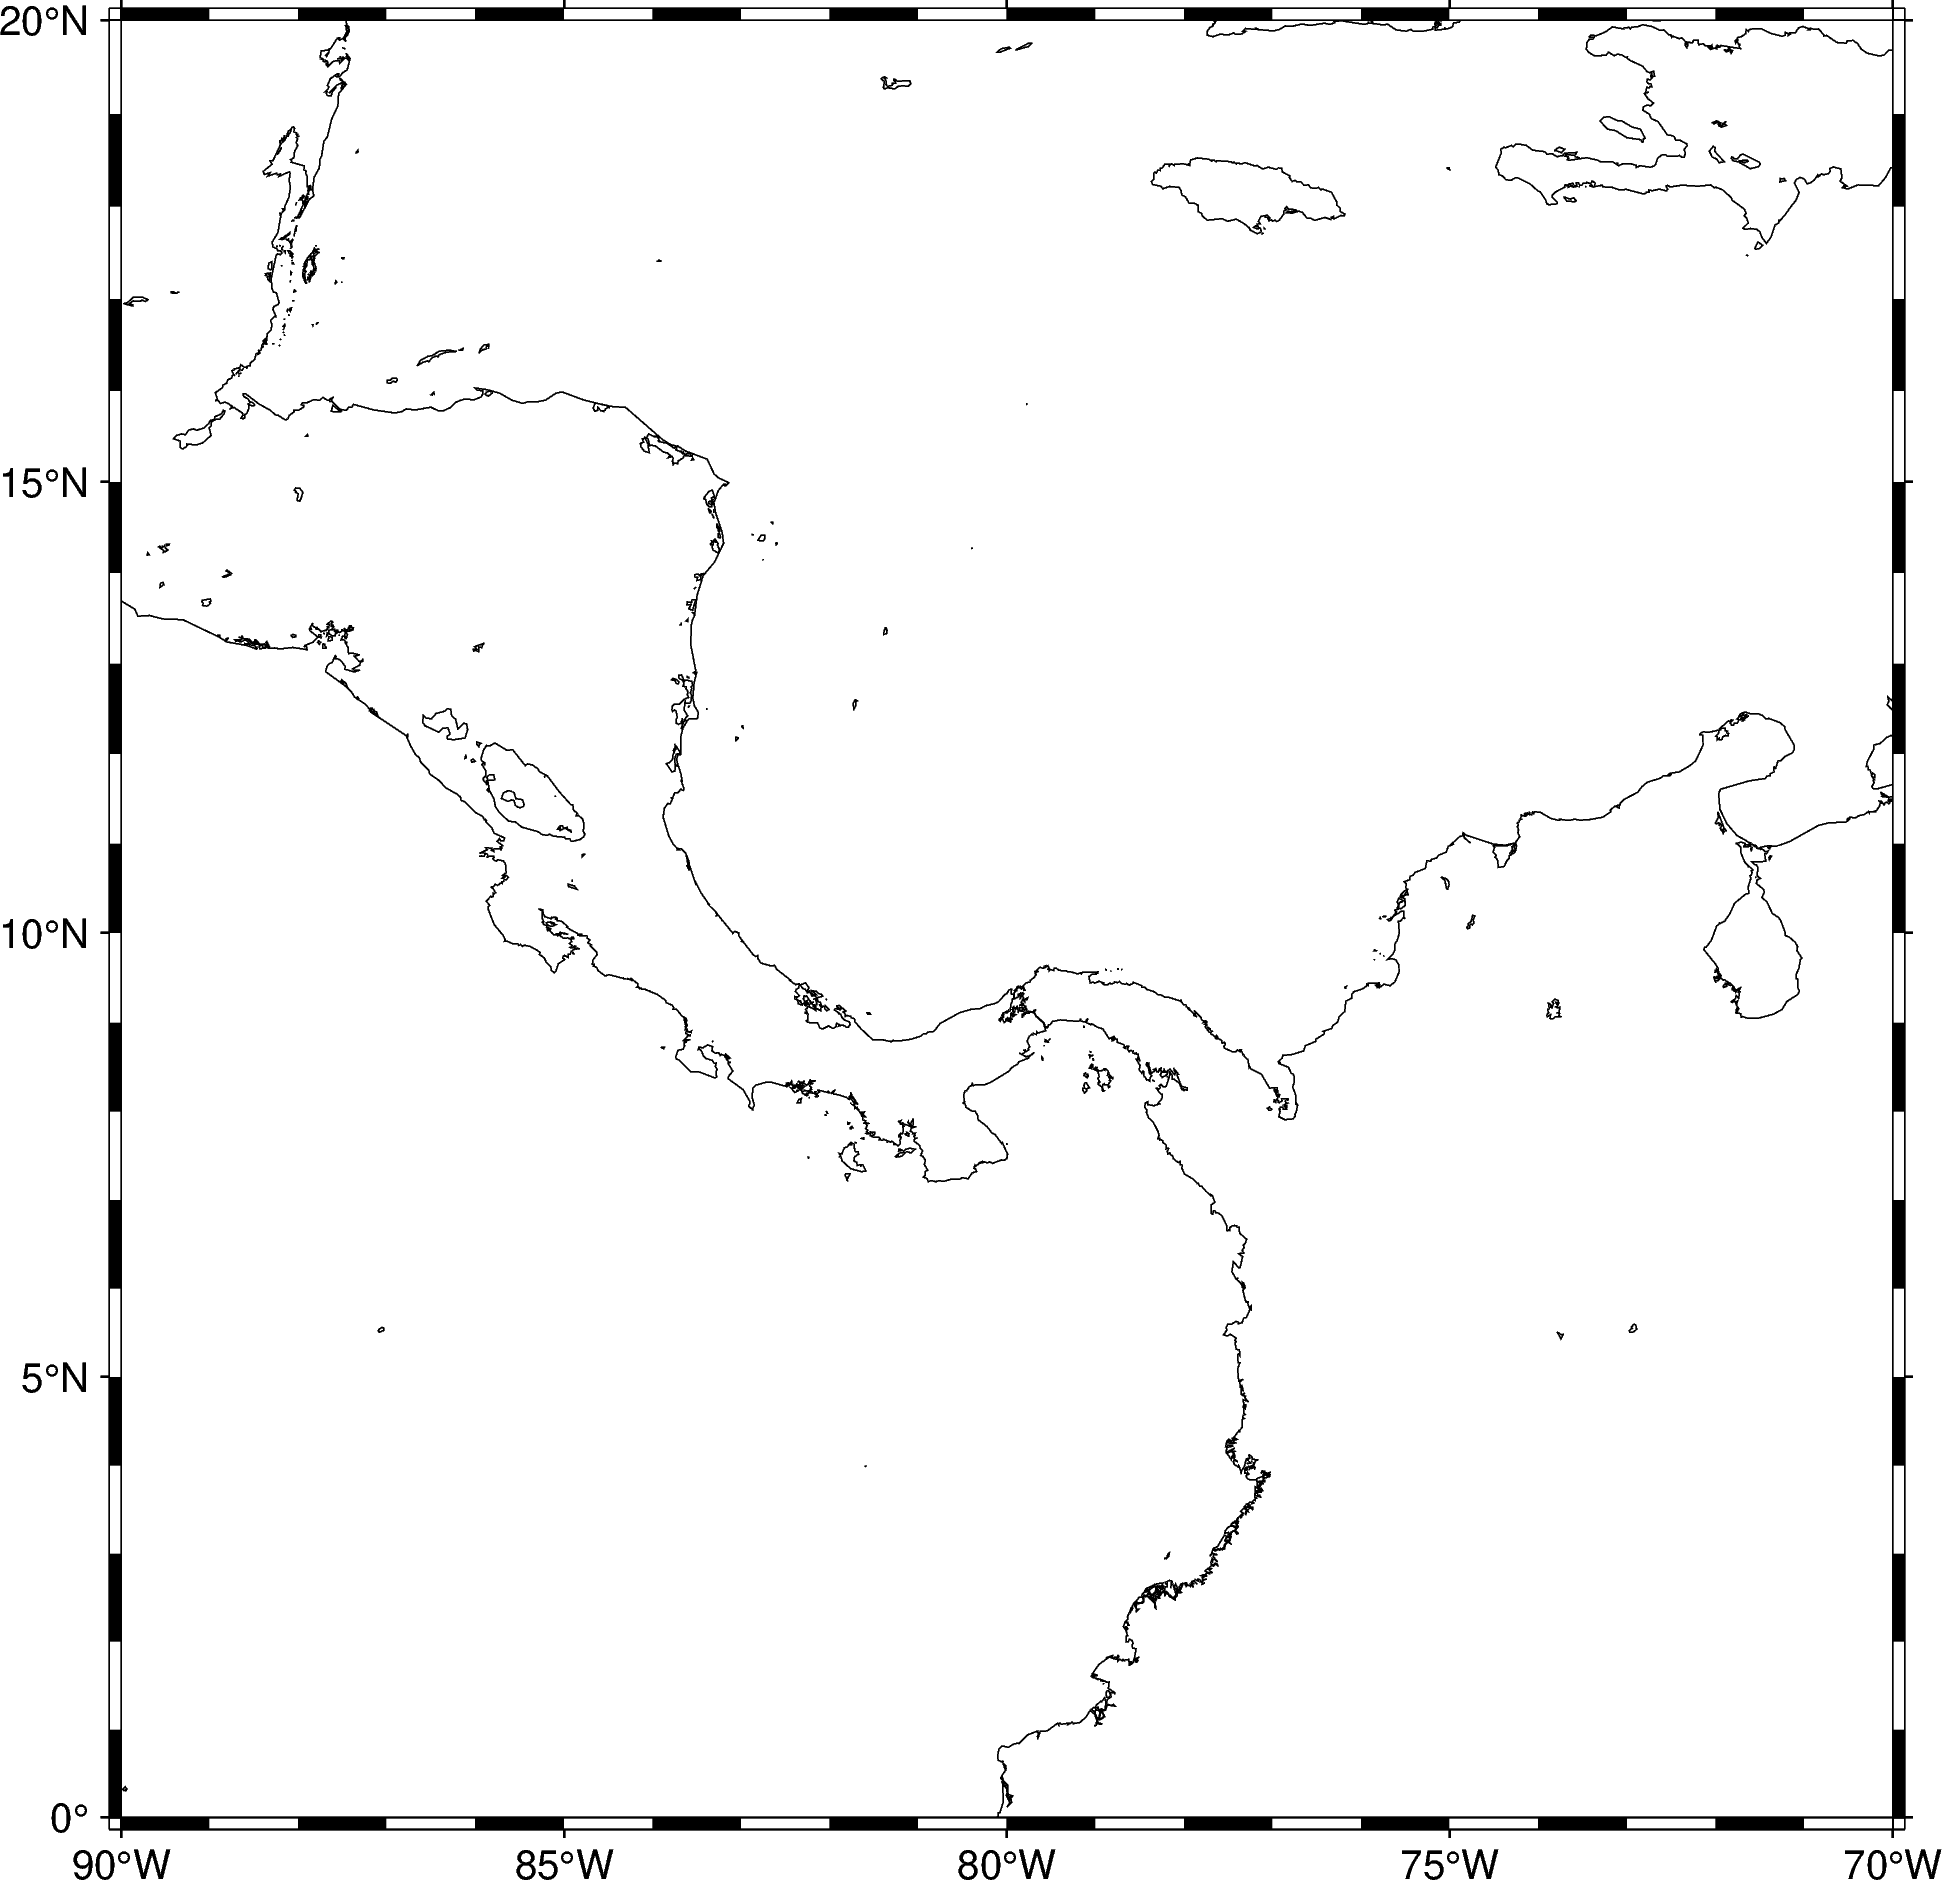

In [4]:
fig = pg.Figure()
fig.coast(shorelines=True, region=[-90,-70,0,20], projection='M15c', frame=True)
fig.show()

In [5]:
# fig.savefig('figure.png')

## Examples

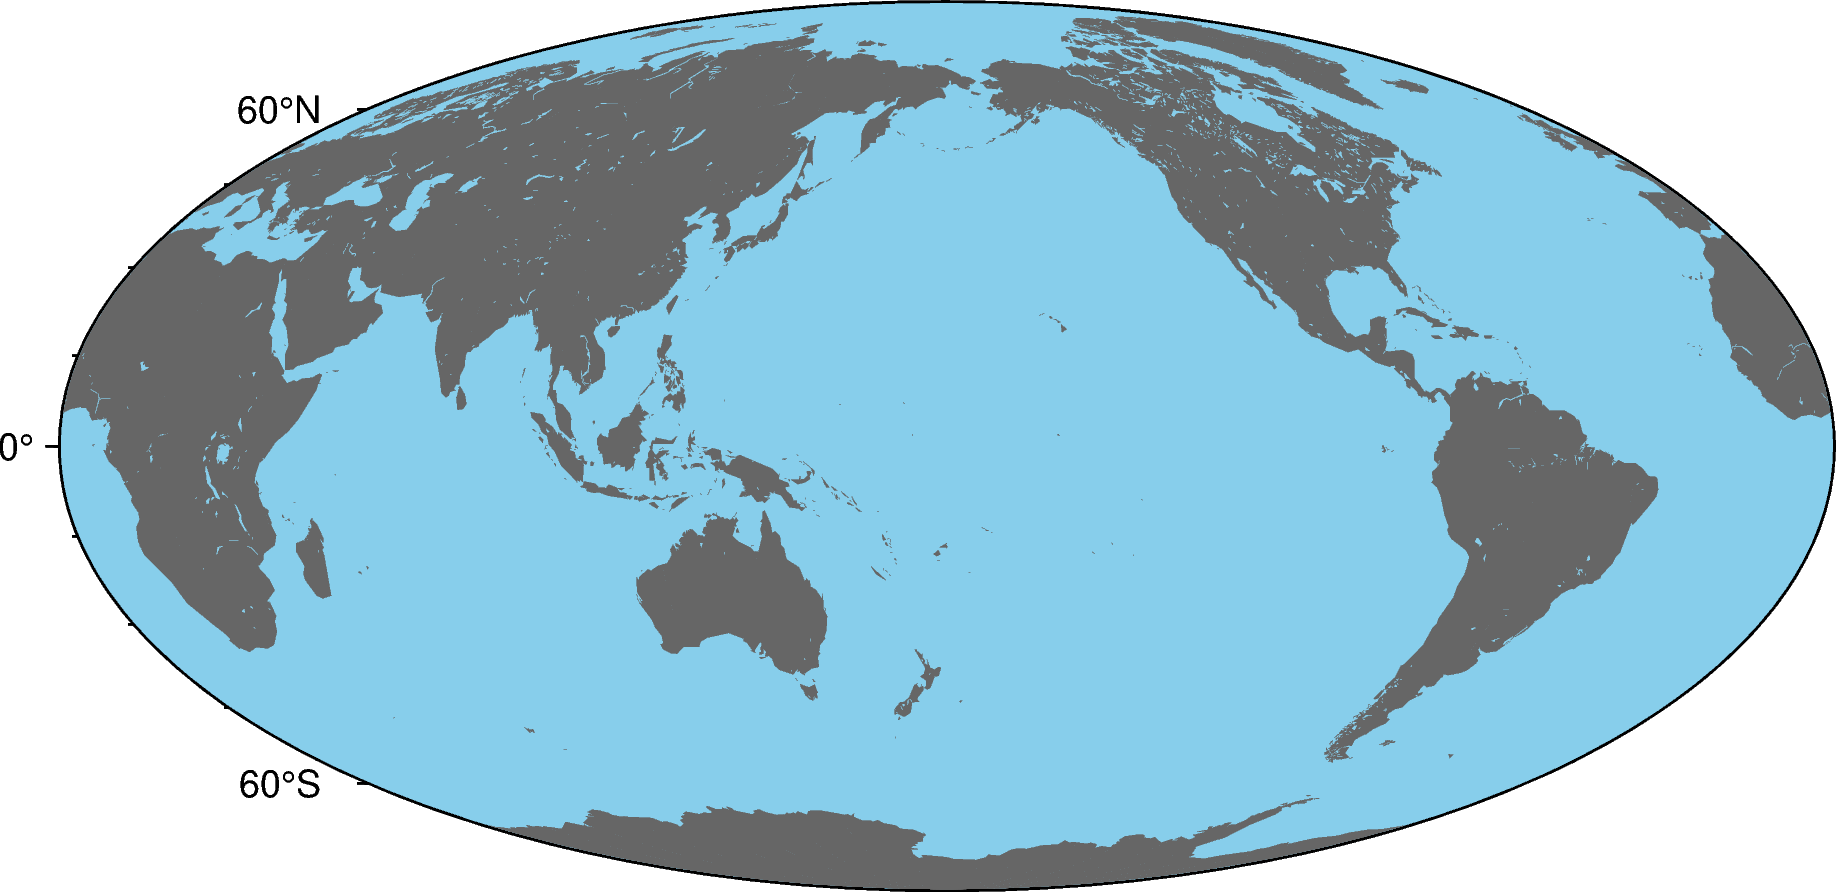

In [6]:
fig = pg.Figure()
#Make a global Mollweide map with automatic ticks
fig.basemap(region='g',projection='W15c',frame=True)
#plot the land as light gray and the water as sky blue
fig.coast(land='#666666',water='skyblue')
fig.show()

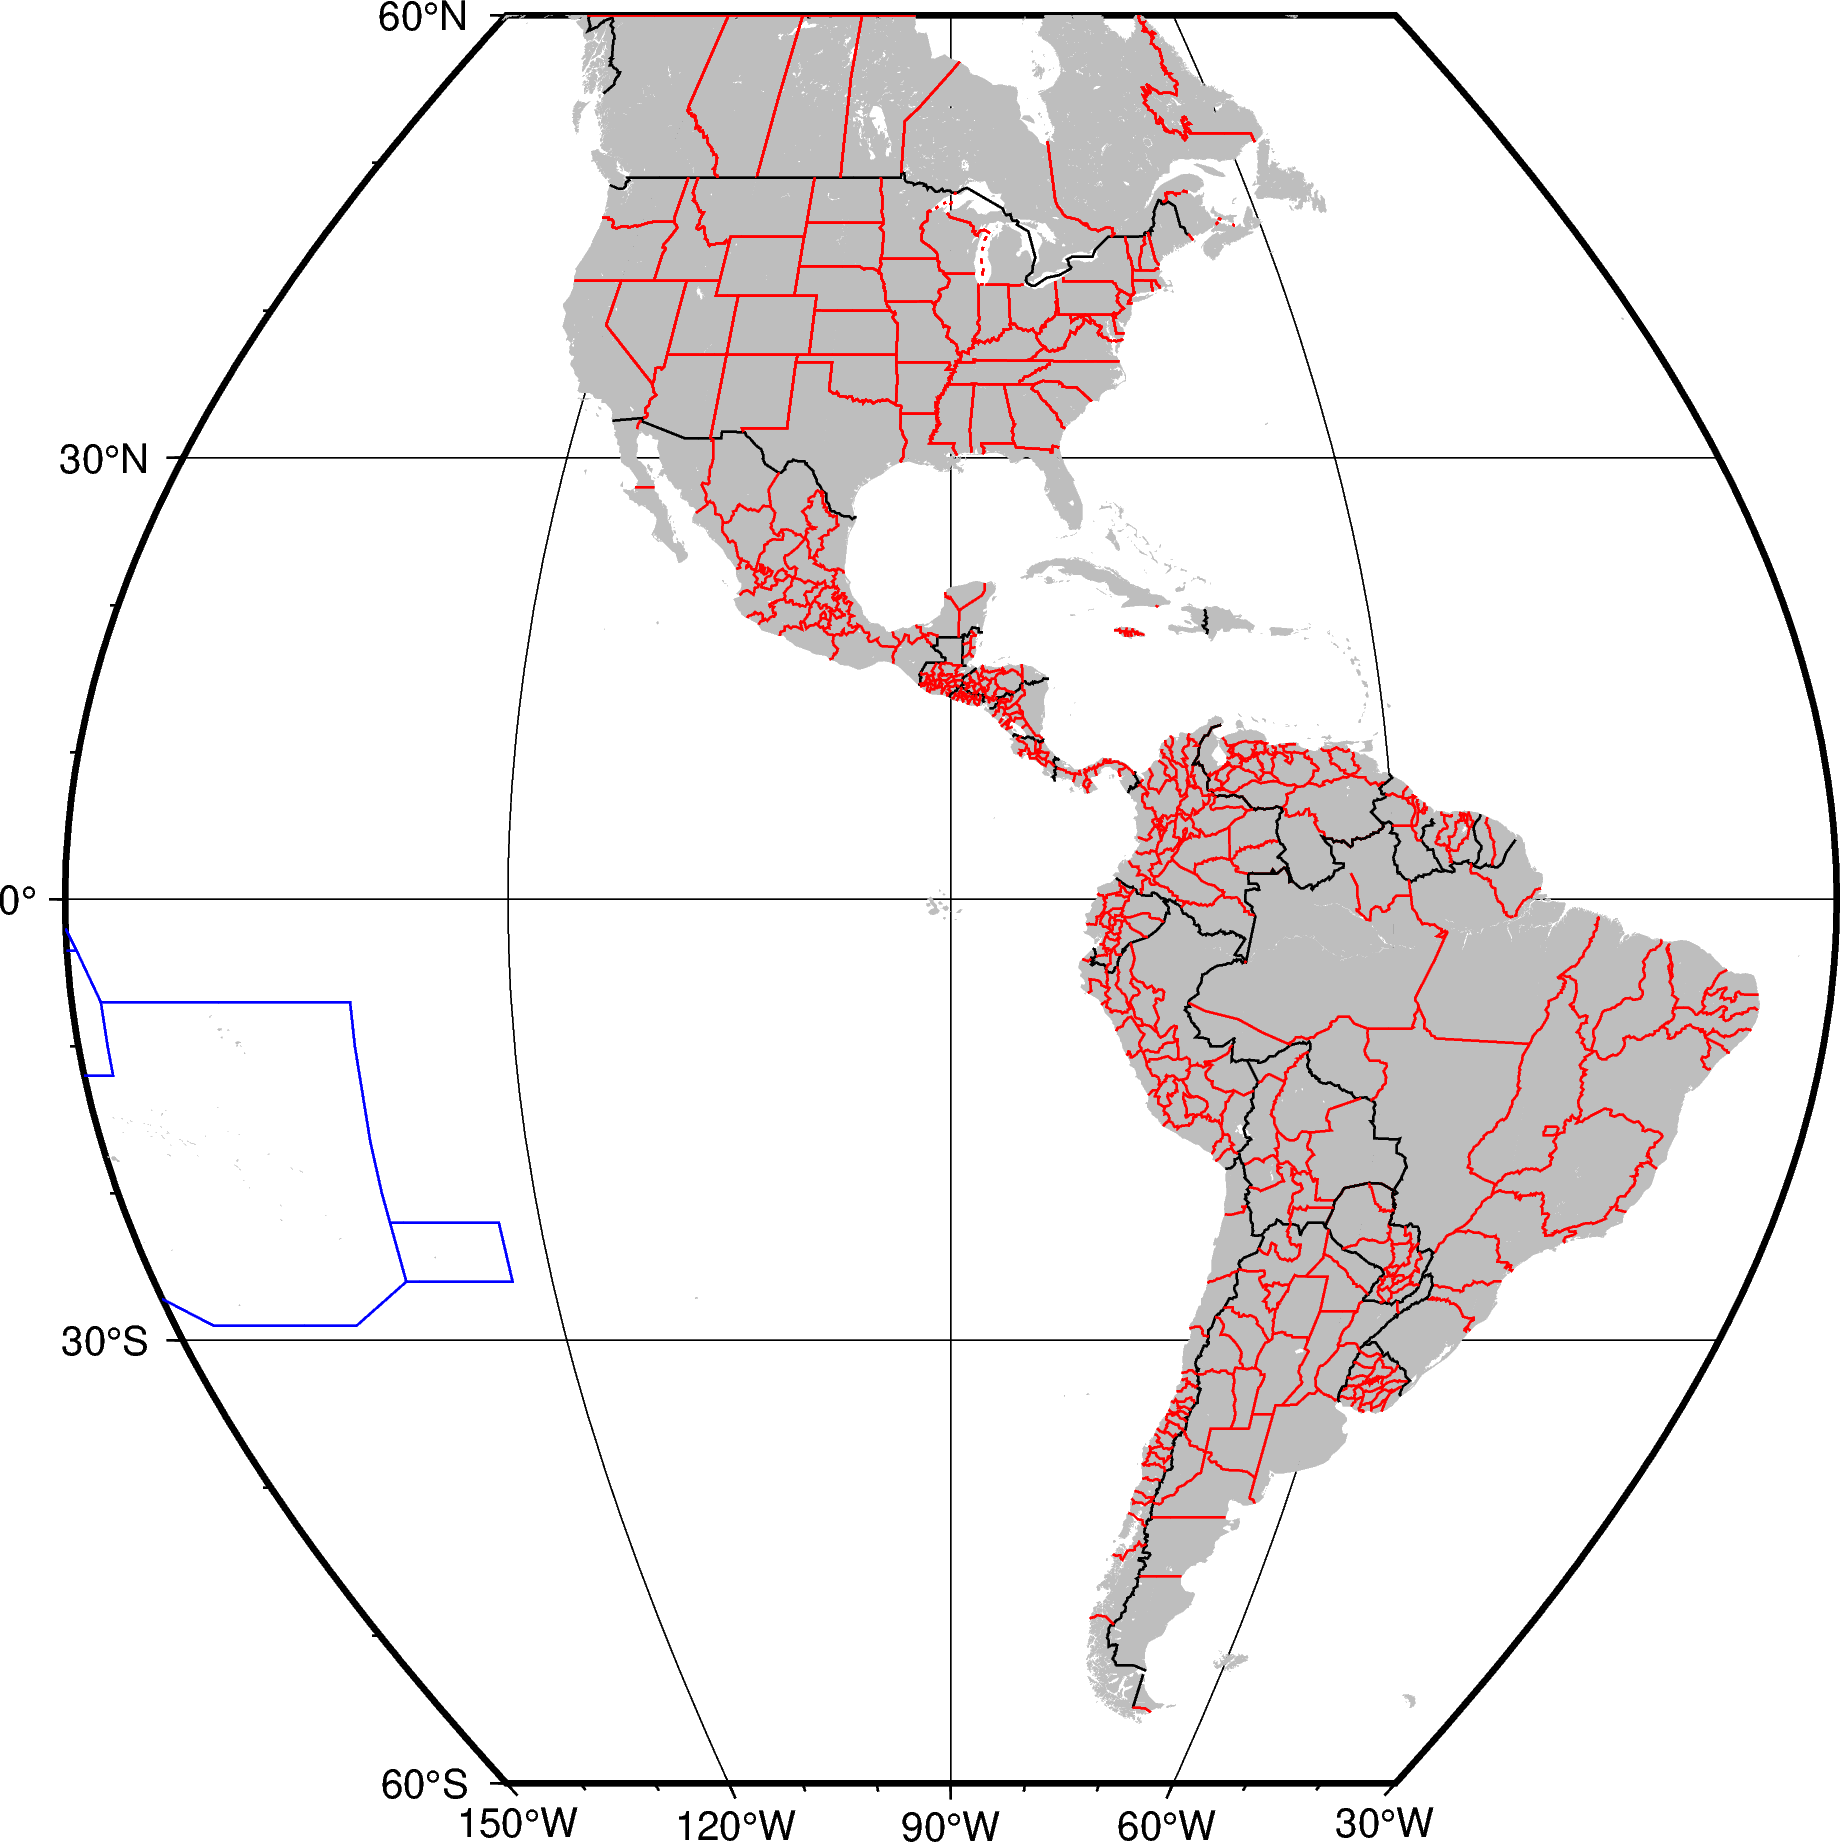

In [7]:
fig = pg.Figure()
#Make a Sinusoidal projection map of the Americas with automatic annotations,
#ticks and gridlines
fig.basemap(region=[-150,-30,-60,60], projection='I-90/15c', frame='afg')
#plot each level of the boundaries dataset with a different color
fig.coast(borders=["1/0.5p,black","2/0.5p,red","3/0.5p,blue"],land='gray')
fig.show()

##NOTE (borders=)
#1 = National boundaries
#2 = State boundaries within the Americas
#3 = Marine boundaries
#a = All boundaries (1-3)

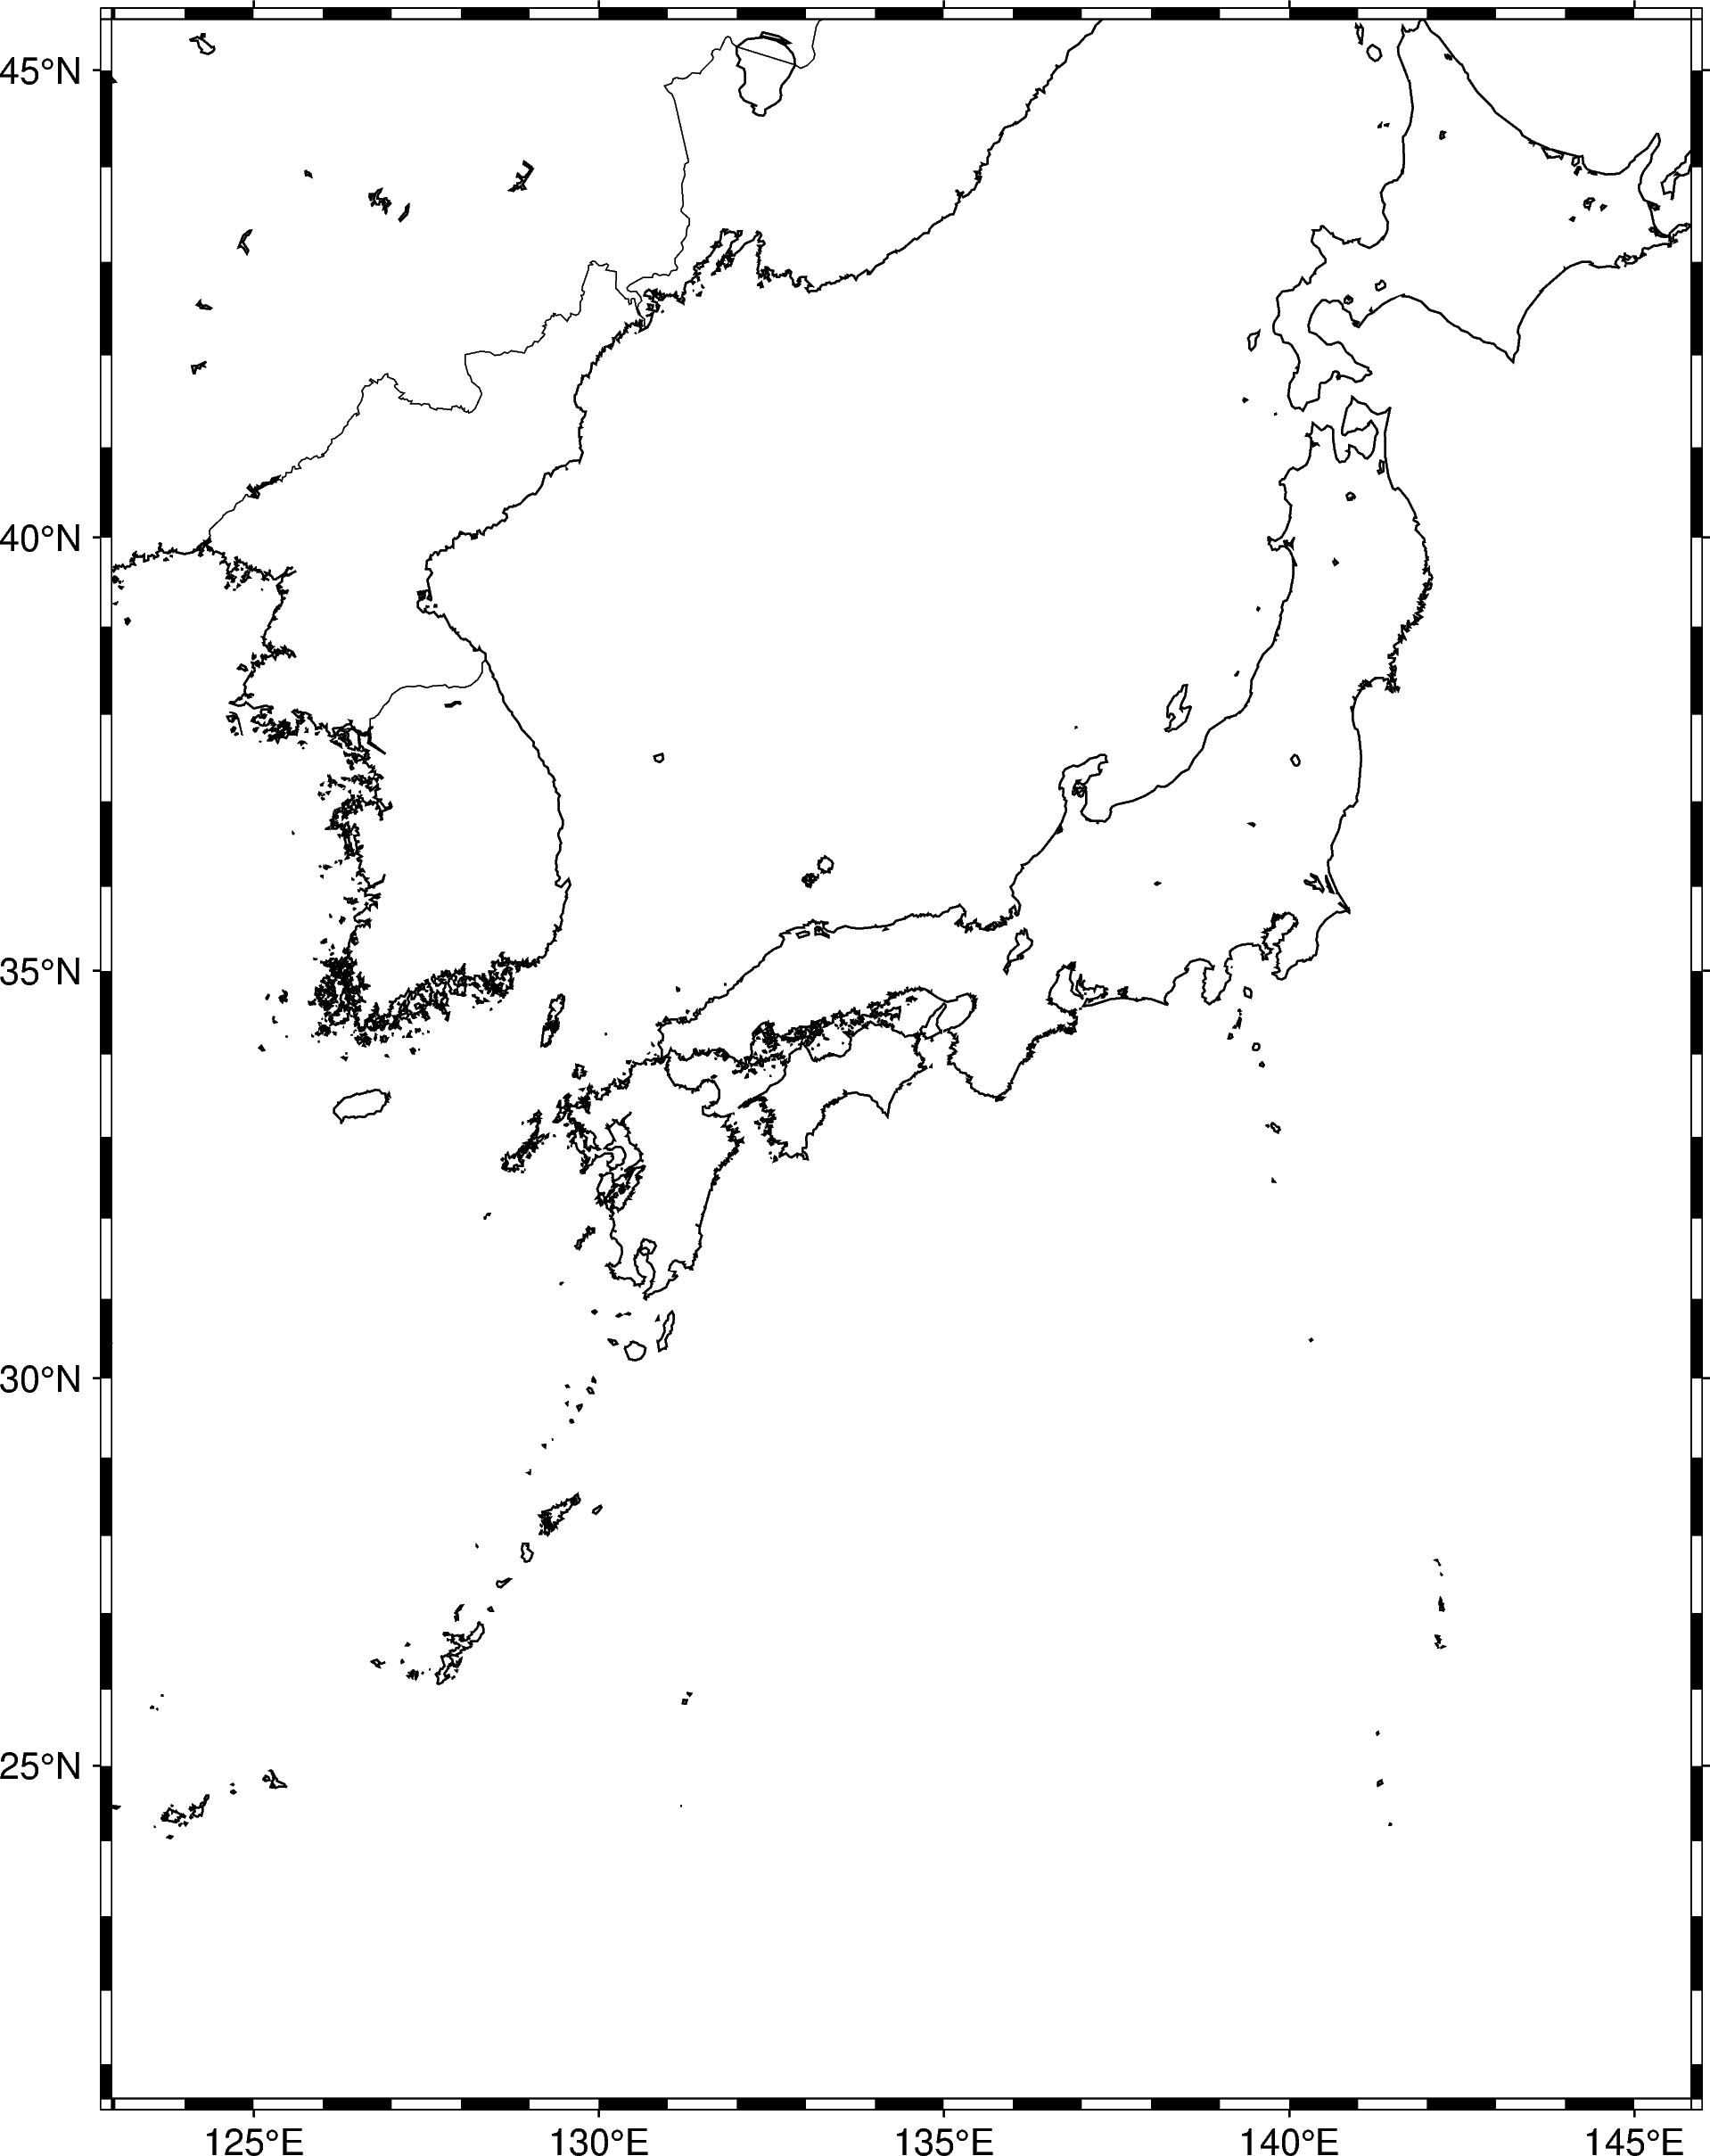

In [15]:
fig = pg.Figure()
#Make a global Mollweide map with automatic ticks
fig.basemap(region='JP', projection='M15c', frame=True)
#Display the shorelines as black lines with 0.5 point thickness
fig.coast(borders=1,shorelines='0.5p,black')
fig.show()


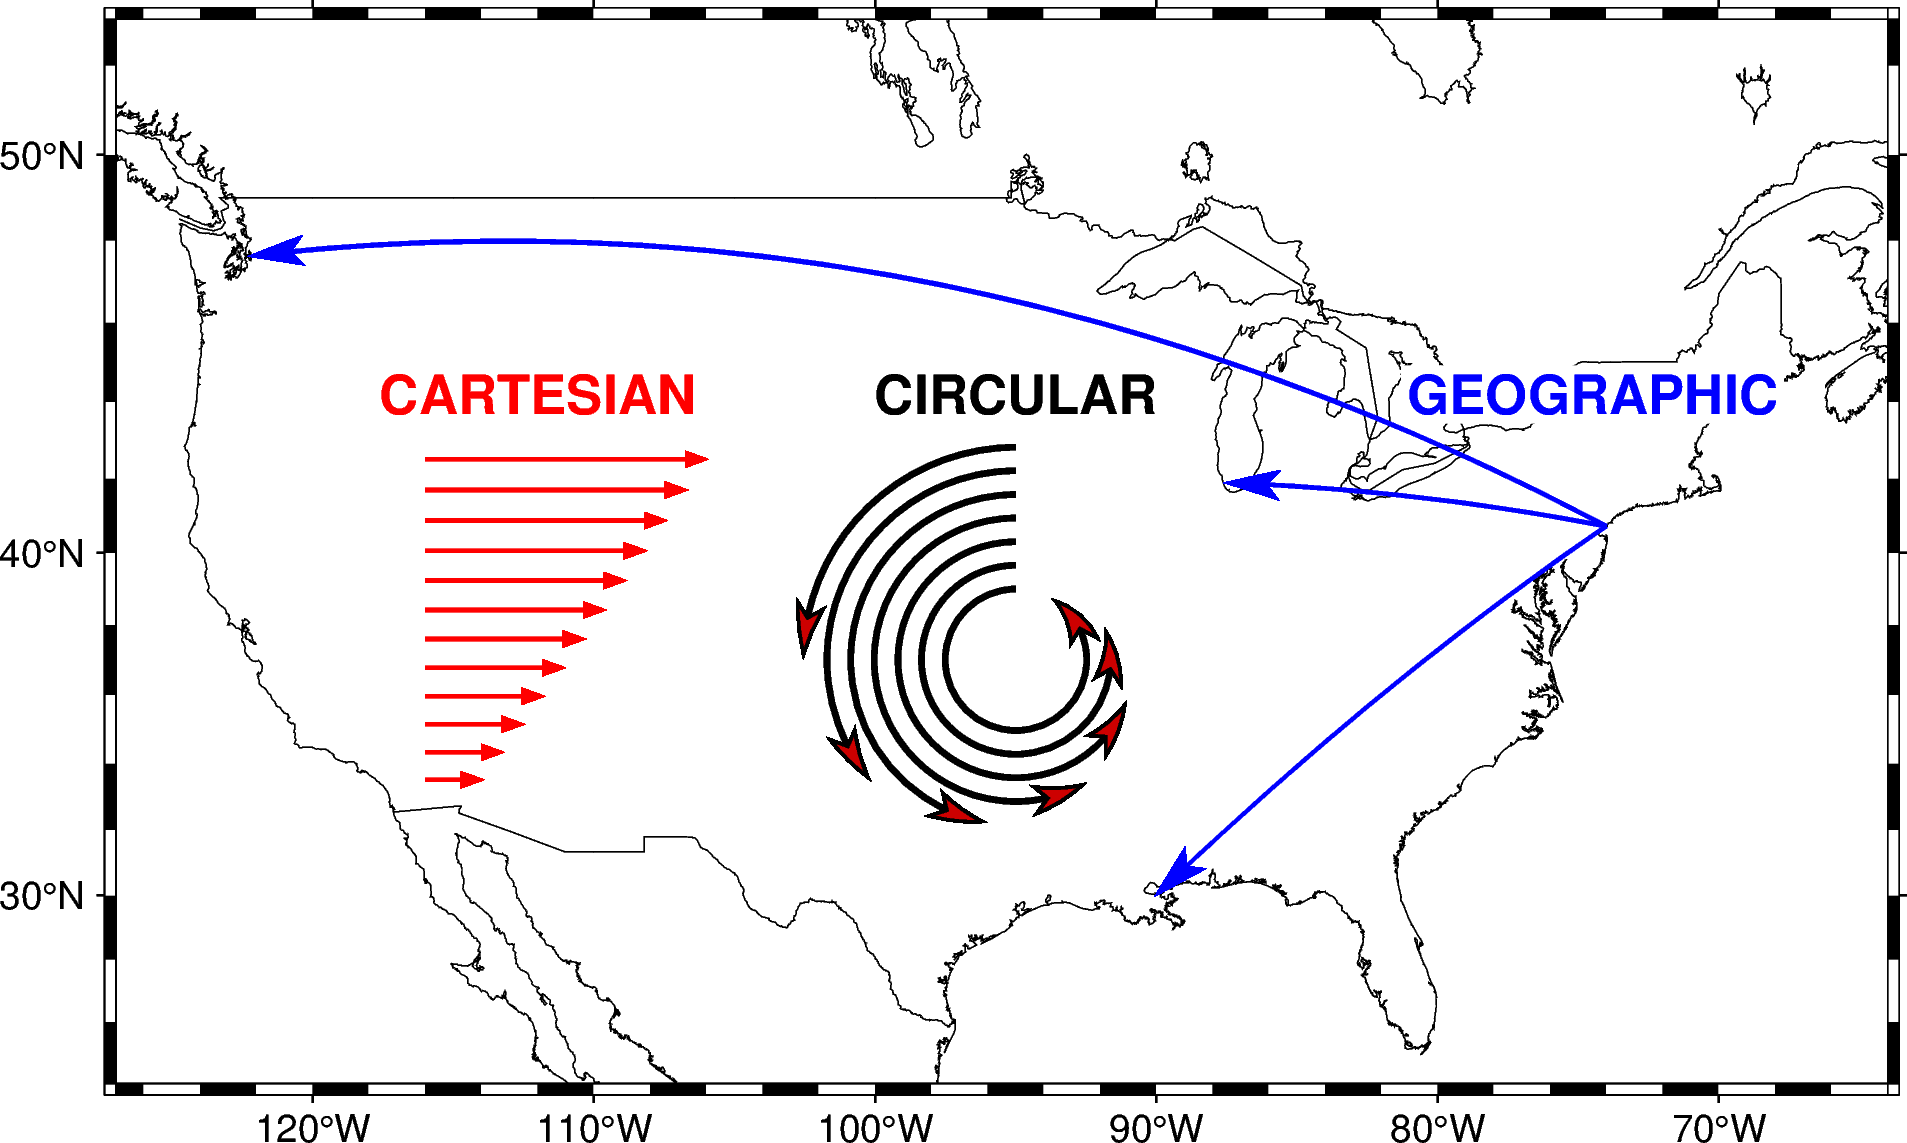

In [21]:
import numpy as np

#create a plot with coast, Mercator projection (M) over the contental US
fig = pg.Figure()
fig.coast(region=[-127,-64,24,53],projection='M15c',frame=True,borders=1,area_thresh=4000,shorelines='0.25p,black')

#Left: plot 12 Cartesian vectors with different lengths
x = np.linspace(-116,-116,12) #x vector coords 
y = np.linspace(33.5,42.5,12) #y vector coords
direction = np.zeros(x.shape) #directions of vectors
length = np.linspace(0.5,2.4,12) #lenght vectors
#Cartesian vectors (v) with red pen and fill (+g,+p) vector head at
# end (+e), and 40 degree angle (+a) with no indentation for vector head (+h)
style = 'v0.2c+e+a40+gred+h0+p1p,red'
fig.plot(x=x,y=y,style=style,pen='1p,red',direction=[direction,length])
fig.text(text='CARTESIAN',x=-112,y=44.2,font='13p,Helvetica-Bold,red',fill='white')

# Middle: plot 7 math angle arcs with different radii
num = 7
x = np.full(num, -95)  # x coordinates of the center
y = np.full(num, 37)  # y coordinates of the center
radius = 1.8 - 0.2 * np.arange(0, num)  # radius
startdir = np.full(num, 90)  # start direction in degrees
stopdir = 180 + 40 * np.arange(0, num)  # stop direction in degrees
# data for circular vectors
data = np.column_stack([x, y, radius, startdir, stopdir])
arcstyle = "m0.5c+ea"  # Circular vector (m) with an arrow at end
fig.plot(data=data, style=arcstyle, color="red3", pen="1.5p,black")
fig.text(text="CIRCULAR", x=-95, y=44.2, font="13p,Helvetica-Bold,black", fill="white")

# Right: plot geographic vectors using endpoints
NYC = [-74.0060, 40.7128]
CHI = [-87.6298, 41.8781]
SEA = [-122.3321, 47.6062]
NO = [-90.0715, 29.9511]
# `=` means geographic vectors.
# With the modifier '+s', the input data should contain coordinates of start
# and end points
style = "=0.5c+s+e+a30+gblue+h0.5+p1p,blue"
data = np.array([NYC + CHI, NYC + SEA, NYC + NO])
fig.plot(data=data, style=style, pen="1.0p,blue")
fig.text(
    text="GEOGRAPHIC", x=-74.5, y=44.2, font="13p,Helvetica-Bold,blue", fill="white"
)

fig.show()

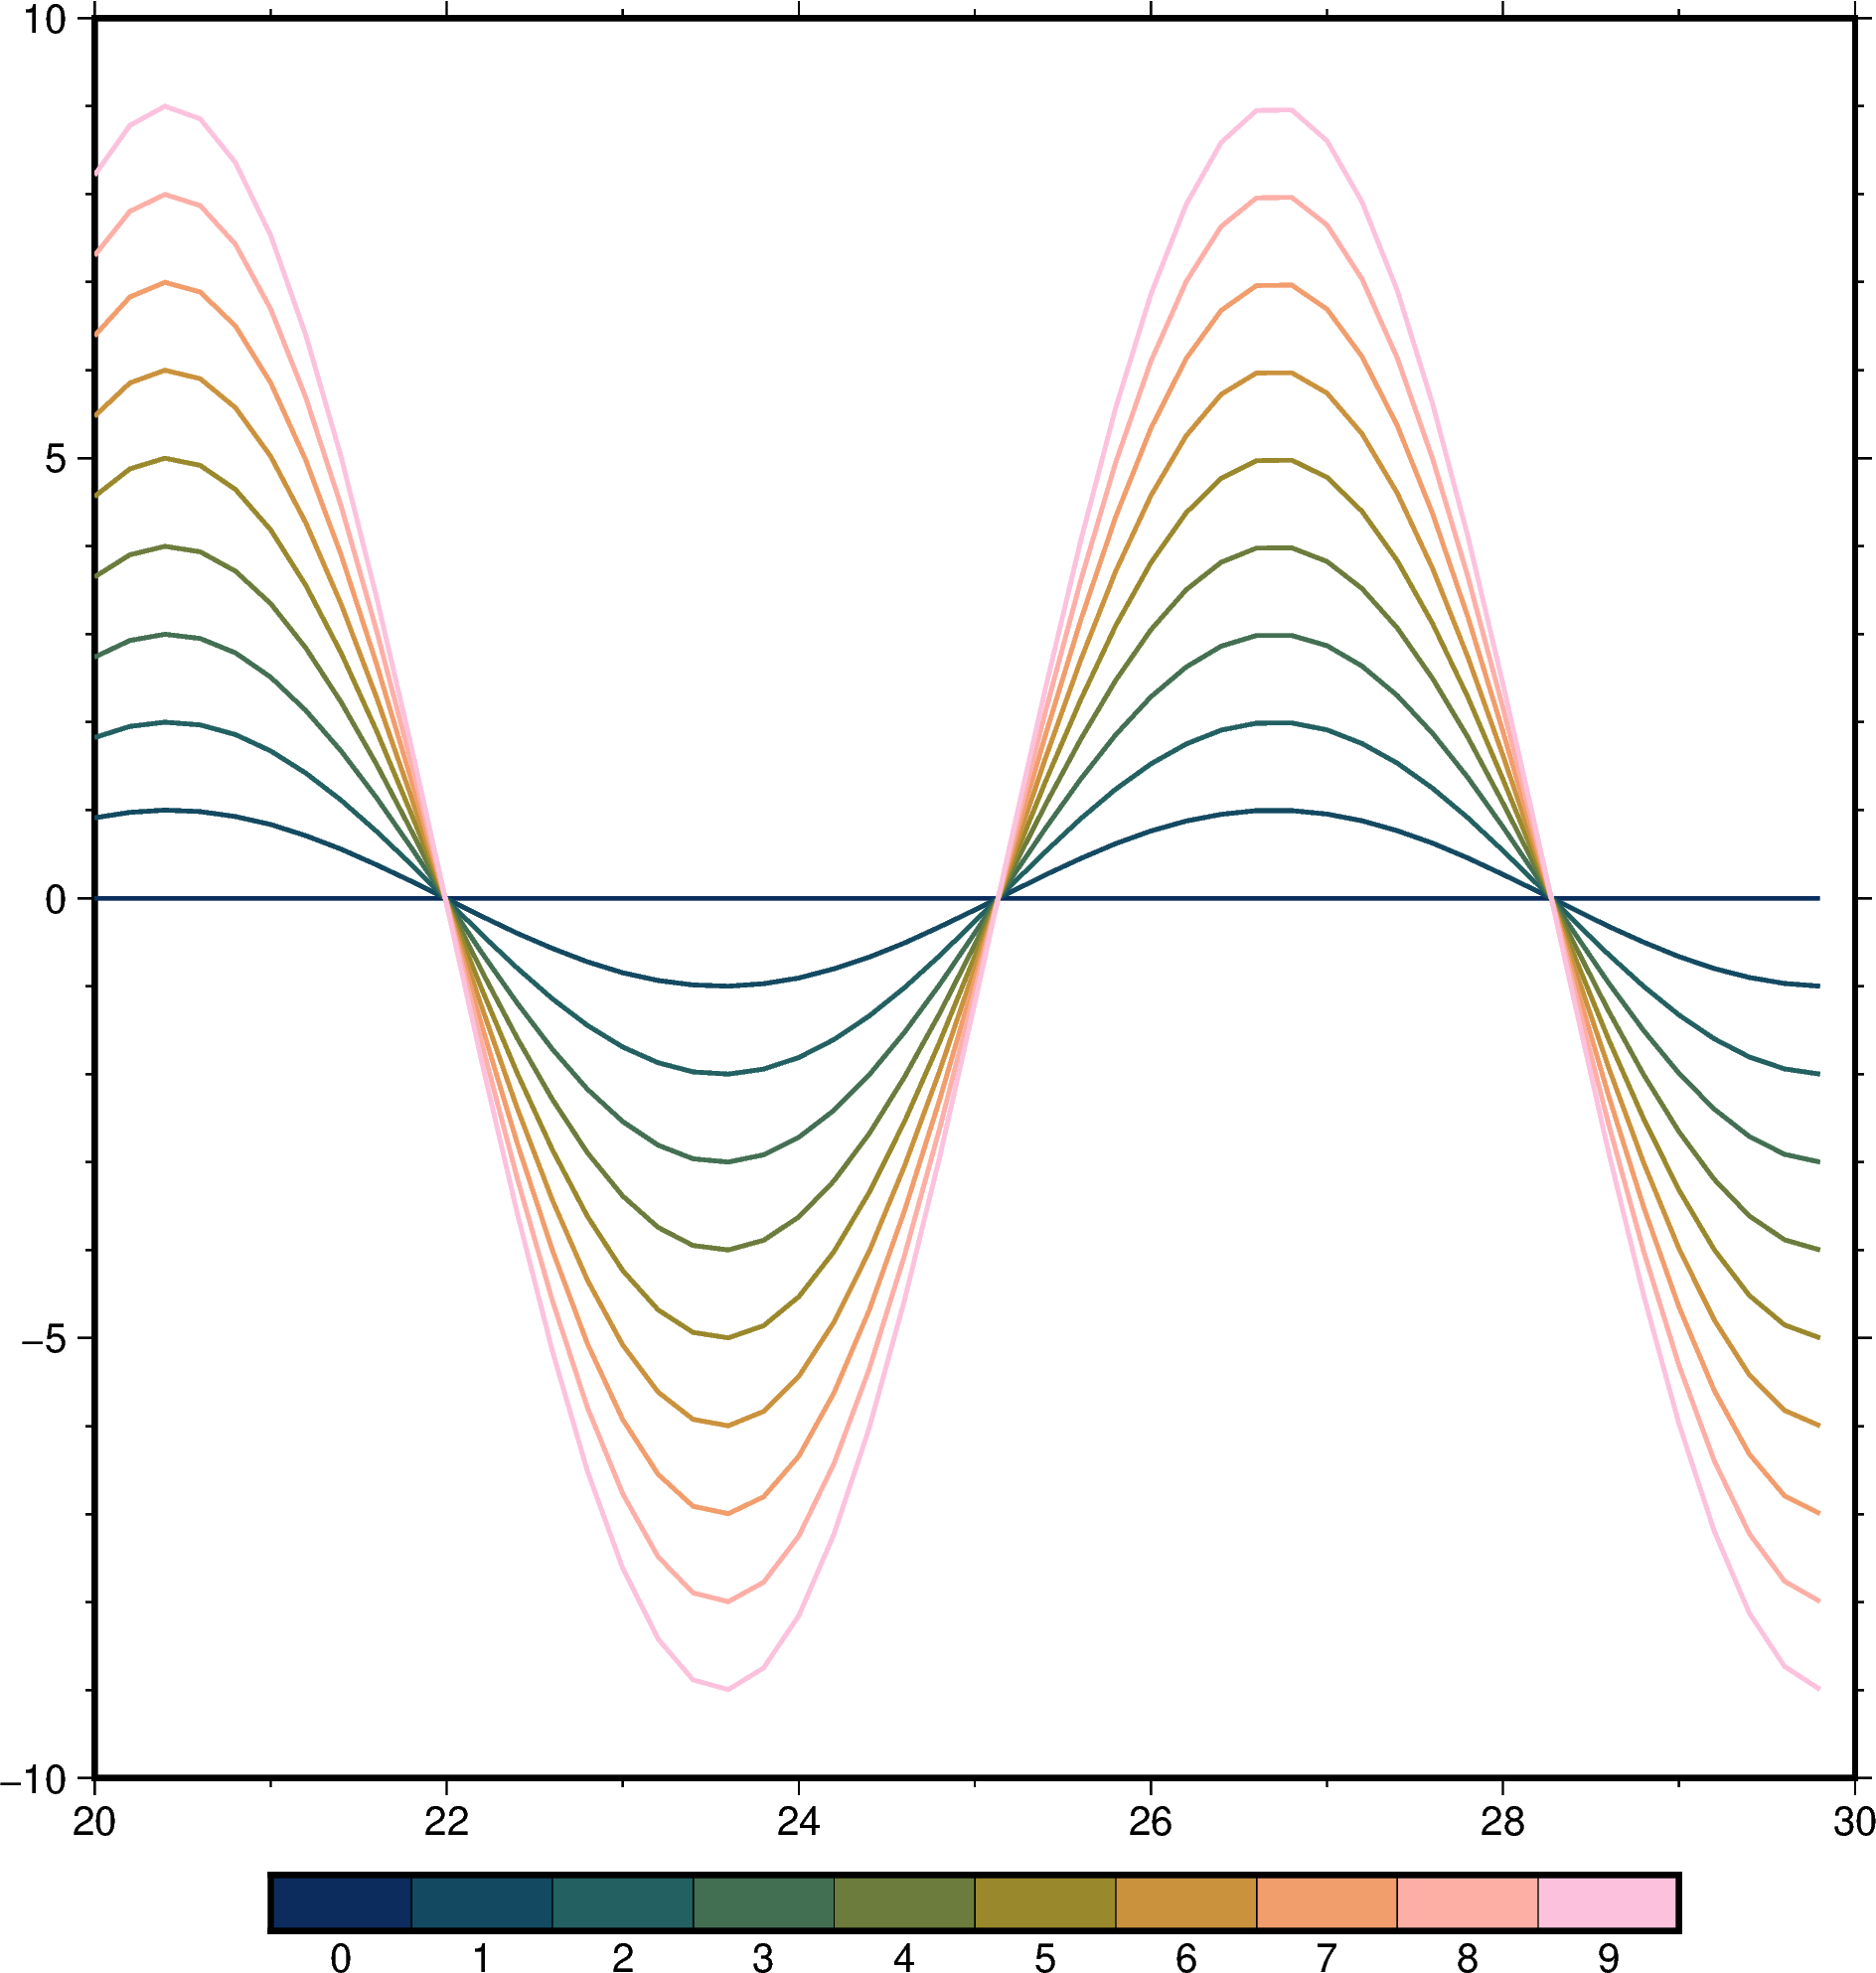

In [23]:
# Create a list of values between 20 and 30 with 0.2 intervals
x = np.arange(start=20, stop=30, step=0.2)

fig = pg.Figure()
fig.basemap(frame=["WSne", "af"], region=[20, 30, -10, 10])

# Create a custom CPT with the batlow CPT and 10 discrete z-values (colors),
# use color_model="+c0-9" to write the color palette in categorical format and
# add labels (0) to (9) for the colorbar legend
pg.makecpt(cmap="batlow", series=[0, 9, 1], color_model="+c0-9")

# Plot 10 lines and set a different z-value for each line
for zvalue in range(0, 10):
    y = zvalue * np.sin(x)
    fig.plot(x=x, y=y, cmap=True, zvalue=zvalue, pen="thick,+z,-")

# Color bar to show the custom CPT and the associated z-values
fig.colorbar()
fig.show()

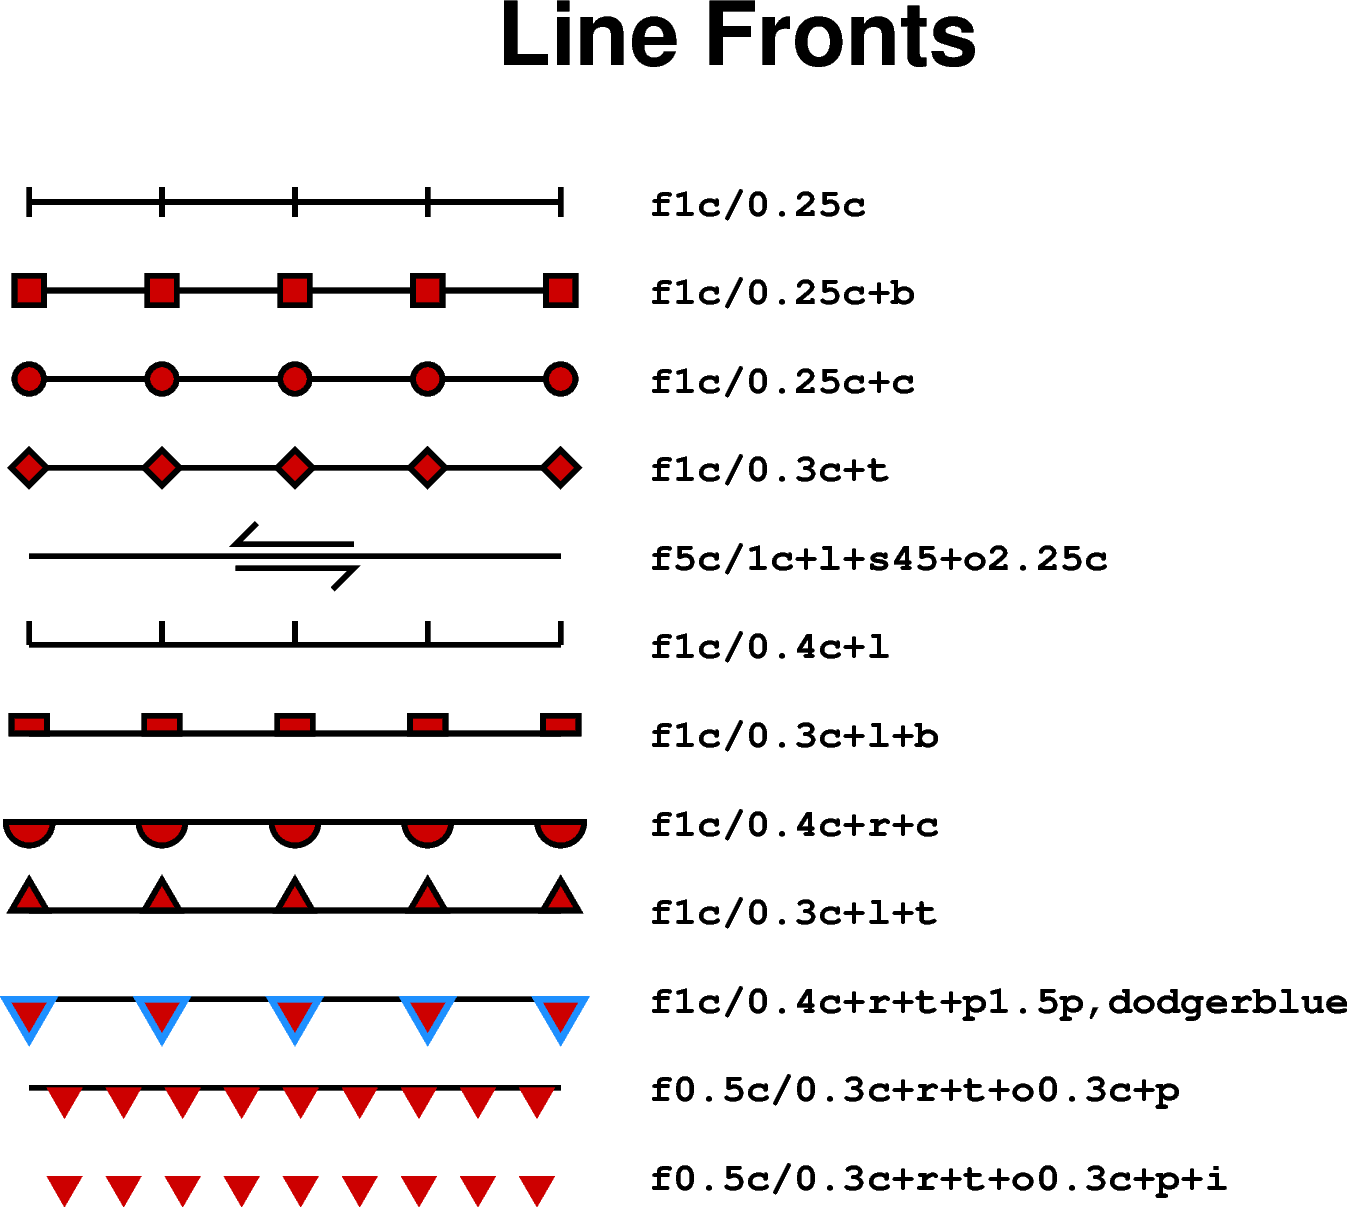

In [24]:
# Generate a two-point line for plotting
x = np.array([1, 4])
y = np.array([20, 20])

fig = pg.Figure()
fig.basemap(region=[0, 10, 0, 20], projection="X15c/15c", frame='+t"Line Fronts"')

# Plot the line using different front styles
for frontstyle in [
    # line with "faults" front style, same as +f (default)
    "f1c/0.25c",
    # line with box front style
    "f1c/0.25c+b",
    # line with circle front style
    "f1c/0.25c+c",
    # line with triangle front style
    "f1c/0.3c+t",
    # line with left-lateral ("+l") slip ("+s") front style, angle is set to 45
    # and offset to 2.25 cm
    "f5c/1c+l+s45+o2.25c",
    # line with "faults" front style, symbols are plotted on the left side of
    # the front
    "f1c/0.4c+l",
    # line with box front style, symbols are plotted on the left side of the
    # front
    "f1c/0.3c+l+b",
    # line with circle front style, symbols are plotted on the right side of
    # the front
    "f1c/0.4c+r+c",
    # line with triangle front style, symbols are plotted on the left side of
    # the front
    "f1c/0.3c+l+t",
    # line with triangle front style, symbols are plotted on the right side of
    # the front, use other pen for the outline of the symbol
    "f1c/0.4c+r+t+p1.5p,dodgerblue",
    # line with triangle front style, symbols are plotted on the right side of
    # the front and offset is set to 0.3 cm, skip the outline
    "f0.5c/0.3c+r+t+o0.3c+p",
    # line with triangle front style, symbols are plotted on the right side of
    # the front and offset is set to 0.3 cm, skip the outline and make the main
    # front line invisible
    "f0.5c/0.3c+r+t+o0.3c+p+i",
]:
    y -= 1  # move the current line down
    fig.plot(x=x, y=y, pen="1.25p", style=frontstyle, color="red3")
    fig.text(
        x=x[-1],
        y=y[-1],
        text=frontstyle,
        font="Courier-Bold",
        justify="ML",
        offset="0.75c/0c",
    )

fig.show()

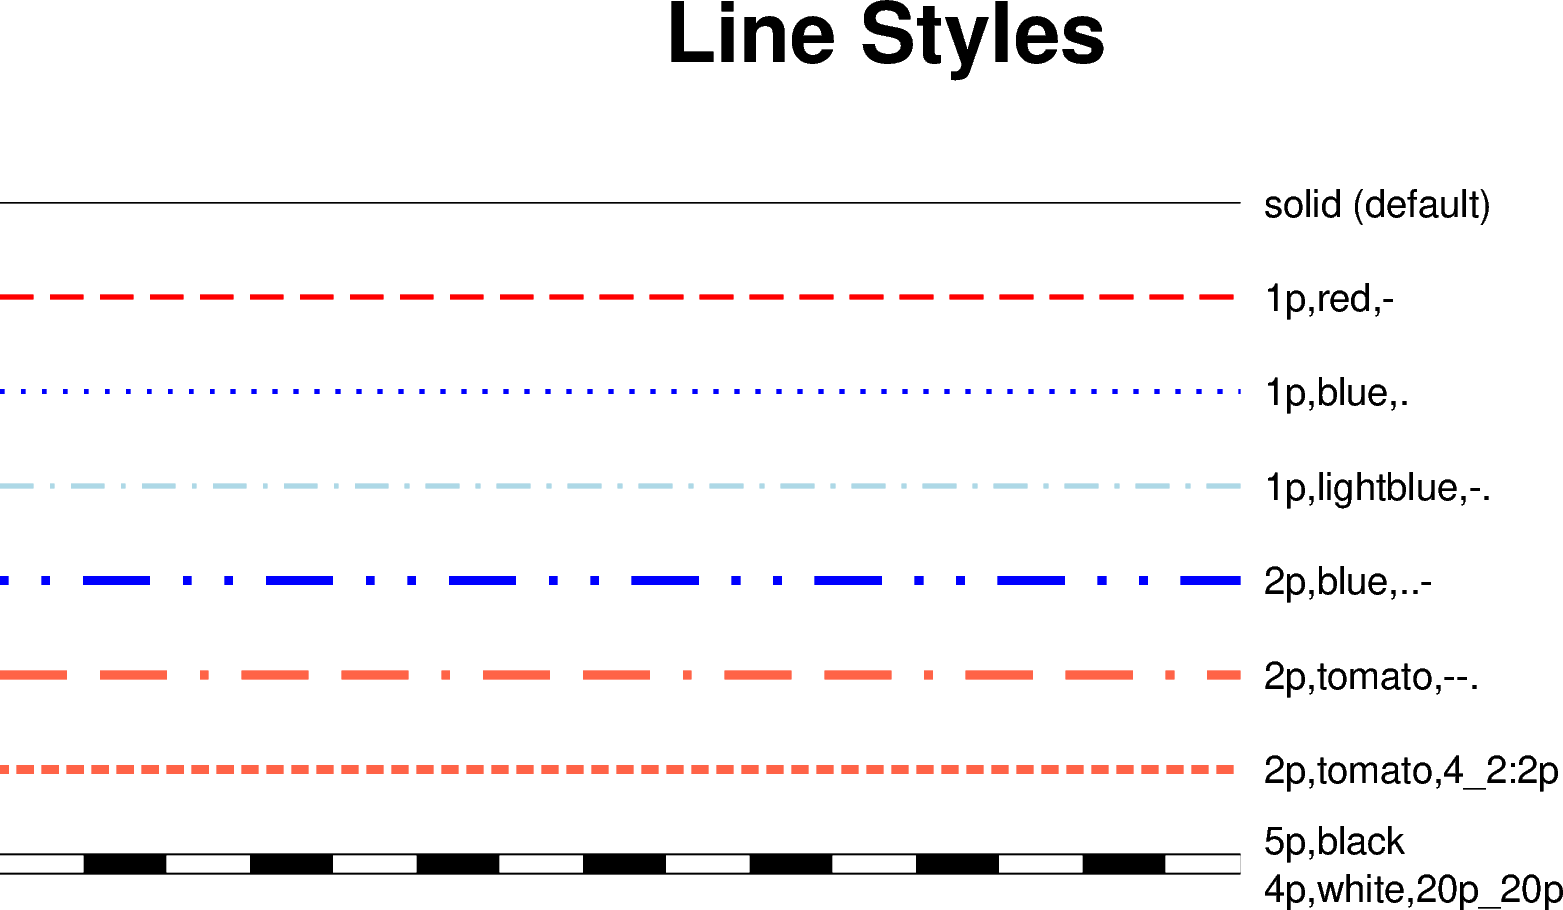

In [25]:
# Generate a two-point line for plotting
x = np.array([0, 7])
y = np.array([9, 9])

fig = pg.Figure()
fig.basemap(region=[0, 10, 0, 10], projection="X15c/8c", frame='+t"Line Styles"')

# Plot the line using the default line style
fig.plot(x=x, y=y)
fig.text(x=x[-1], y=y[-1], text="solid (default)", justify="ML", offset="0.2c/0c")

# Plot the line using different line styles
for linestyle in [
    "1p,red,-",  # dashed line
    "1p,blue,.",  # dotted line
    "1p,lightblue,-.",  # dash-dotted line
    "2p,blue,..-",  # dot-dot-dashed line
    "2p,tomato,--.",  # dash-dash-dotted line
    # A pattern of 4-point-long line segments and 2-point-long gaps between
    # segments, with pattern offset by 2 points from the origin
    "2p,tomato,4_2:2p",
]:
    y -= 1  # Move the current line down
    fig.plot(x=x, y=y, pen=linestyle)
    fig.text(x=x[-1], y=y[-1], text=linestyle, justify="ML", offset="0.2c/0c")

# Plot the line like a railway track (black/white).
# The trick here is plotting the same line twice but with different line styles
y -= 1  # move the current line down
fig.plot(x=x, y=y, pen="5p,black")
fig.plot(x=x, y=y, pen="4p,white,20p_20p")
fig.text(x=x[-1], y=y[-1], text="5p,black", justify="ML", offset="0.2c/0.2c")
fig.text(x=x[-1], y=y[-1], text="4p,white,20p_20p", justify="ML", offset="0.2c/-0.2c")

fig.show()

/Users/erick/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/erick/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/erick/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


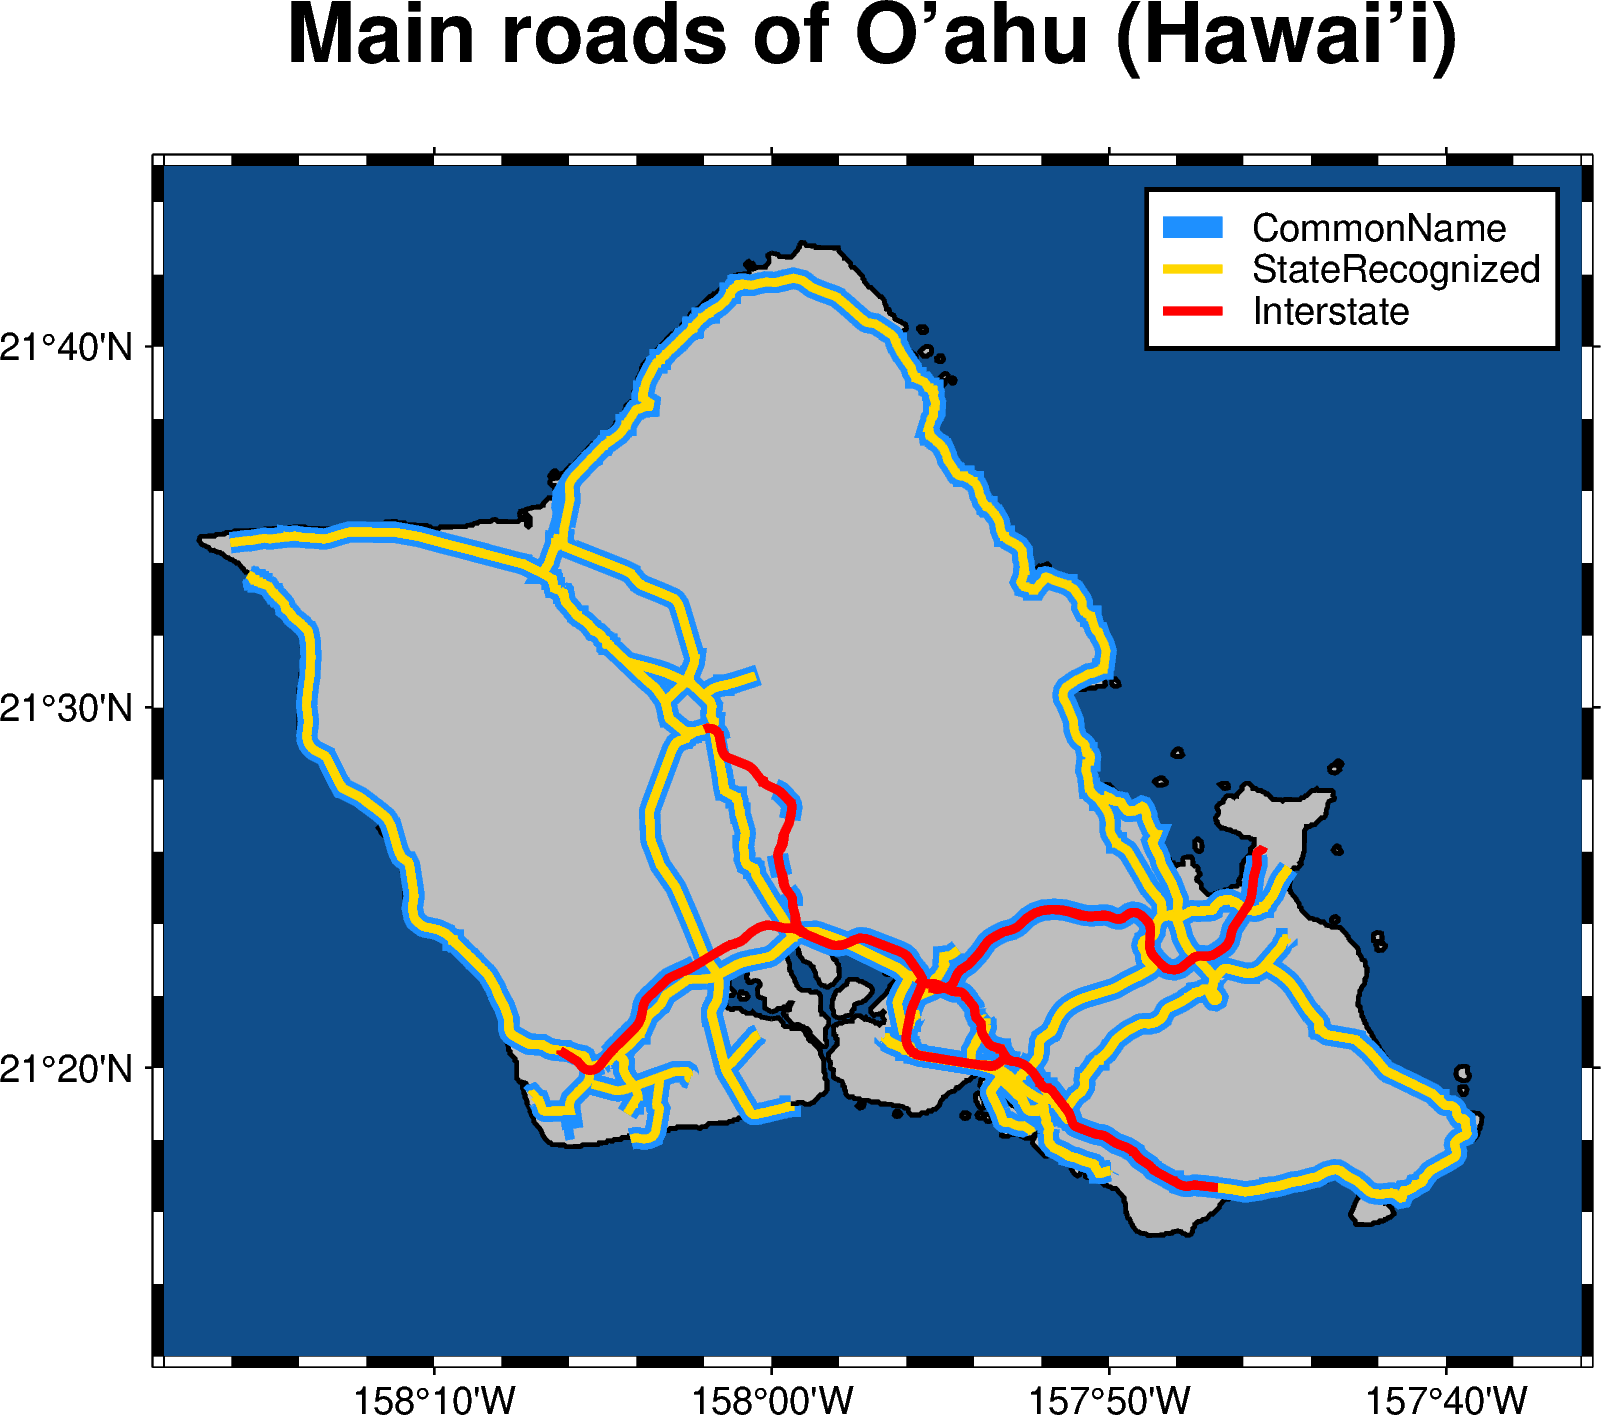

In [27]:
import geopandas as gpd

# Read shapefile data using geopandas
gdf = gpd.read_file(
    "http://www2.census.gov/geo/tiger/TIGER2015/PRISECROADS/tl_2015_15_prisecroads.zip"
)
# The dataset contains different road types listed in the RTTYP column,
# here we select the following ones to plot:
roads_common = gdf[gdf.RTTYP == "M"]  # Common name roads
roads_state = gdf[gdf.RTTYP == "S"]  # State recognized roads
roads_interstate = gdf[gdf.RTTYP == "I"]  # Interstate roads

fig = pg.Figure()

# Define target region around O'ahu (Hawai'i)
region = [-158.3, -157.6, 21.2, 21.75]  # xmin, xmax, ymin, ymax

title = r"Main roads of O\047ahu (Hawai\047i)"  # \047 is octal code for '
fig.basemap(region=region, projection="M12c", frame=["af", f'WSne+t"{title}"'])
fig.coast(land="gray", water="dodgerblue4", shorelines="1p,black")

# Plot the individual road types with different pen settings and assign labels
# which are displayed in the legend
fig.plot(data=roads_common, pen="5p,dodgerblue", label="CommonName")
fig.plot(data=roads_state, pen="2p,gold", label="StateRecognized")
fig.plot(data=roads_interstate, pen="2p,red", label="Interstate")

# Add legend
fig.legend()

fig.show()

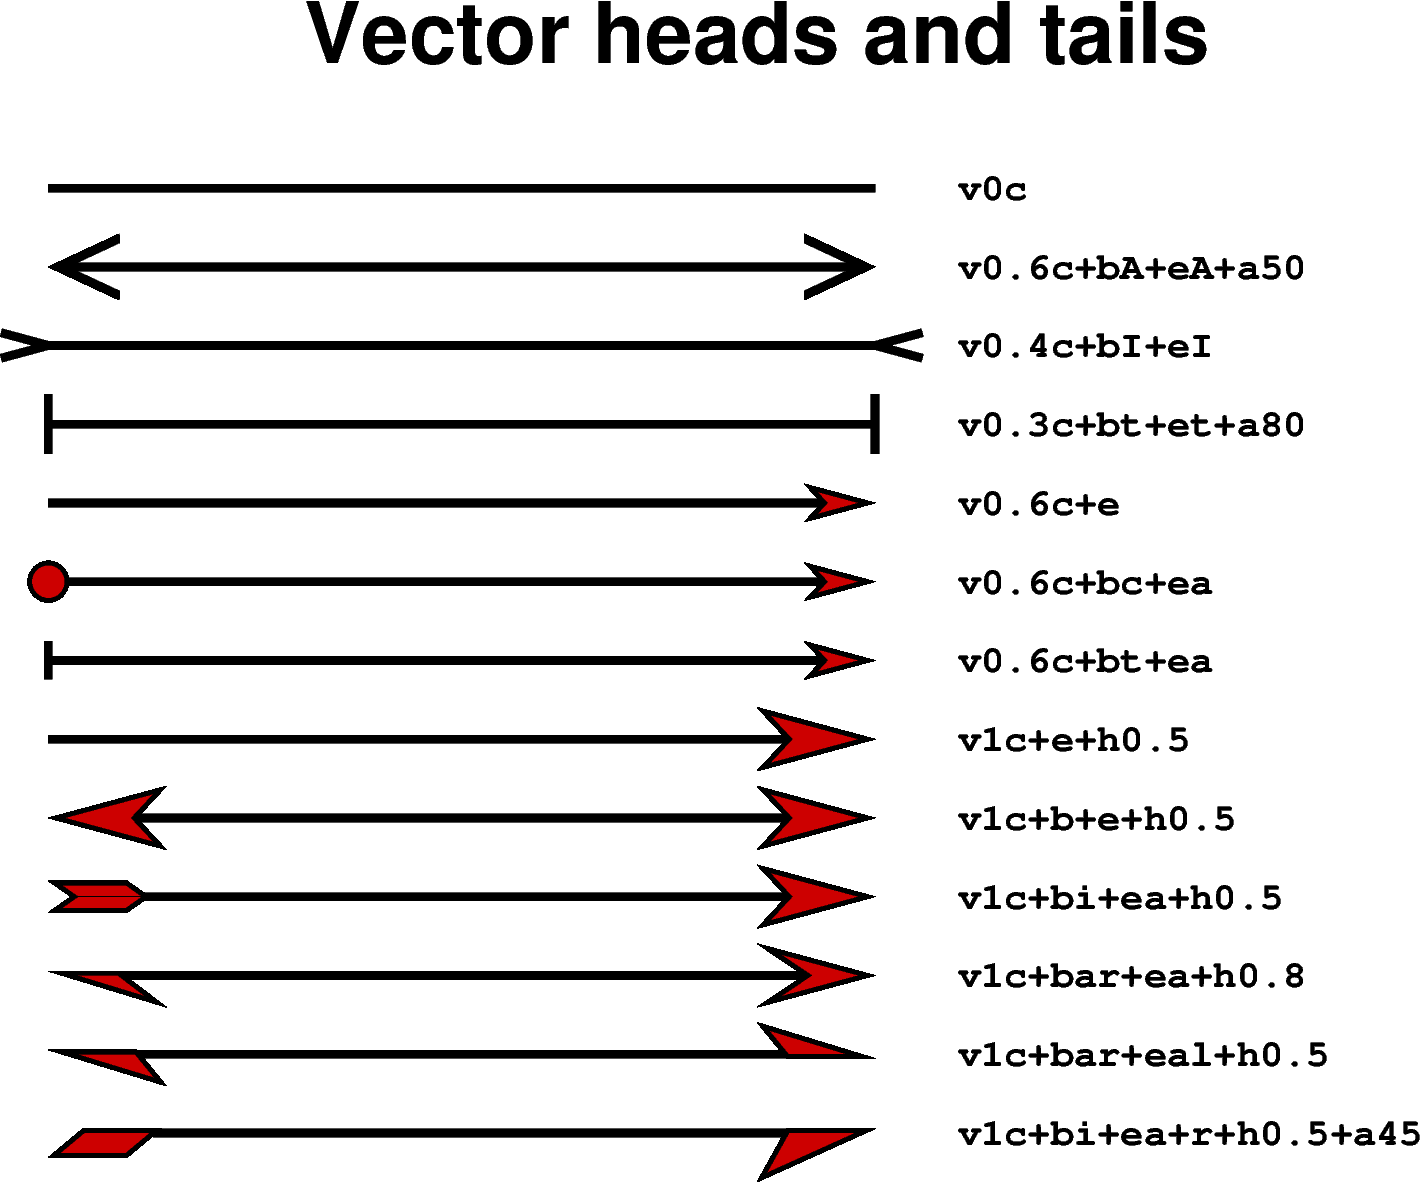

In [28]:
import pygmt

fig = pygmt.Figure()
fig.basemap(
    region=[0, 10, 0, 15], projection="X15c/10c", frame='+t"Vector heads and tails"'
)

x = 1
y = 14
angle = 0  # in degrees, measured counter-clockwise from horizontal
length = 7

for vecstyle in [
    # vector without head and tail (line)
    "v0c",
    # plain open arrow at beginning and end, angle of the vector head apex is
    # set to 50
    "v0.6c+bA+eA+a50",
    # plain open tail at beginning and end
    "v0.4c+bI+eI",
    # terminal line at beginning and end, angle of vector head apex is set
    # to 80
    "v0.3c+bt+et+a80",
    # arrow head at end
    "v0.6c+e",
    # circle at beginning and arrow head at end
    "v0.6c+bc+ea",
    # terminal line at beginning and arrow head at end
    "v0.6c+bt+ea",
    # arrow head at end, shape of vector head is set to 0.5
    "v1c+e+h0.5",
    # modified arrow heads at beginning and end
    "v1c+b+e+h0.5",
    # tail at beginning and arrow with modified vector head at end
    "v1c+bi+ea+h0.5",
    # half-sided arrow head (right side) at beginning and arrow at the end
    "v1c+bar+ea+h0.8",
    # half-sided arrow heads at beginning (right side) and end (left side)
    "v1c+bar+eal+h0.5",
    # half-sided tail at beginning and arrow at end (right side for both)
    "v1c+bi+ea+r+h0.5+a45",
]:
    fig.plot(
        x=x, y=y, style=vecstyle, direction=([angle], [length]), pen="2p", color="red3"
    )
    fig.text(
        x=6, y=y, text=vecstyle, font="Courier-Bold", justify="ML", offset="0.2c/0c"
    )
    y -= 1  # move the next vector down

fig.show()

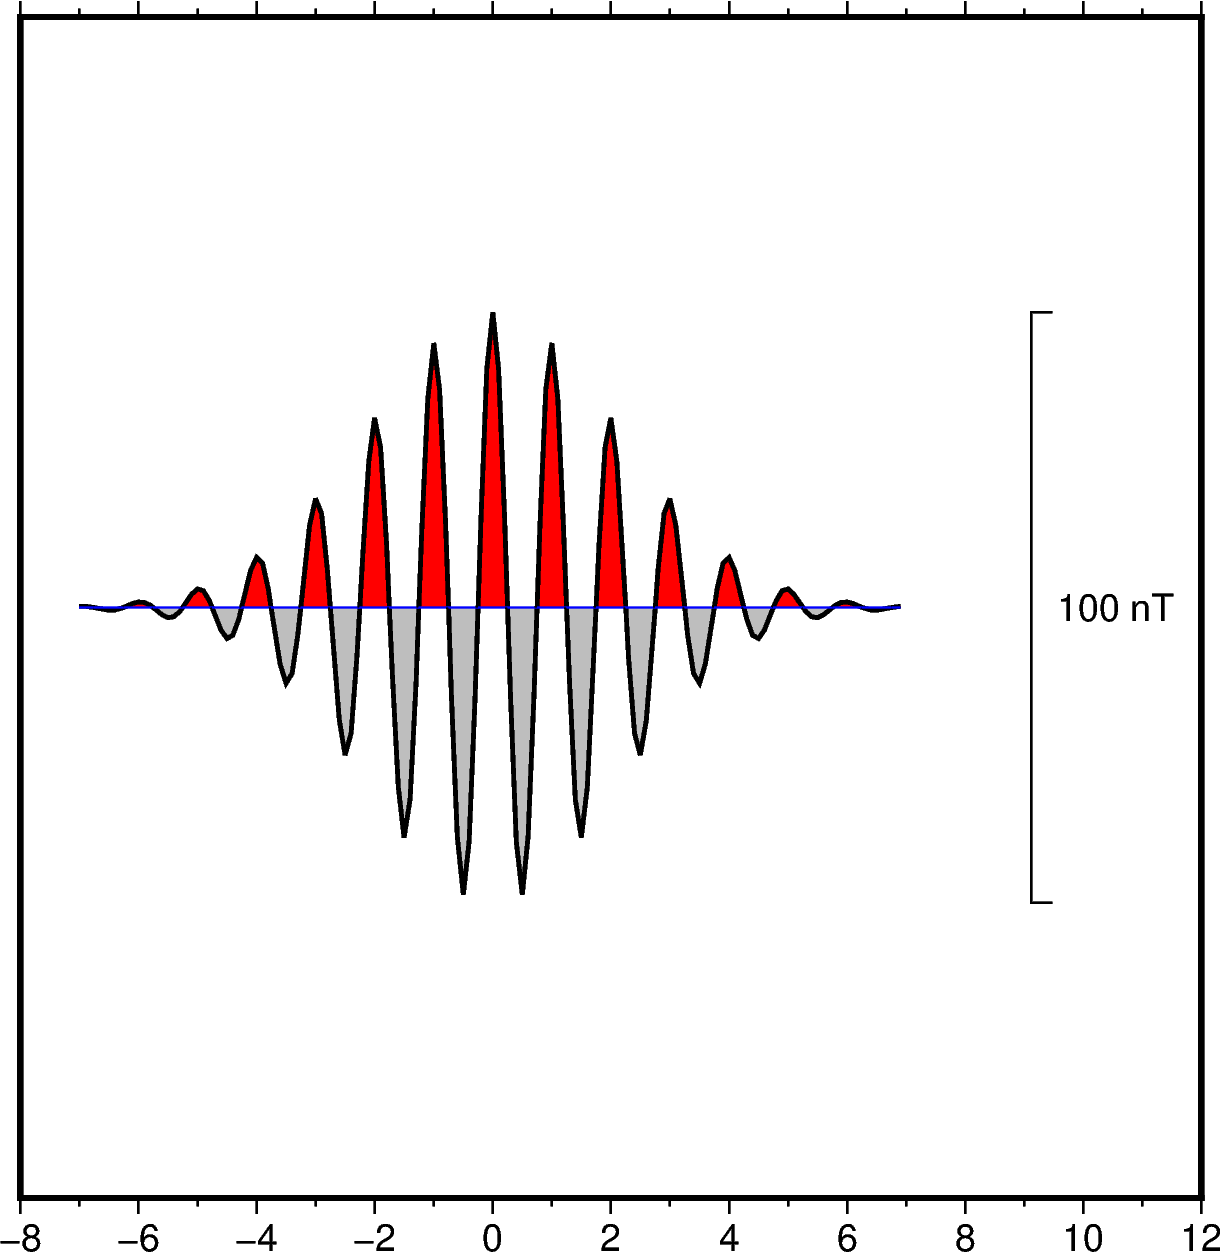

In [29]:
import numpy as np
import pygmt

# Create (x, y, z) triplets
x = np.arange(-7, 7, 0.1)
y = np.zeros(x.size)
z = 50 * np.exp(-((x / 3) ** 2)) * np.cos(2 * np.pi * x)

fig = pygmt.Figure()
fig.basemap(region=[-8, 12, -1, 1], projection="X10c", frame=["Snlr", "xa2f1"])
fig.wiggle(
    x=x,
    y=y,
    z=z,
    # Set anomaly scale to "20c"
    scale="20c",
    # Fill positive and negative areas red and gray, respectively
    color=["red+p", "gray+n"],
    # Set the outline width to "1.0p"
    pen="1.0p",
    # Draw a blue track with a width of 0.5 points
    track="0.5p,blue",
    # Plot a vertical scale bar at the right middle. The bar length is 100 in
    # data (z) units. Set the z unit label to "nT".
    position="jRM+w100+lnT",
)
fig.show()

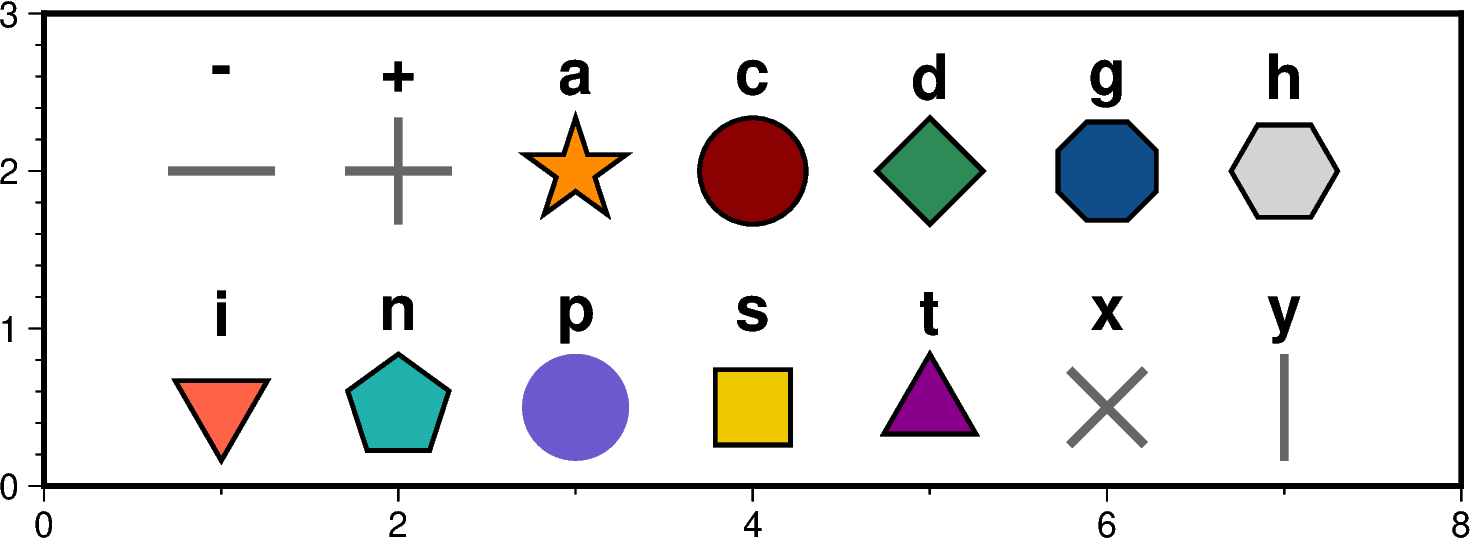

In [30]:
import pygmt

fig = pygmt.Figure()
fig.basemap(region=[0, 8, 0, 3], projection="X12c/4c", frame=True)

# define fontstlye for annotations
font = "15p,Helvetica-Bold"

# upper row
y = 2

# use a dash in x direction (-) with a size of 0.9 cm,
# linewidth is set to 2p and the linecolor to "gray40"
fig.plot(x=1, y=y, style="-0.9c", pen="2p,gray40")
fig.text(x=1, y=y + 0.6, text="-", font=font)

# use a plus (+) with a size of 0.9 cm,
# linewidth is set to 2p and the linecolor to "gray40"
fig.plot(x=2, y=y, style="+0.9c", pen="2p,gray40")
fig.text(x=2, y=y + 0.6, text="+", font=font)

# use a star (a) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" (default) and the
# color fill to "darkorange"
fig.plot(x=3, y=y, style="a0.9c", pen="1p,black", color="darkorange")
fig.text(x=3, y=y + 0.6, text="a", font=font)

# use a circle (c) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "darkred"
fig.plot(x=4, y=y, style="c0.9c", pen="1p,black", color="darkred")
fig.text(x=4, y=y + 0.6, text="c", font=font)

# use a diamond (d) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "seagreen"
fig.plot(x=5, y=y, style="d0.9c", pen="1p,black", color="seagreen")
fig.text(x=5, y=y + 0.6, text="d", font=font)

# use a octagon (g) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "dodgerblue4"
fig.plot(x=6, y=y, style="g0.9c", pen="1p,black", color="dodgerblue4")
fig.text(x=6, y=y + 0.6, text="g", font=font)

# use a hexagon (h) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "lightgray"
fig.plot(x=7, y=y, style="h0.9c", pen="1p,black", color="lightgray")
fig.text(x=7, y=y + 0.6, text="h", font=font)

# lower row
y = 0.5

# use an inverted triangle (i) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "tomato"
fig.plot(x=1, y=y, style="i0.9c", pen="1p,black", color="tomato")
fig.text(x=1, y=y + 0.6, text="i", font=font)

# use pentagon (n) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "lightseagreen"
fig.plot(x=2, y=y, style="n0.9c", pen="1p,black", color="lightseagreen")
fig.text(x=2, y=y + 0.6, text="n", font=font)

# use a point (p) with a size of 0.9 cm,
# color fill is set to "lightseagreen"
fig.plot(x=3, y=y, style="p0.9c", color="slateblue")
fig.text(x=3, y=y + 0.6, text="p", font=font)

# use square (s) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "gold2"
fig.plot(x=4, y=y, style="s0.9c", pen="1p,black", color="gold2")
fig.text(x=4, y=y + 0.6, text="s", font=font)

# use triangle (t) with a size of 0.9 cm,
# linewidth is set to 1p, the linecolor to "black" and the
# color fill to "magenta4"
fig.plot(x=5, y=y, style="t0.9c", pen="1p,black", color="magenta4")
fig.text(x=5, y=y + 0.6, text="t", font=font)

# use cross (x) with a size of 0.9 cm,
# linewidth is set to 2p and the linecolor to "gray40"
fig.plot(x=6, y=y, style="x0.9c", pen="2p,gray40")
fig.text(x=6, y=y + 0.6, text="x", font=font)

# use a dash in y direction (y) with a size of 0.9 cm,
# linewidth is set to 2p and the linecolor to "gray40"
fig.plot(x=7, y=y, style="y0.9c", pen="2p,gray40")
fig.text(x=7, y=y + 0.6, text="y", font=font)

fig.show()

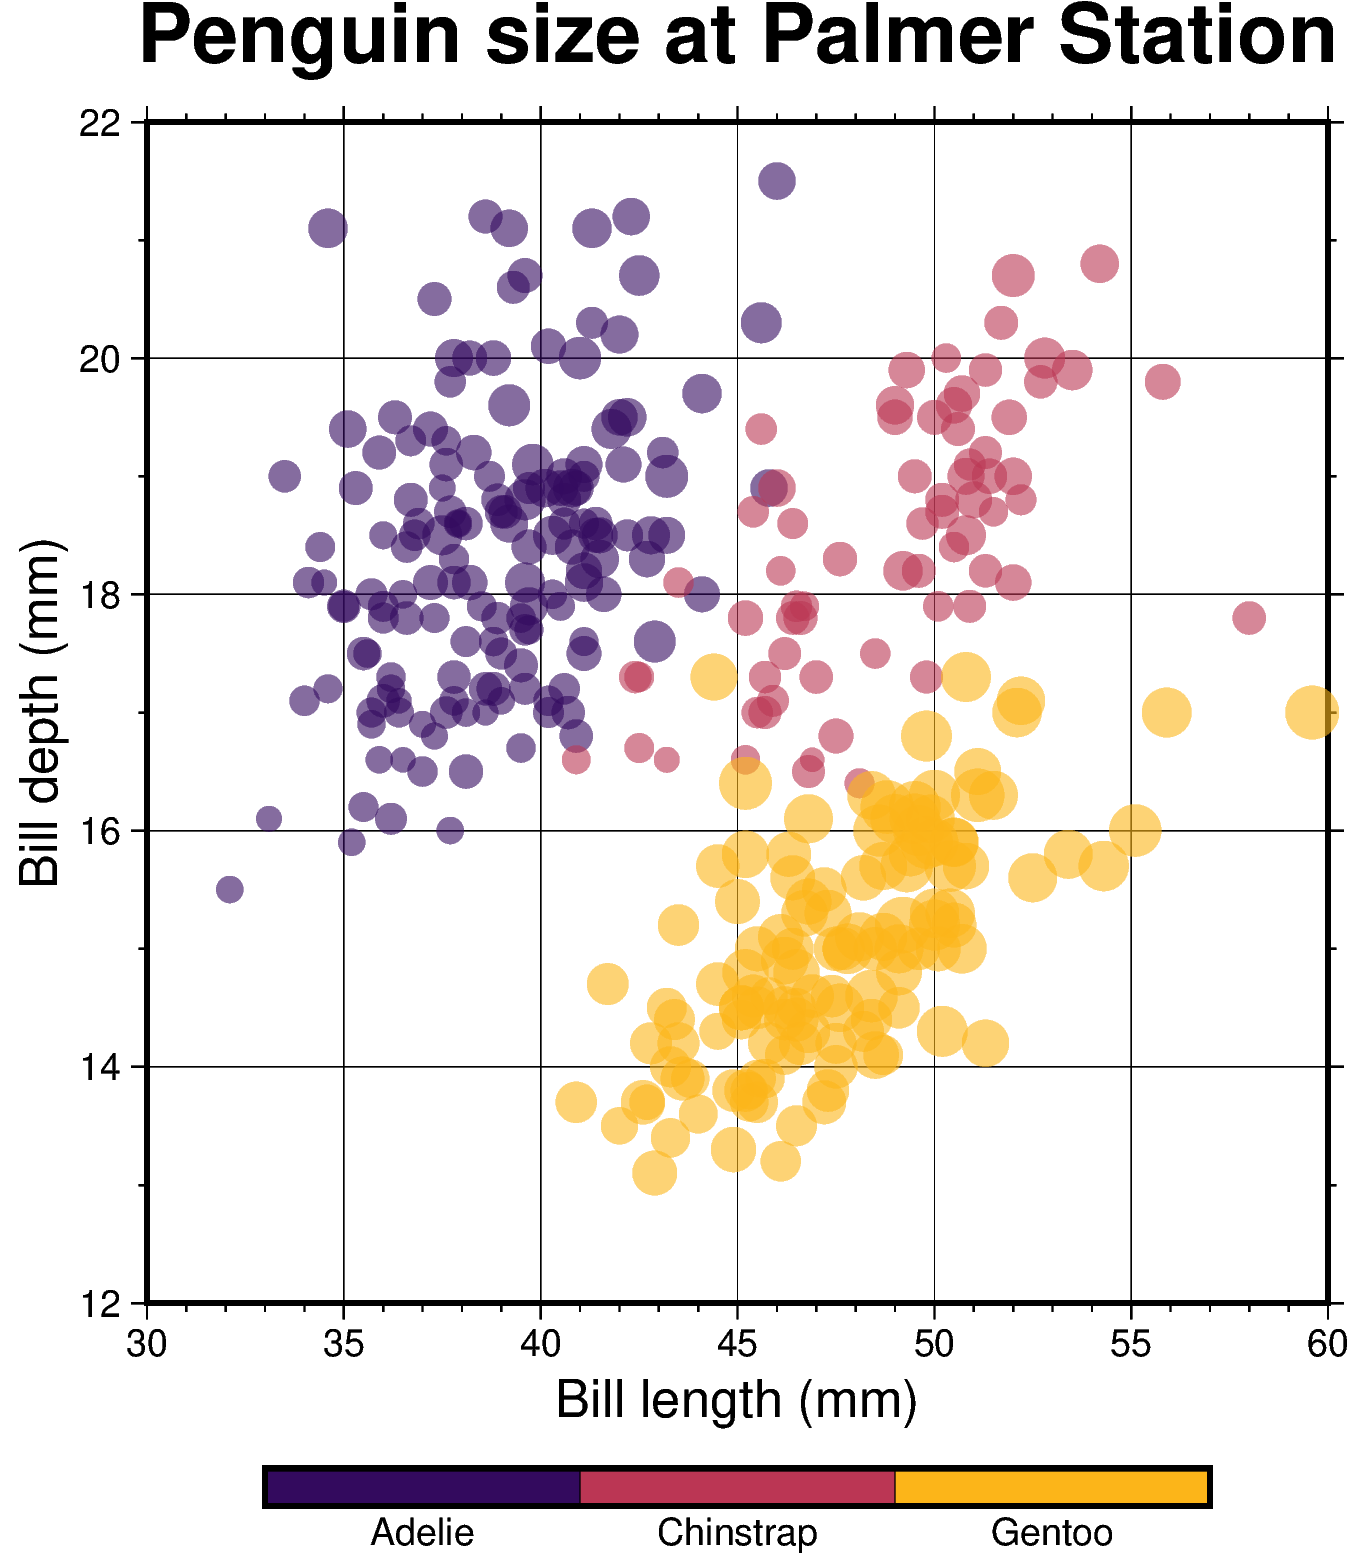

In [31]:
import pandas as pd
import pygmt

# Load sample penguins data and convert 'species' column to categorical dtype
df = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/penguins.csv")
df.species = df.species.astype(dtype="category")

# Use pygmt.info to get region bounds (xmin, xmax, ymin, ymax)
# The below example will return a numpy array like [30.0, 60.0, 12.0, 22.0]
region = pygmt.info(
    data=df[["bill_length_mm", "bill_depth_mm"]],  # x and y columns
    per_column=True,  # report the min/max values per column as a numpy array
    # round the min/max values of the first two columns to the nearest multiple
    # of 3 and 2, respectively
    spacing=(3, 2),
)

# Make a 2D categorical scatter plot, coloring each of the 3 species
# differently
fig = pygmt.Figure()

# Generate a basemap of 10 cm x 10 cm size
fig.basemap(
    region=region,
    projection="X10c/10c",
    frame=[
        'xafg+l"Bill length (mm)"',
        'yafg+l"Bill depth (mm)"',
        'WSen+t"Penguin size at Palmer Station"',
    ],
)

# Define a colormap to be used for three categories, define the range of the
# new discrete CPT using series=(lowest_value, highest_value, interval),
# use color_model="+cAdelie,Chinstrap,Gentoo" to write the discrete color
# palette "inferno" in categorical format and add the species names as
# annotations for the colorbar
pygmt.makecpt(cmap="inferno", series=(0, 2, 1), color_model="+cAdelie,Chinstrap,Gentoo")

fig.plot(
    # Use bill length and bill depth as x and y data input, respectively
    x=df.bill_length_mm,
    y=df.bill_depth_mm,
    # Vary each symbol size according to another feature (body mass,
    # scaled by 7.5*10e-5)
    size=df.body_mass_g * 7.5e-5,
    # Points colored by categorical number code
    color=df.species.cat.codes.astype(int),
    # Use colormap created by makecpt
    cmap=True,
    # Do not clip symbols that fall close to the map bounds
    no_clip=True,
    # Use circles as symbols with size in centimeter units
    style="cc",
    # Set transparency level for all symbols to deal with overplotting
    transparency=40,
)

# Add colorbar legend
fig.colorbar()

fig.show()

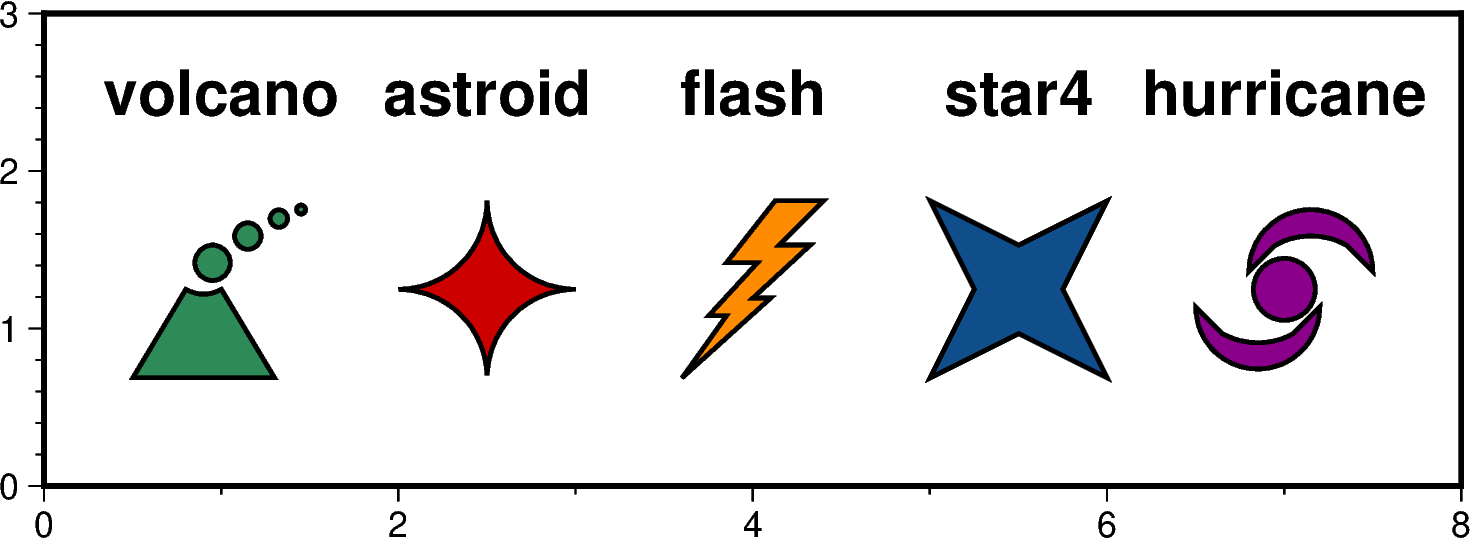

In [32]:
import pygmt

fig = pygmt.Figure()
fig.basemap(region=[0, 8, 0, 3], projection="X12c/4c", frame=True)

# define pen and fontstlye for annotations
pen = "1p,black"
font = "15p,Helvetica-Bold"

# use the volcano symbol with a size of 1.5c,
# fill color is set to "seagreen"
fig.plot(x=1, y=1.25, style="kvolcano/1.5c", pen=pen, color="seagreen")
fig.text(x=1, y=2.5, text="volcano", font=font)

# use the astroid symbol with a size of 1.5c,
# fill color is set to "red3"
fig.plot(x=2.5, y=1.25, style="kastroid/1.5c", pen=pen, color="red3")
fig.text(x=2.5, y=2.5, text="astroid", font=font)

# use the flash symbol with a size of 1.5c,
# fill color is set to "darkorange"
fig.plot(x=4, y=1.25, style="kflash/1.5c", pen=pen, color="darkorange")
fig.text(x=4, y=2.5, text="flash", font=font)

# use the star4 symbol with a size of 1.5c,
# fill color is set to "dodgerblue4"
fig.plot(x=5.5, y=1.25, style="kstar4/1.5c", pen=pen, color="dodgerblue4")
fig.text(x=5.5, y=2.5, text="star4", font=font)

# use the hurricane symbol with a size of 1.5c,
# fill color is set to "magenta4"
fig.plot(x=7, y=1.25, style="khurricane/1.5c", pen=pen, color="magenta4")
fig.text(x=7, y=2.5, text="hurricane", font=font)

fig.show()

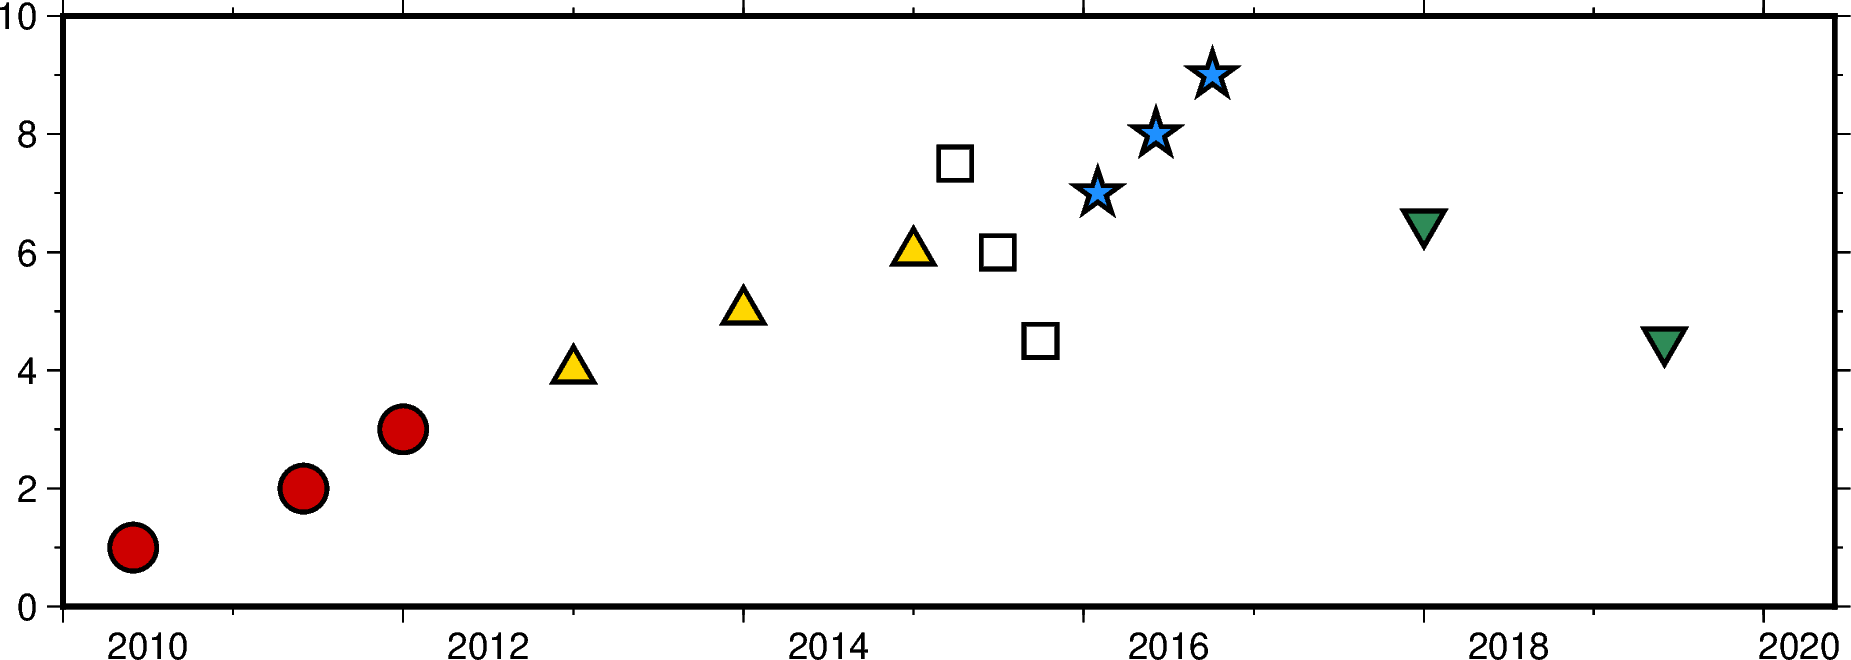

In [33]:
import datetime

import numpy as np
import pandas as pd
import pygmt
import xarray as xr

fig = pygmt.Figure()

# create a basemap with limits of 2010-01-01 to 2020-06-01 on the x axis and
# 0 to 10 on the y axis
fig.basemap(
    projection="X15c/5c",
    region=[datetime.date(2010, 1, 1), datetime.date(2020, 6, 1), 0, 10],
    frame=["WSen", "af"],
)

# numpy.datetime64 types
x = np.array(["2010-06-01", "2011-06-01T12", "2012-01-01T12:34:56"], dtype="datetime64")
y = [1, 2, 3]
fig.plot(x=x, y=y, style="c0.4c", pen="1p", color="red3")

# pandas.DatetimeIndex
x = pd.date_range("2013", periods=3, freq="YS")
y = [4, 5, 6]
fig.plot(x=x, y=y, style="t0.4c", pen="1p", color="gold")

# xarray.DataArray
x = xr.DataArray(data=pd.date_range(start="2015-03", periods=3, freq="QS"))
y = [7.5, 6, 4.5]
fig.plot(x=x, y=y, style="s0.4c", pen="1p")

# raw datetime strings
x = ["2016-02-01", "2016-06-04T14", "2016-10-04T00:00:15"]
y = [7, 8, 9]
fig.plot(x=x, y=y, style="a0.4c", pen="1p", color="dodgerblue")

# the Python built-in datetime and date
x = [datetime.date(2018, 1, 1), datetime.datetime(2019, 6, 1, 20, 5, 45)]
y = [6.5, 4.5]
fig.plot(x=x, y=y, style="i0.4c", pen="1p", color="seagreen")

fig.show()

The multi-parameter symbols in the style parameter are defined as:  
e: ellipse, direction/major_axis/minor_axis  
j: rotated rectangle, direction/width/height  
r: rectangle, width/height  
R: rounded rectangle, width/height/radius  
w: pie wedge, radius/startdir/stopdir, the last two arguments are directions given in degrees counter-clockwise from horizontal

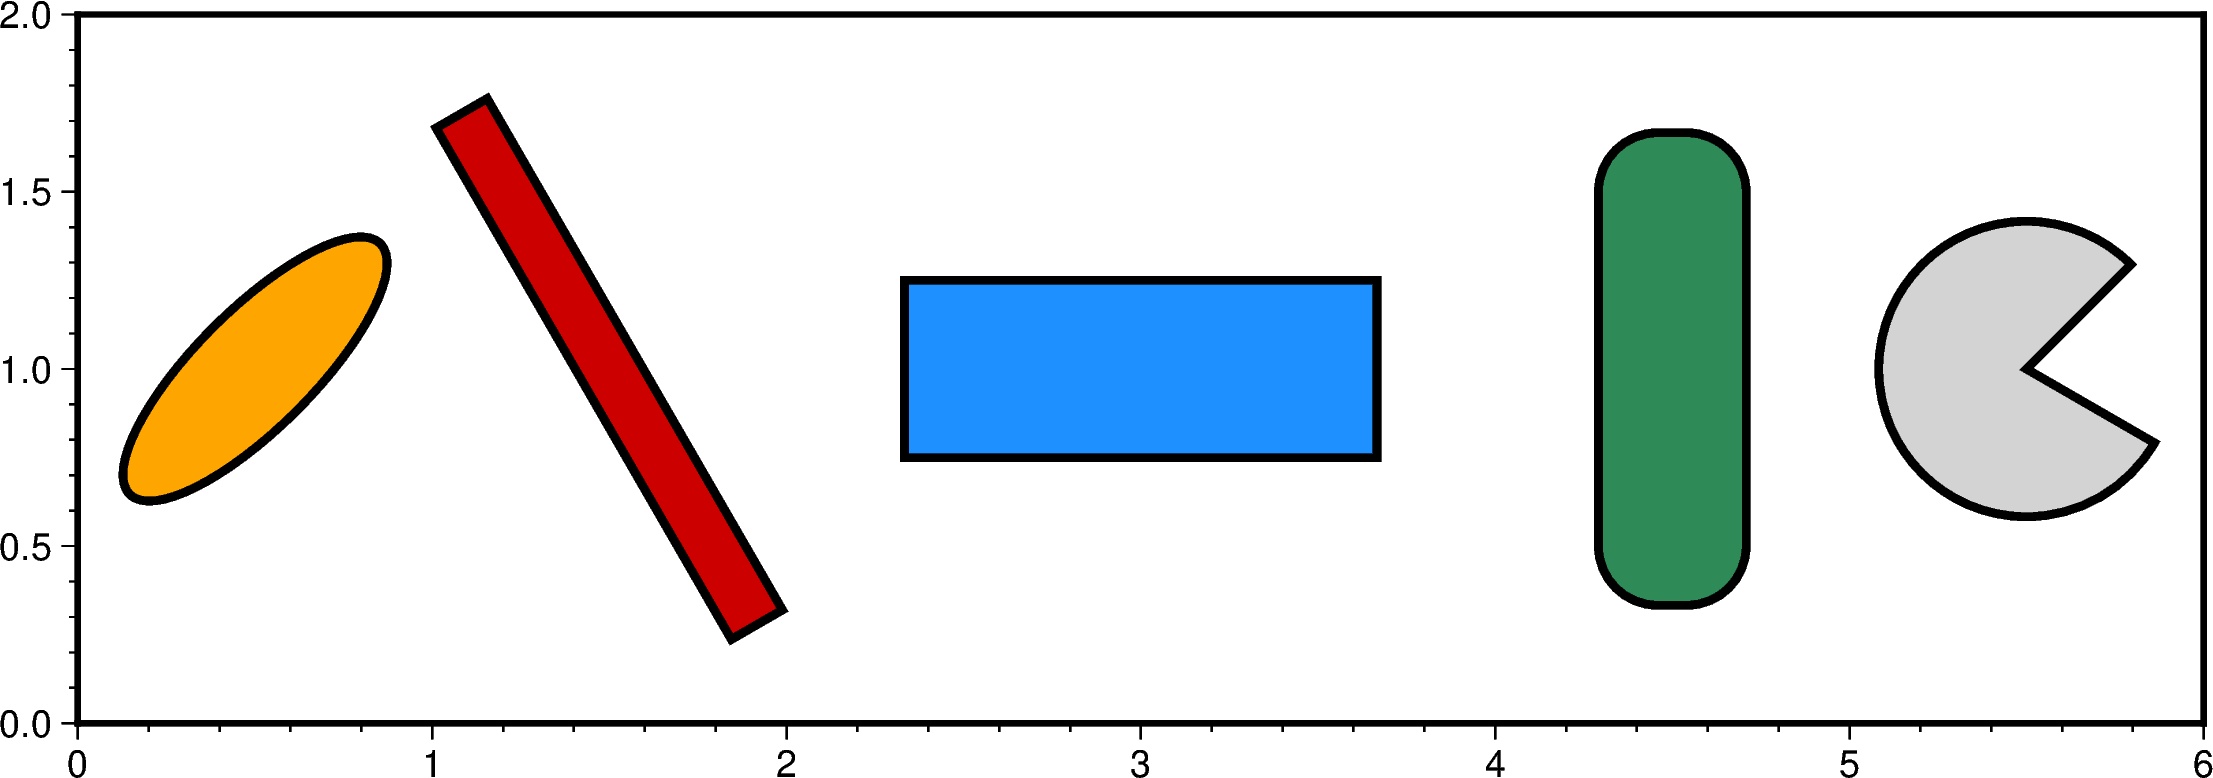

In [35]:
fig = pygmt.Figure()
fig.basemap(region=[0, 6, 0, 2], projection="x3c", frame=True)

# Ellipse
fig.plot(x=0.5, y=1, style="e45/3/1", color="orange", pen="2p,black")
# Rotated rectangle
fig.plot(x=1.5, y=1, style="j120/5/0.5", color="red3", pen="2p,black")
# Rectangle
fig.plot(x=3, y=1, style="r4/1.5", color="dodgerblue", pen="2p,black")
# Rounded rectangle
fig.plot(x=4.5, y=1, style="R1.25/4/0.5", color="seagreen", pen="2p,black")
# Pie wedge
fig.plot(x=5.5, y=1, style="w2.5/45/330", color="lightgray", pen="2p,black")

fig.show()

The symbol parameters in the 2d list or numpy array are defined as:  
e: ellipse, [[lon, lat, direction, major_axis, minor_axis]]  
j: rotated rectangle, [[lon, lat, direction, width, height]]  
r: rectangle, [[lon, lat, width, height]]  
R: rounded rectangle, [[lon, lat, width, height, radius]]  
w: pie wedge, [[lon, lat, radius, startdir, stopdir]], the last two arguments are directions given in degrees counter-clockwise from horizontal

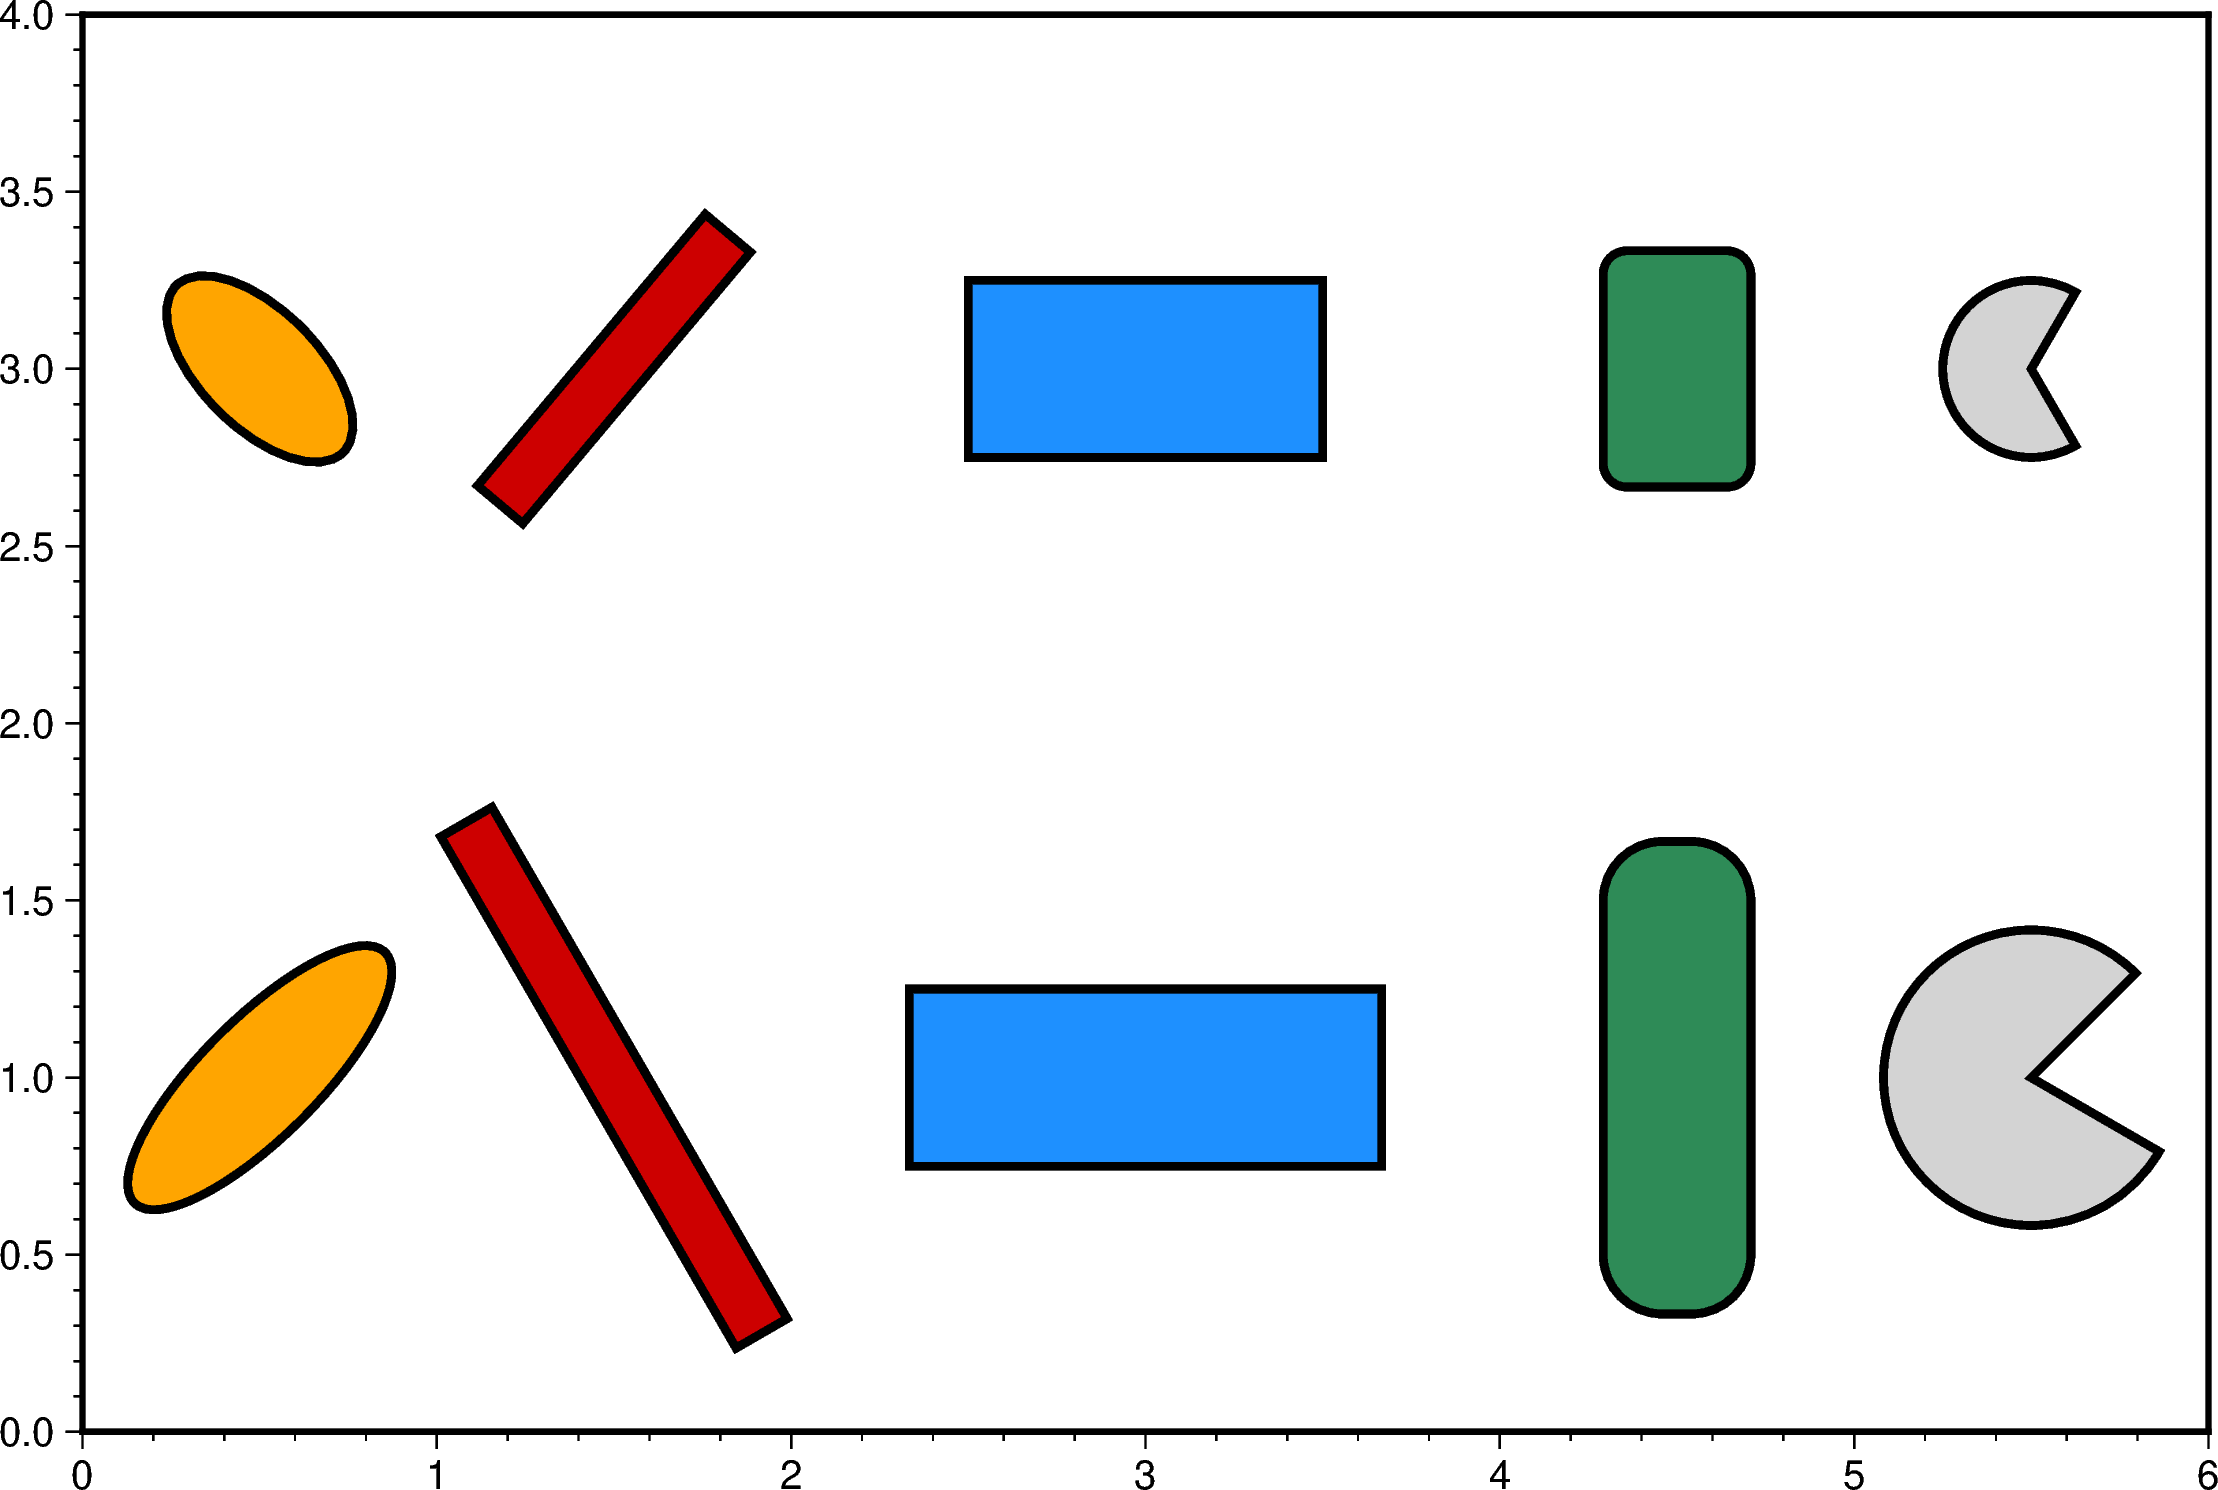

In [34]:
fig = pygmt.Figure()
fig.basemap(region=[0, 6, 0, 4], projection="x3c", frame=["xa1f0.2", "ya0.5f0.1"])

# Ellipse
data = [[0.5, 1, 45, 3, 1], [0.5, 3, 135, 2, 1]]
fig.plot(data=data, style="e", color="orange", pen="2p,black")
# Rotated rectangle
data = [[1.5, 1, 120, 5, 0.5], [1.5, 3, 50, 3, 0.5]]
fig.plot(data=data, style="j", color="red3", pen="2p,black")
# Rectangle
data = [[3, 1, 4, 1.5], [3, 3, 3, 1.5]]
fig.plot(data=data, style="r", color="dodgerblue", pen="2p,black")
# Rounded rectangle
data = [[4.5, 1, 1.25, 4, 0.5], [4.5, 3, 1.25, 2.0, 0.2]]
fig.plot(data=data, style="R", color="seagreen", pen="2p,black")
# Pie wedge
data = [[5.5, 1, 2.5, 45, 330], [5.5, 3, 1.5, 60, 300]]
fig.plot(data=data, style="w", color="lightgray", pen="2p,black")

fig.show()

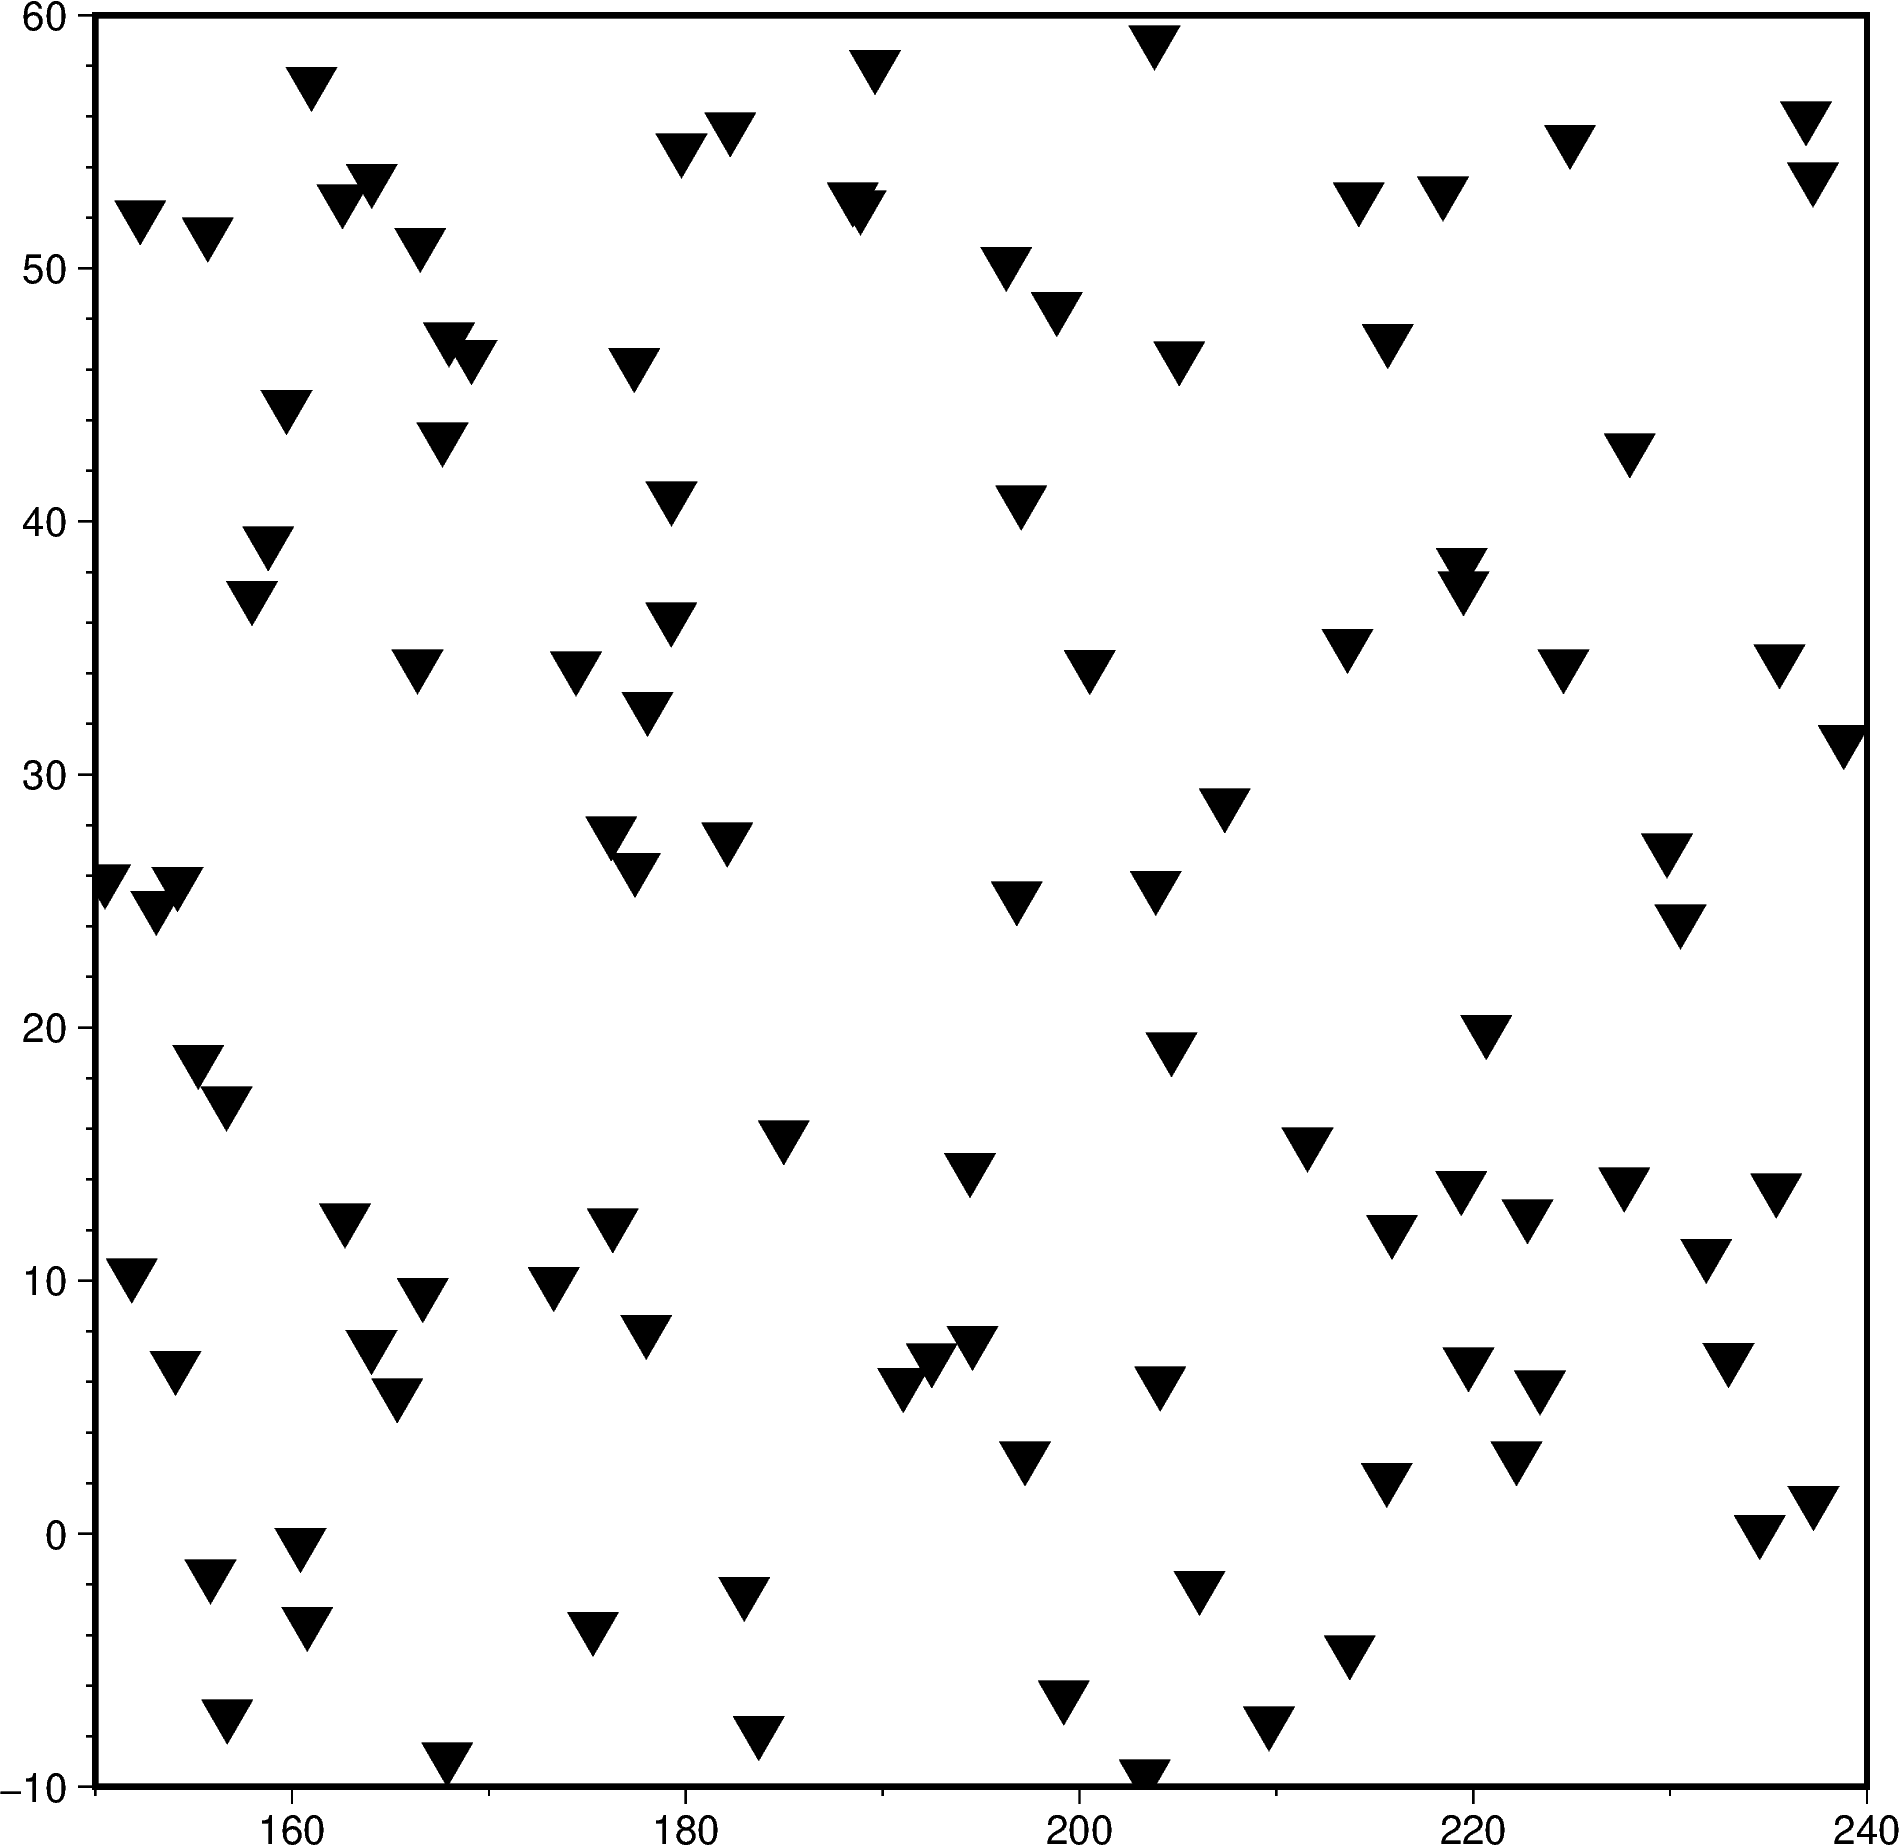

In [36]:
import numpy as np
import pygmt

# Generate a random set of points to plot
np.random.seed(42)
region = [150, 240, -10, 60]
x = np.random.uniform(region[0], region[1], 100)
y = np.random.uniform(region[2], region[3], 100)

fig = pygmt.Figure()
# Create a 15 cm x 15 cm basemap with a Cartesian projection (X) using the
# data region
fig.basemap(region=region, projection="X15c", frame=True)
# Plot using inverted triangles (i) of 0.5 cm size
fig.plot(x=x, y=y, style="i0.5c", color="black")
fig.show()

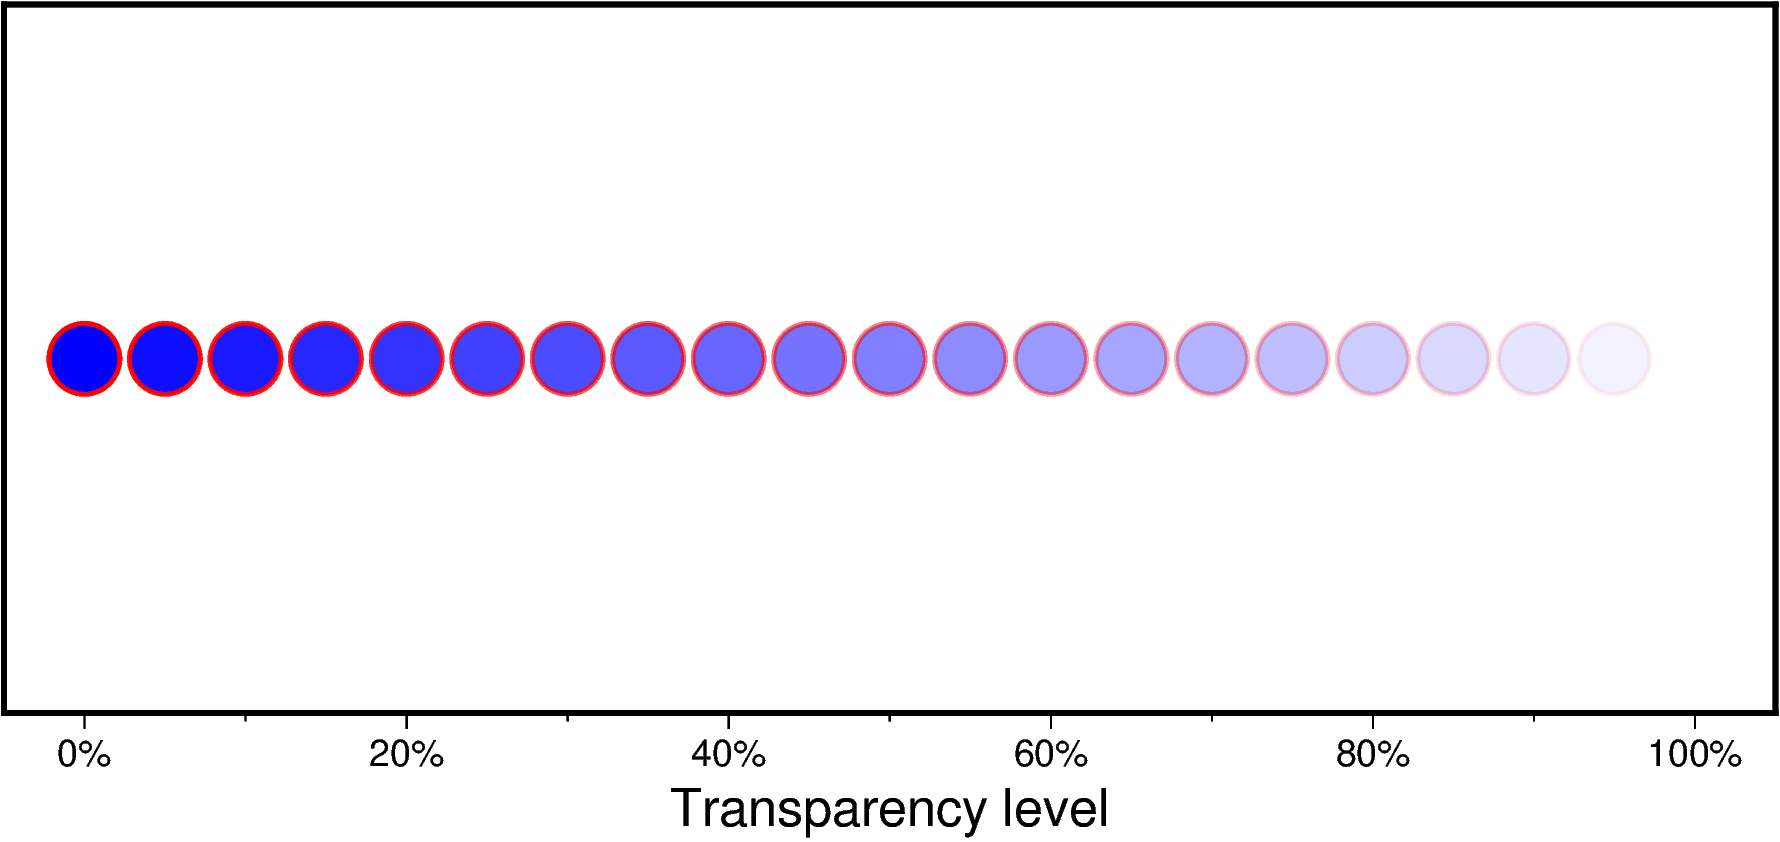

In [37]:
import numpy as np
import pygmt

# prepare the input x and y data
x = np.arange(0, 105, 5)
y = np.ones(x.size)
# transparency level in percentage from 0 (i.e., opaque) to 100
transparency = x

fig = pygmt.Figure()
fig.basemap(
    region=[-5, 105, 0, 2],
    frame=['xaf+l"Transparency level"+u%', "WSrt"],
    projection="X15c/6c",
)
fig.plot(x=x, y=y, style="c0.6c", color="blue", pen="1p,red", transparency=transparency)
fig.show()

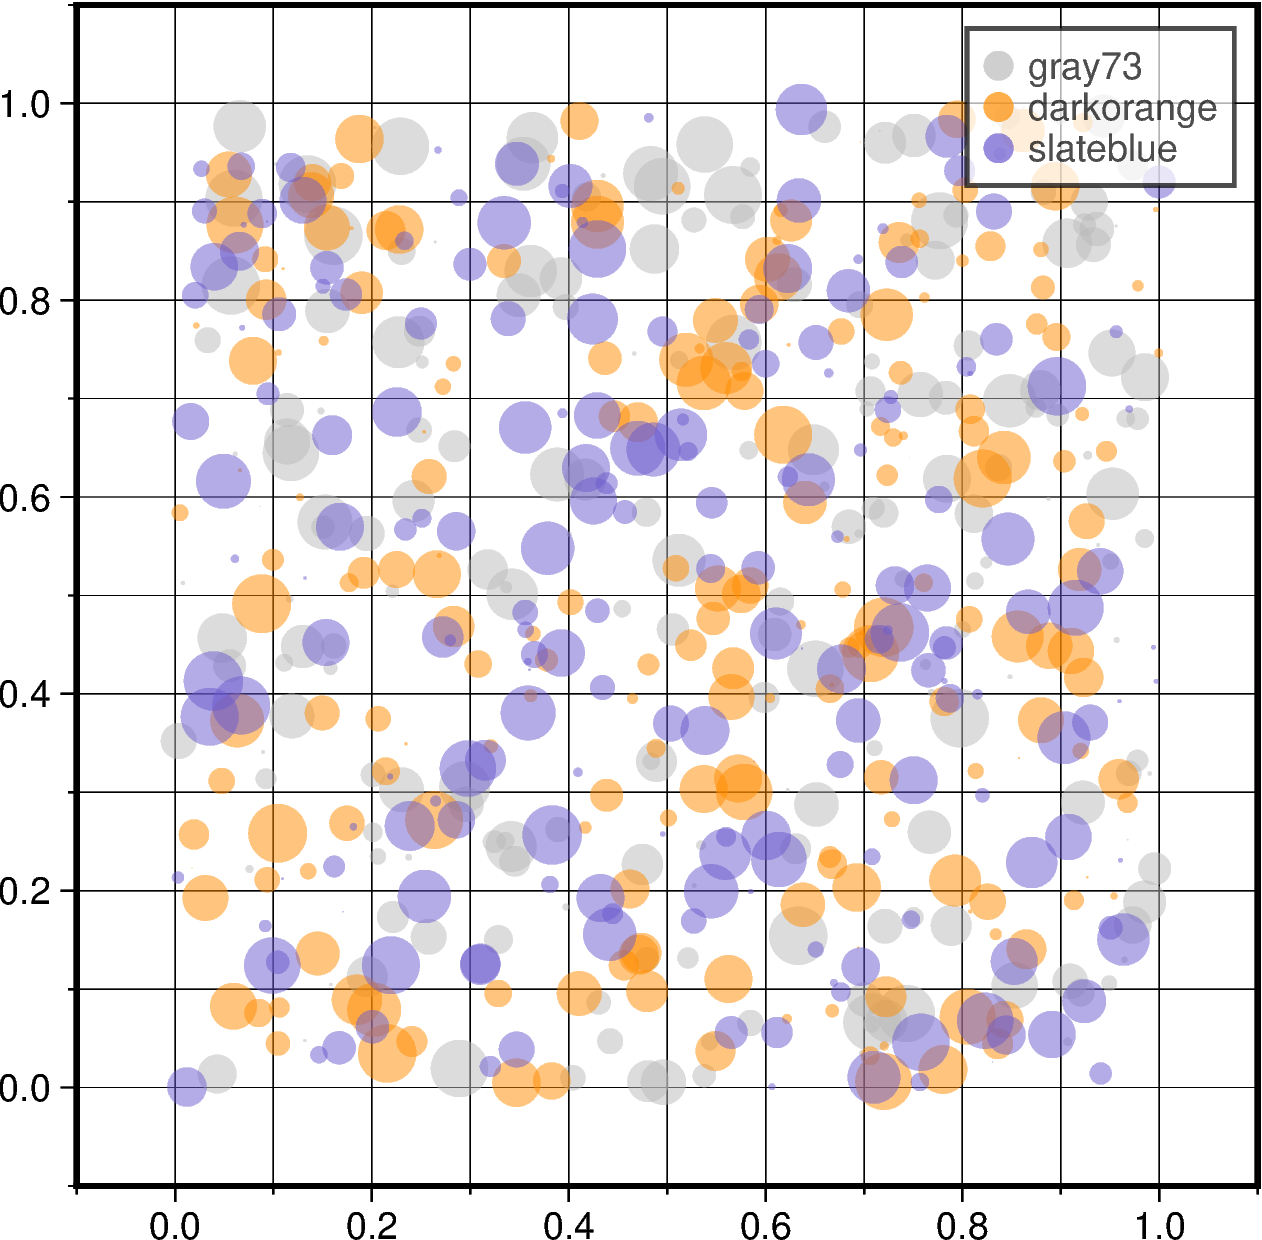

In [38]:
import numpy as np
import pygmt

np.random.seed(19680801)
n = 200  # number of random data points

fig = pygmt.Figure()
fig.basemap(
    region=[-0.1, 1.1, -0.1, 1.1],
    projection="X10c/10c",
    frame=["xa0.2fg", "ya0.2fg", "WSrt"],
)
for color in ["gray73", "darkorange", "slateblue"]:
    x, y = np.random.rand(2, n)  # random X and Y data in [0,1]
    size = np.random.rand(n) * 0.5  # random size [0,0.5], in cm
    # plot data points as circles (style="c"), with different sizes
    fig.plot(
        x=x,
        y=y,
        style="c",
        size=size,
        color=color,
        # Set the legend label,
        # and set the symbol size to be 0.25 cm (+S0.25c) in legend
        label=f"{color}+S0.25c",
        transparency=50,  # set transparency level for all symbols
    )

fig.legend(transparency=30)  # set transparency level for legends
fig.show()

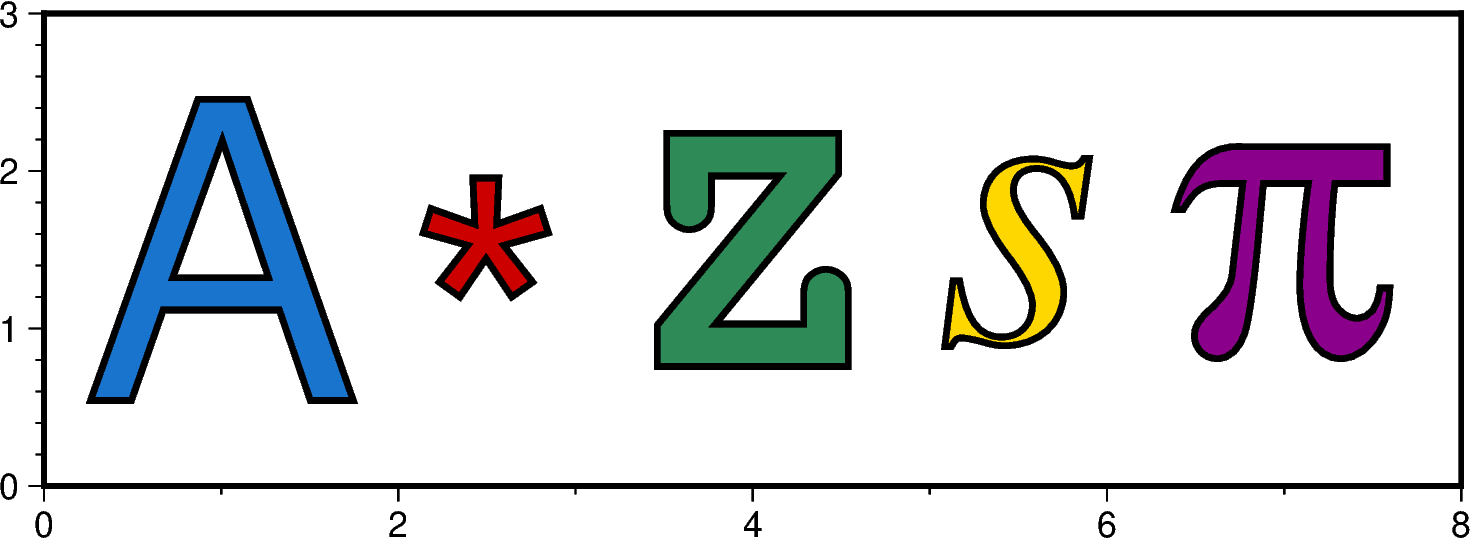

In [39]:
import pygmt

fig = pygmt.Figure()

fig.basemap(region=[0, 8, 0, 3], projection="X12c/4c", frame=True)

pen = "1.5p"
# plot an uppercase "A" of size 3.5c, color fill is set to "dodgerblue3"
fig.plot(x=1, y=1.5, style="l3.5c+tA", color="dodgerblue3", pen=pen)
# plot an "asterisk" of size 3.5c, color fill is set to "red3"
fig.plot(x=2.5, y=1, style="l3.5c+t*", color="red3", pen=pen)
# plot an uppercase "Z" of size 3.5c and use the "Courier-Bold" font,
# color fill is set to "seagreen"
fig.plot(x=4, y=1.5, style="l3.5c+tZ+fCourier-Bold", color="seagreen", pen=pen)
# plot a lowercase "s" of size 3.5c and use the "Times-Italic" font,
# color fill is set to "gold"
fig.plot(x=5.5, y=1.5, style="l3.5c+ts+fTimes-Italic", color="gold", pen=pen)
# plot the pi symbol (\160 is octal code for pi) of size 3.5c, for this use
# the "Symbol" font, color fill is set to "magenta4"
fig.plot(x=7, y=1.5, style="l3.5c+t\160+fSymbol", color="magenta4", pen=pen)

fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): N37W120


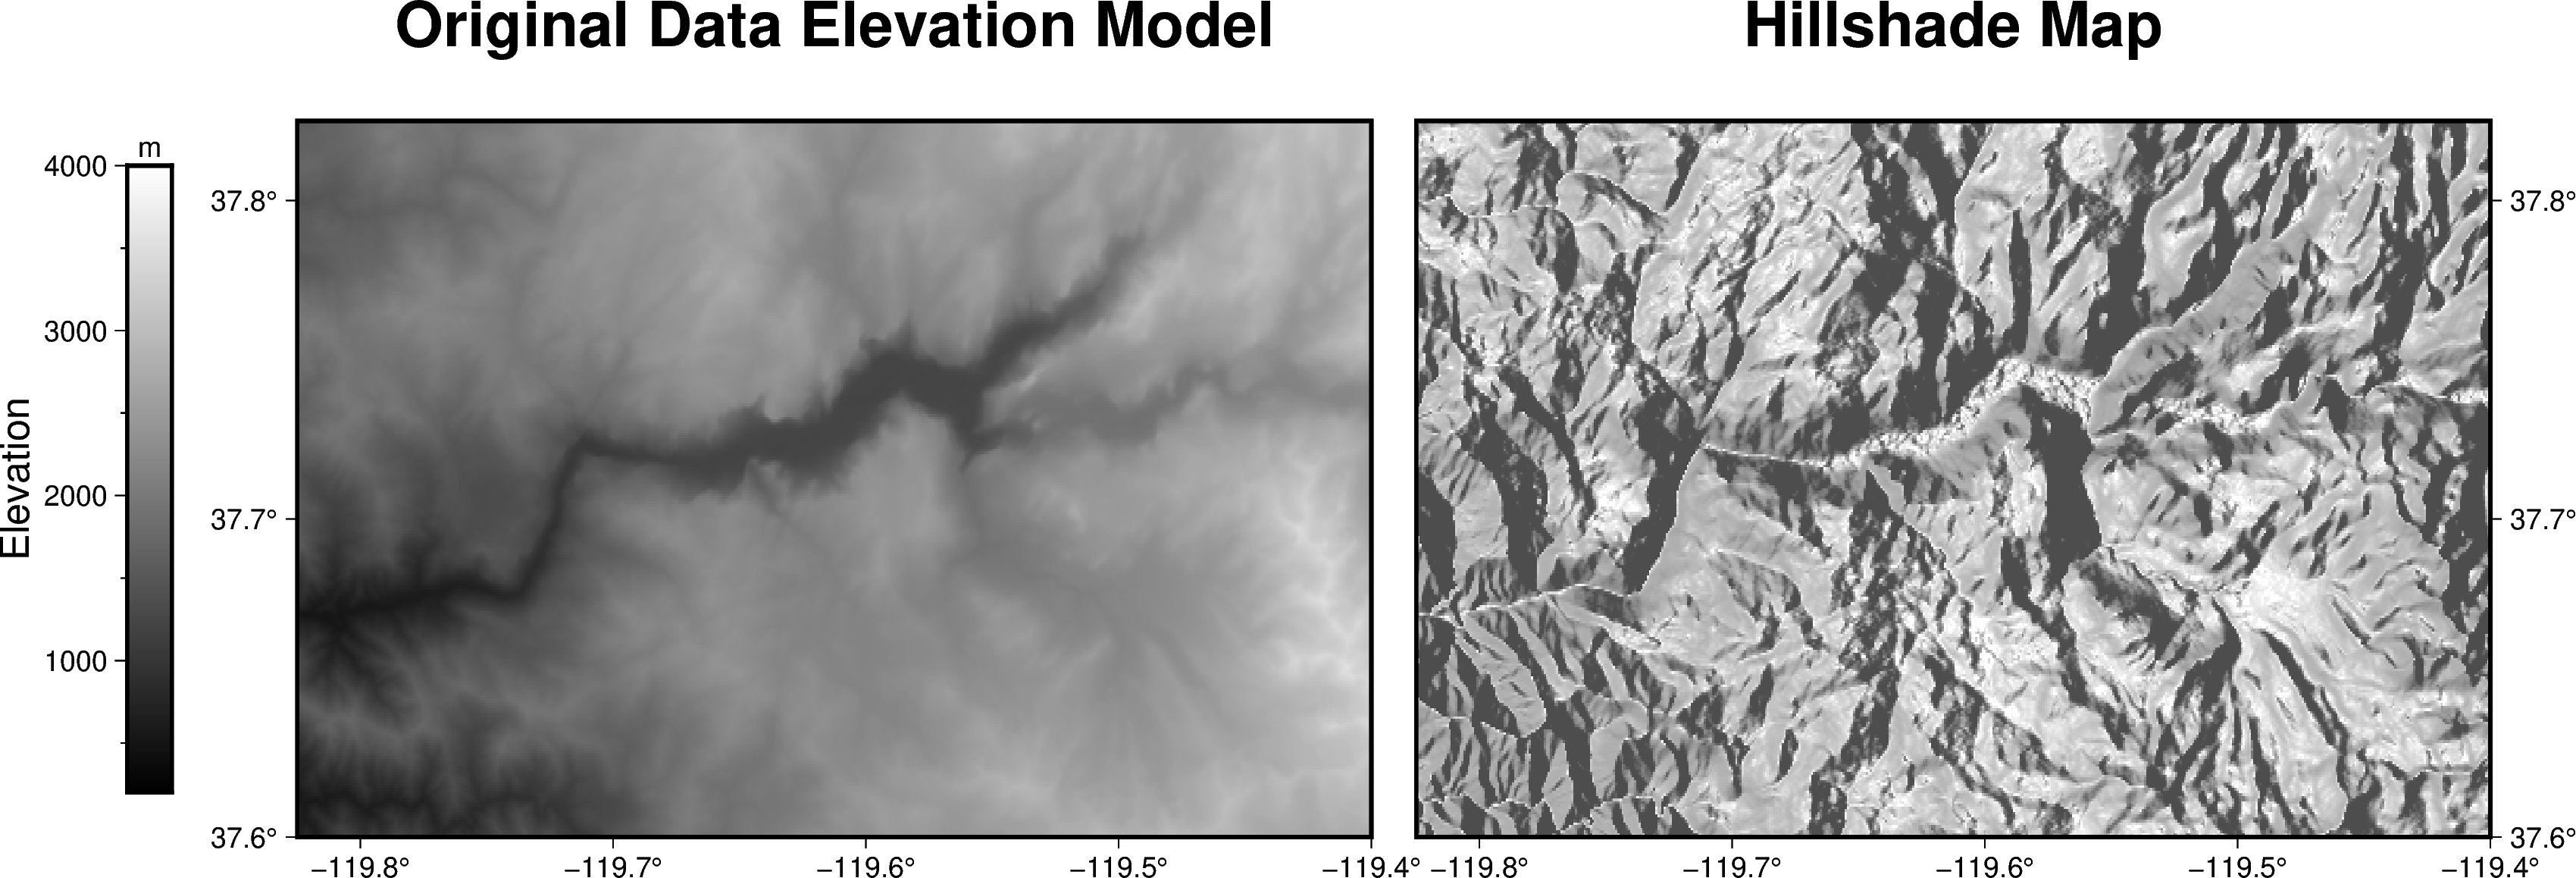

In [40]:
import pygmt

# Define region of interest around Yosemite valley
region = [-119.825, -119.4, 37.6, 37.825]

# Load sample grid (3 arc second global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution="03s", region=region)

# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])

fig = pygmt.Figure()
# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

# --------------- plotting the original Data Elevation Model -----------

pygmt.makecpt(cmap="gray", series=[200, 4000, 10])
fig.grdimage(
    grid=grid,
    projection="M12c",
    frame=['WSrt+t"Original Data Elevation Model"', "xa0.1", "ya0.1"],
    cmap=True,
)

fig.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa1000f500+lElevation", "y+lm"])

# --------------- plotting the hillshade map -----------

# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=['lSEt+t"Hillshade Map"', "xa0.1", "ya0.1"],
    cmap=True,
)

fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief at 03x03 arc minutes reduced by Gaussian Cartesian filtering (5.6 km fullwidth) [Sandwell et al., 2022].
grdblend [NOTICE]:   -> Download 90x90 degree grid tile (earth_relief_03m_p): N00W090


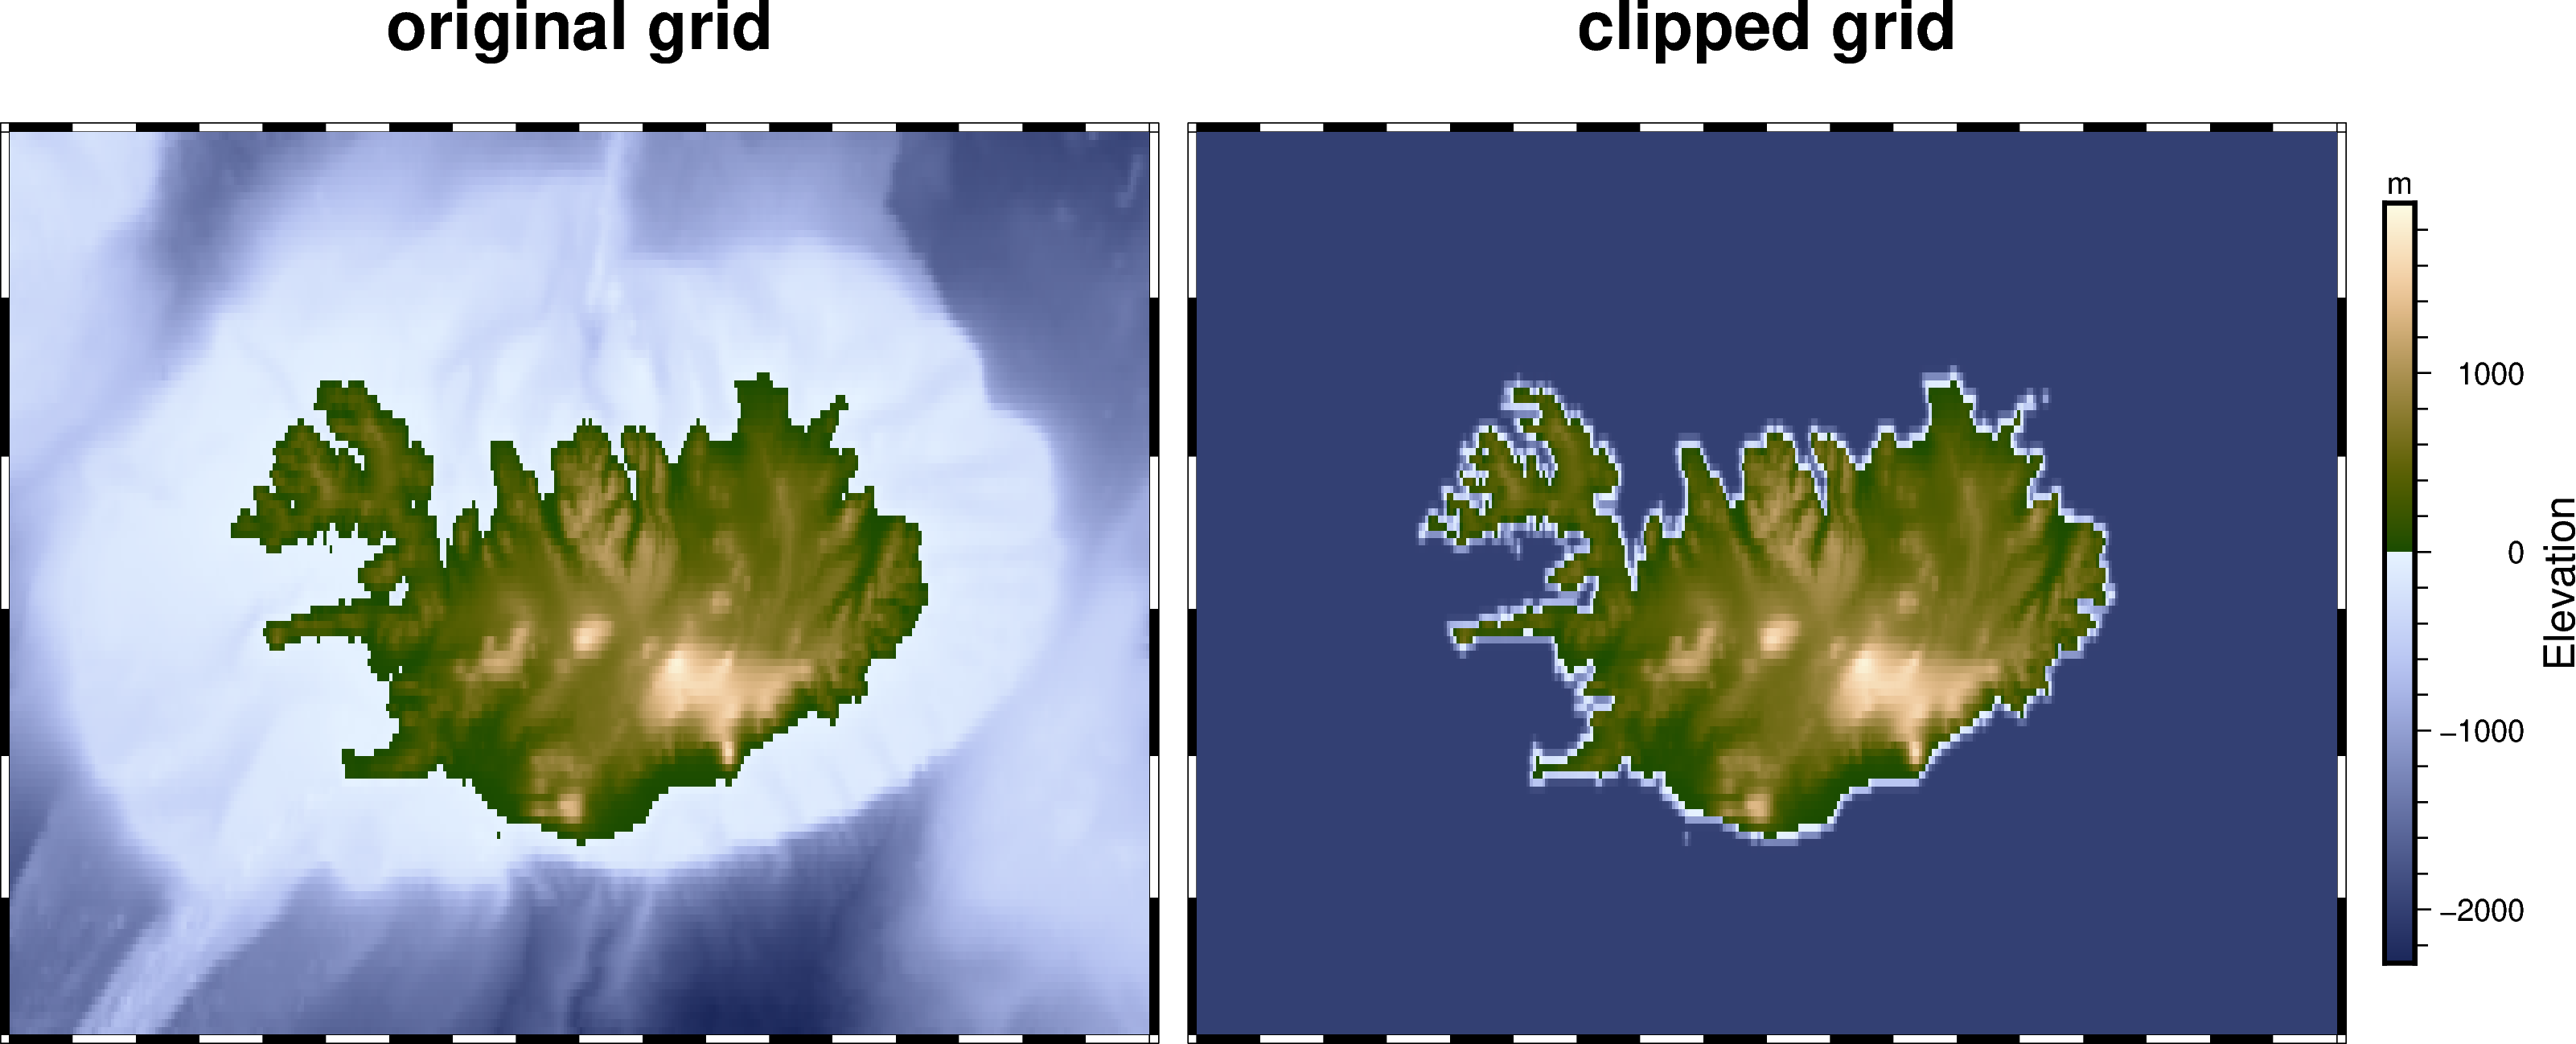

In [41]:
import pygmt

fig = pygmt.Figure()

# Define region of interest around Iceland
region = [-28, -10, 62, 68]

# Load sample grid (3 arc minute global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution="03m", region=region)

# Plot original grid
fig.basemap(region=region, projection="M12c", frame=["f", '+t"original grid"'])
fig.grdimage(grid=grid, cmap="oleron")

# Shift plot origin of the second map by "width of the first map + 0.5 cm"
# in x direction
fig.shift_origin(xshift="w+0.5c")

# Set all grid points < 0 m to a value of -2000 m.
grid = pygmt.grdclip(grid, below=[0, -2000])

# Plot clipped grid
fig.basemap(region=region, projection="M12c", frame=["f", '+t"clipped grid"'])
fig.grdimage(grid=grid)
fig.colorbar(frame=["x+lElevation", "y+lm"], position="JMR+o0.5c/0c+w8c")

fig.show()

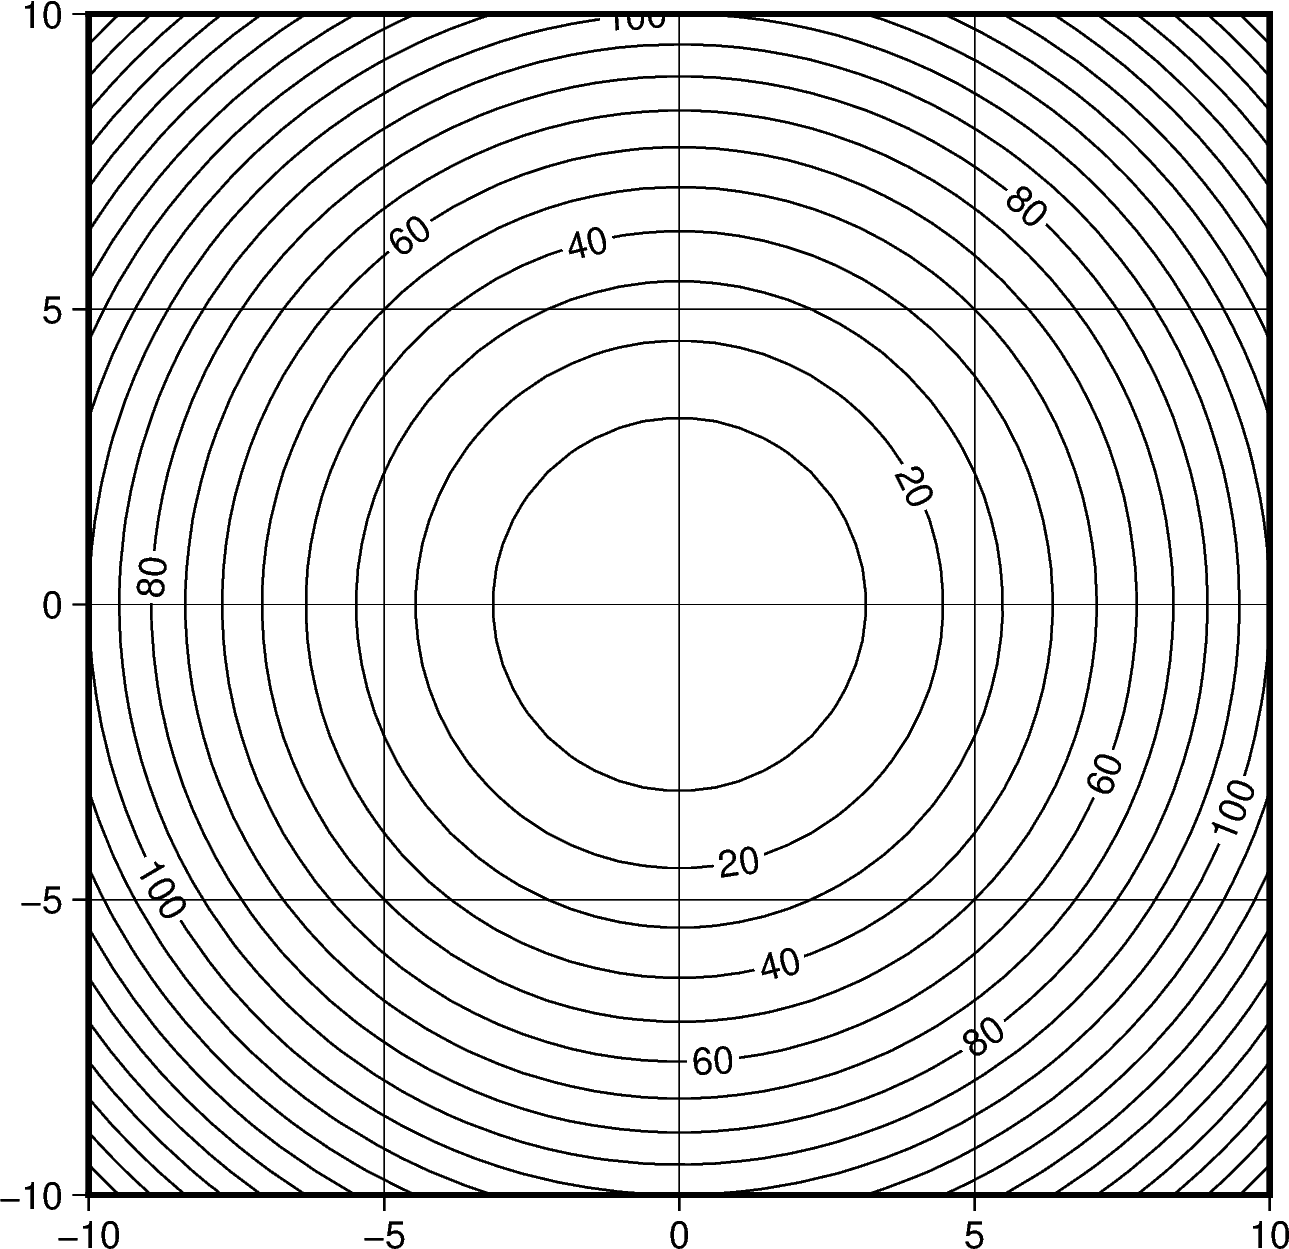

In [42]:
import numpy as np
import pygmt

# build the contours underlying data with the function z = x^2 + y^2
X, Y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = X ** 2 + Y ** 2
x, y, z = X.flatten(), Y.flatten(), Z.flatten()


fig = pygmt.Figure()
fig.contour(
    region=[-10, 10, -10, 10],
    projection="X10c/10c",
    frame="ag",
    pen="0.5p",
    # pass the data as 3 1d data columns
    x=x,
    y=y,
    z=z,
    # set the contours z values intervals to 10
    levels=10,
    # set the contours annotation intervals to 20
    annotation=20,
)
fig.show()

grdimage [WARNING]: Your CPT is categorical. Enabling -nn+a to avoid interpolation across categories.


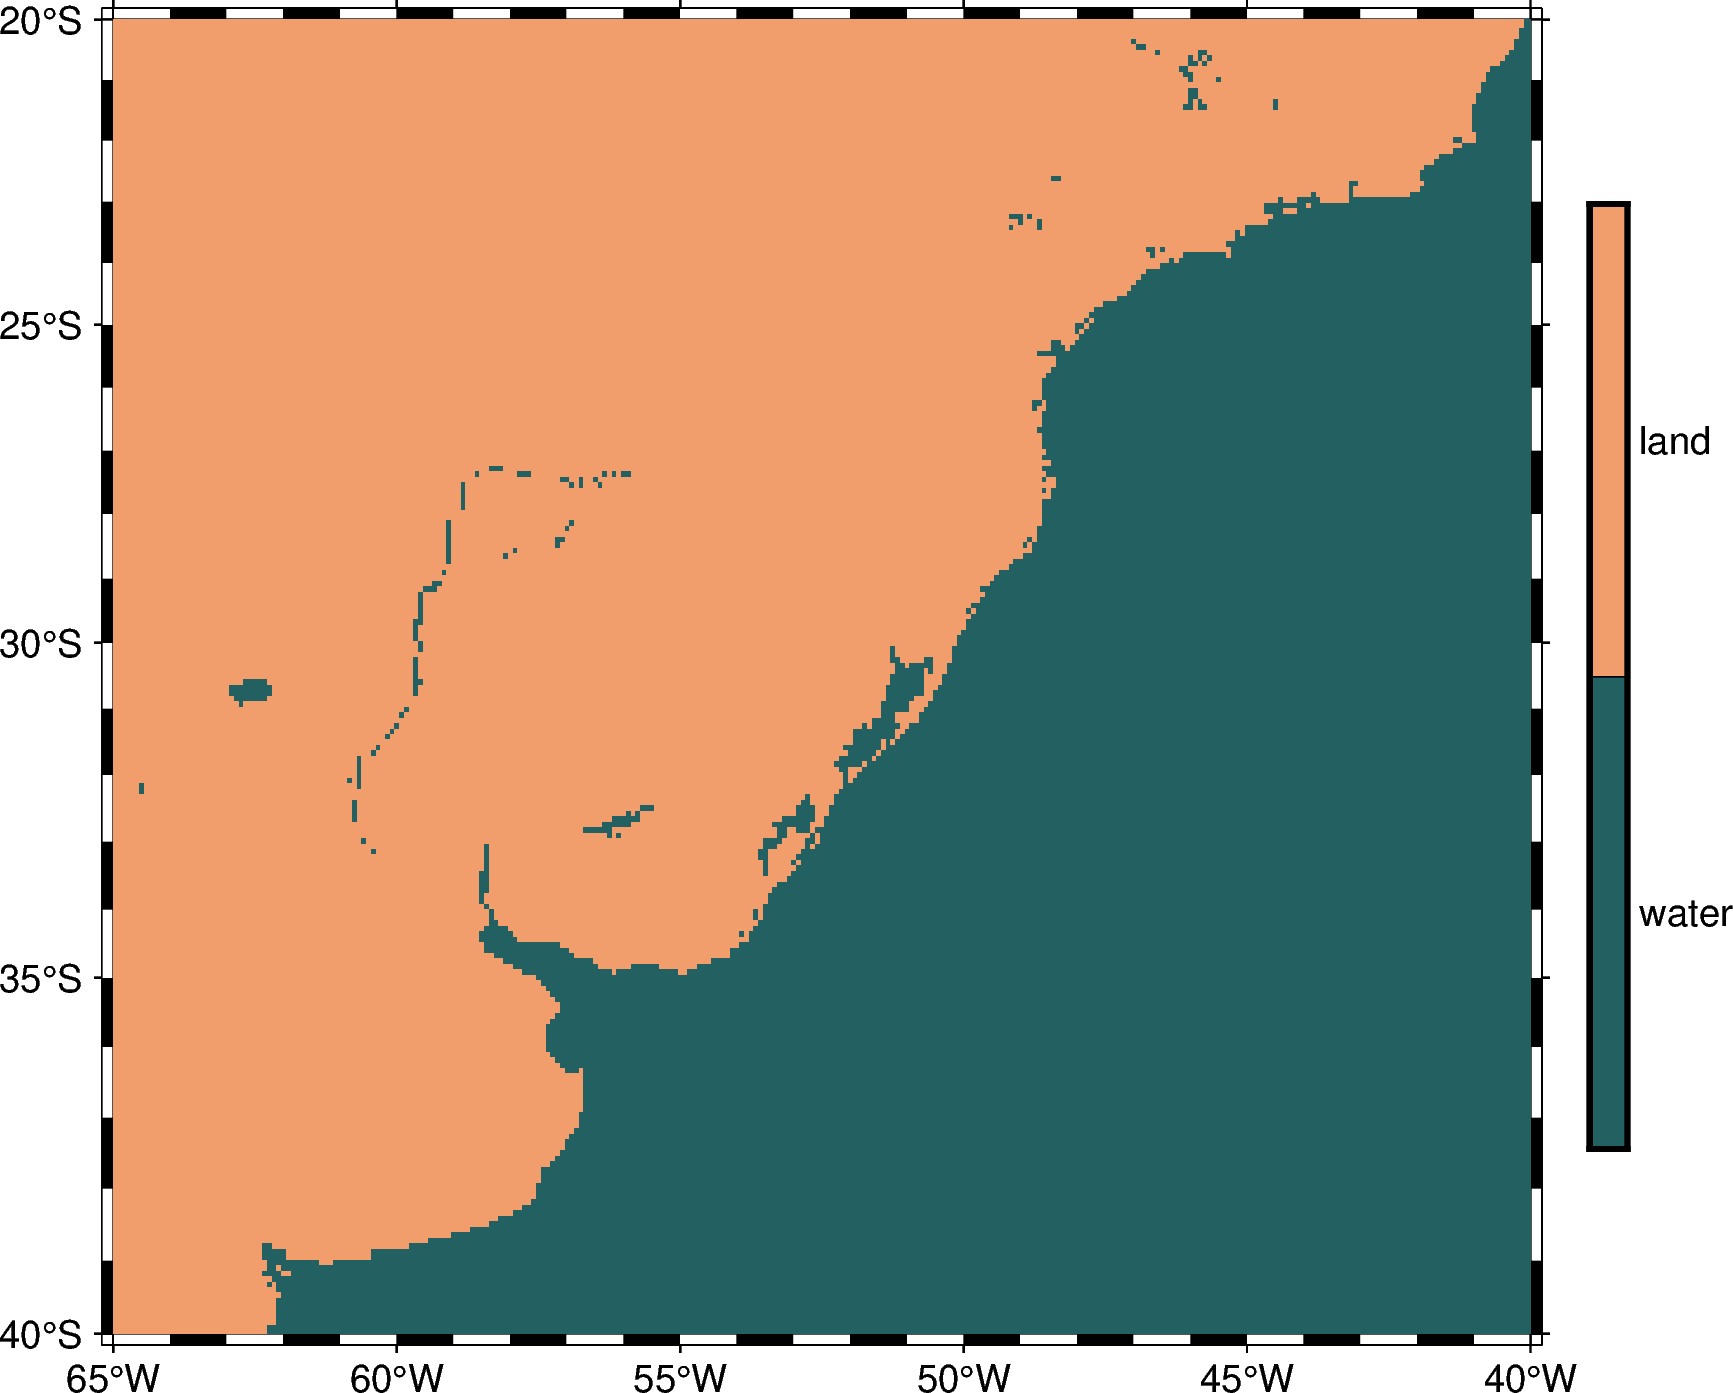

In [43]:
import pygmt

fig = pygmt.Figure()

# Define region of interest
region = [-65, -40, -40, -20]

# Assign a value of 0 for all water masses and a value of 1 for all land
# masses.
# Use shoreline data with (l)ow resolution and set the grid spacing to
# 5 arc minute in x and y direction.
grid = pygmt.grdlandmask(region=region, spacing="5m", maskvalues=[0, 1], resolution="l")

# Plot clipped grid
fig.basemap(region=region, projection="M12c", frame=True)

# Define a colormap to be used for two categories, define the range of the
# new discrete CPT using series=(lowest_value, highest_value, interval),
# use color_model="+cwater,land" to write the discrete color palette
# "batlow" in categorical format and add water/land as annotations for the
# colorbar.
pygmt.makecpt(cmap="batlow", series=(0, 1, 1), color_model="+cwater,land")

fig.grdimage(grid=grid, cmap=True)
fig.colorbar(position="JMR+o0.5c/0c+w8c")

fig.show()

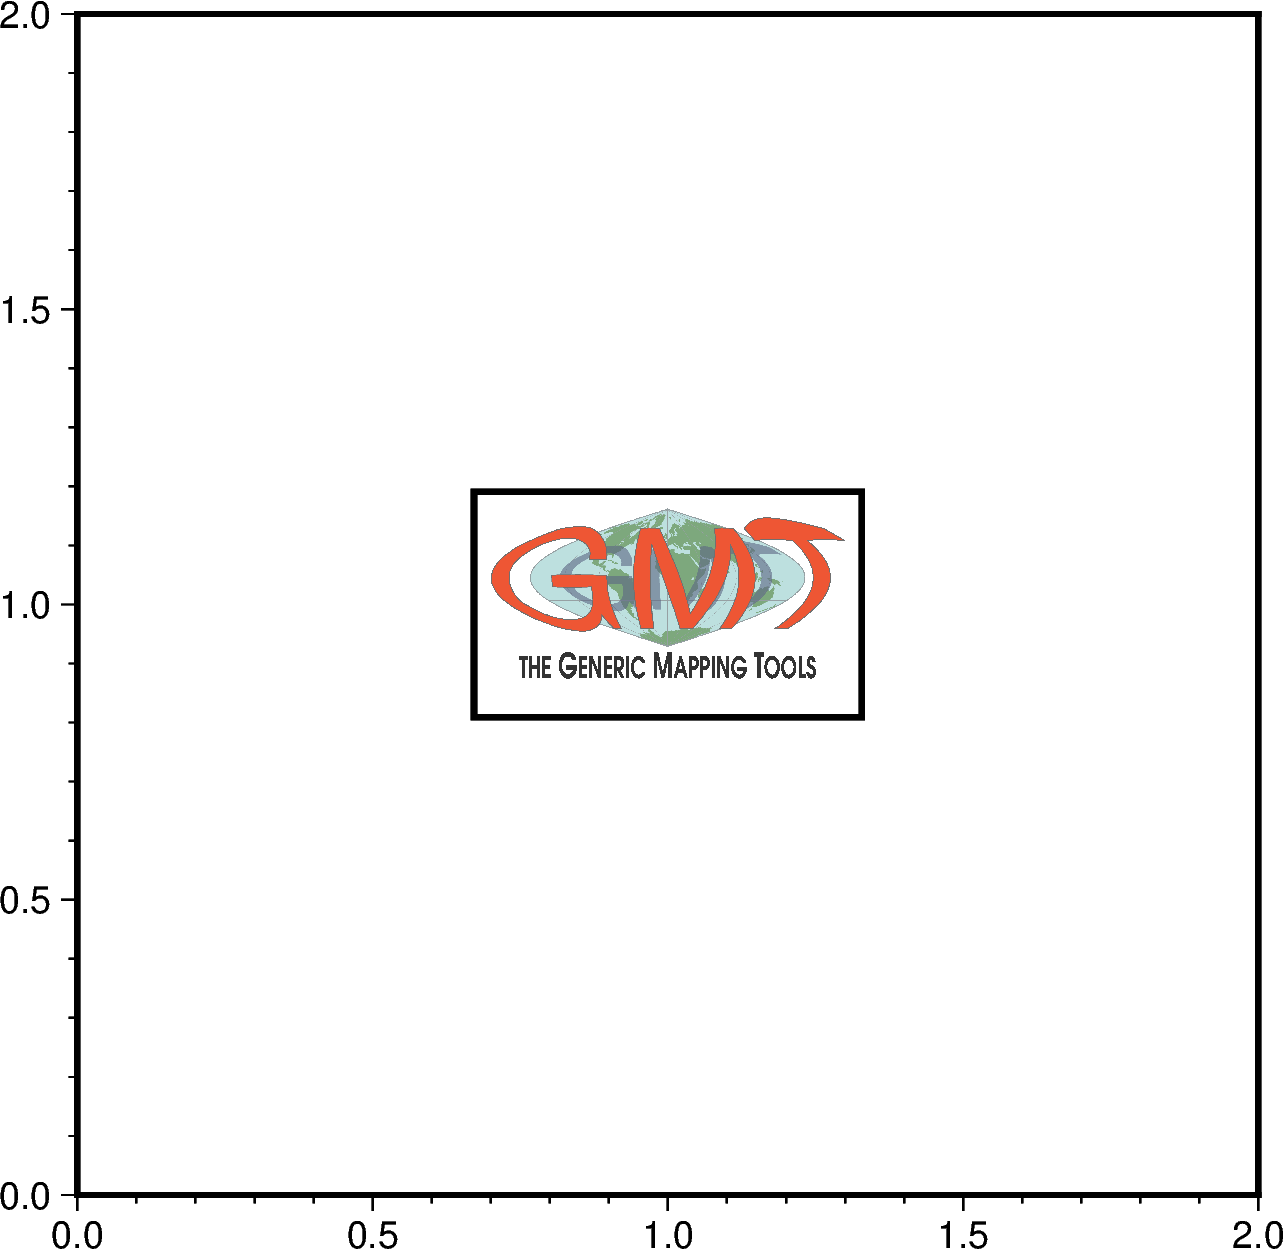

In [44]:
import os

import pygmt

fig = pygmt.Figure()
fig.basemap(region=[0, 2, 0, 2], projection="X10c", frame=True)

# place and center the GMT logo from the GMT website to the position 1/1
# on a basemap, scaled up to be 3 cm wide and draw a rectangular border
# around the image
fig.image(
    imagefile="https://www.generic-mapping-tools.org/_static/gmt-logo.png",
    position="g1/1+w3c+jCM",
    box=True,
)

# clean up the downloaded image in the current directory
os.remove("gmt-logo.png")

fig.show()

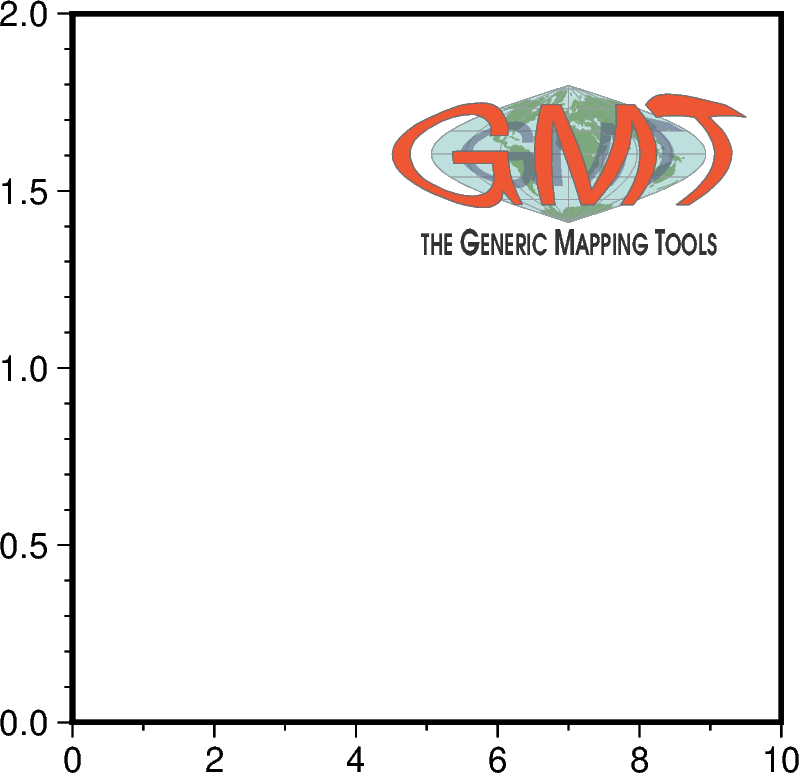

In [48]:
import pygmt

fig = pygmt.Figure()
fig.basemap(region=[0, 10, 0, 2], projection="X6c", frame=True)

# add the GMT logo in the Top Right corner of the current map,
# scaled up to be 3 cm wide and offset by 0.3 cm in X direction
# and 0.6 cm in Y direction.
fig.logo(position="jTR+o0.3c/0.6c+w3c")

fig.show()

gmtwhich [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtwhich [NOTICE]: SRTM15 Earth Relief at 1x1 arc degrees reduced by Gaussian Cartesian filtering (111.2 km fullwidth) [Sandwell et al., 2022].
gmtwhich [NOTICE]:   -> Download grid file [114K]: earth_relief_01d_p.grd


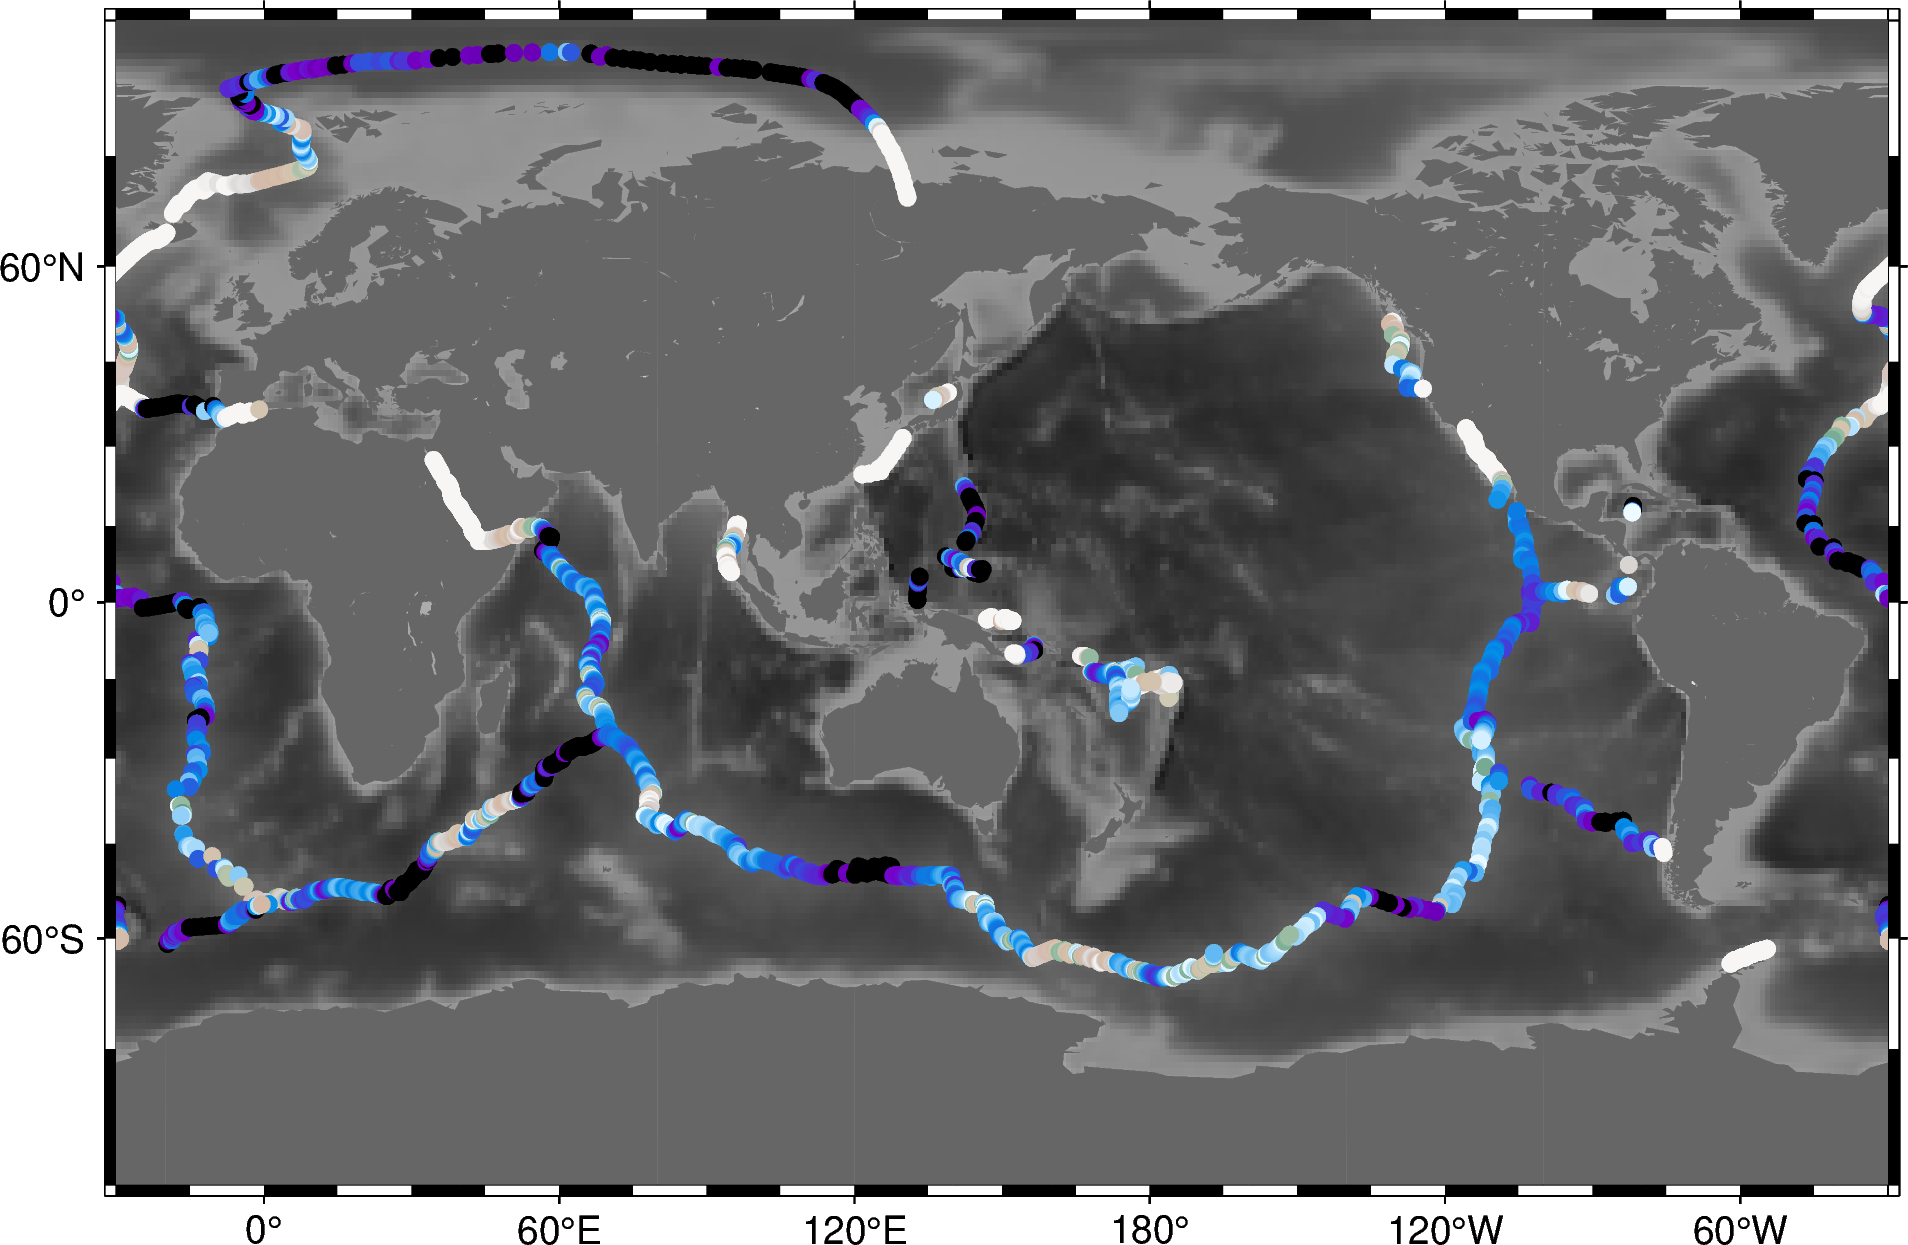

In [46]:
import pygmt

# Load sample grid and point datasets
grid = pygmt.datasets.load_earth_relief()
points = pygmt.datasets.load_ocean_ridge_points()
# Sample the bathymetry along the world's ocean ridges at specified track
# points
track = pygmt.grdtrack(points=points, grid=grid, newcolname="bathymetry")

fig = pygmt.Figure()
# Plot the earth relief grid on Cylindrical Stereographic projection, masking
# land areas
fig.basemap(region="g", projection="Cyl_stere/150/-20/15c", frame=True)
fig.grdimage(grid=grid, cmap="gray")
fig.coast(land="#666666")
# Plot the sampled bathymetry points using circles (c) of 0.15 cm size
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=track.longitude,
    y=track.latitude,
    style="c0.15c",
    cmap="terra",
    color=(track.bathymetry - track.bathymetry.mean()) / track.bathymetry.std(),
)
fig.show()

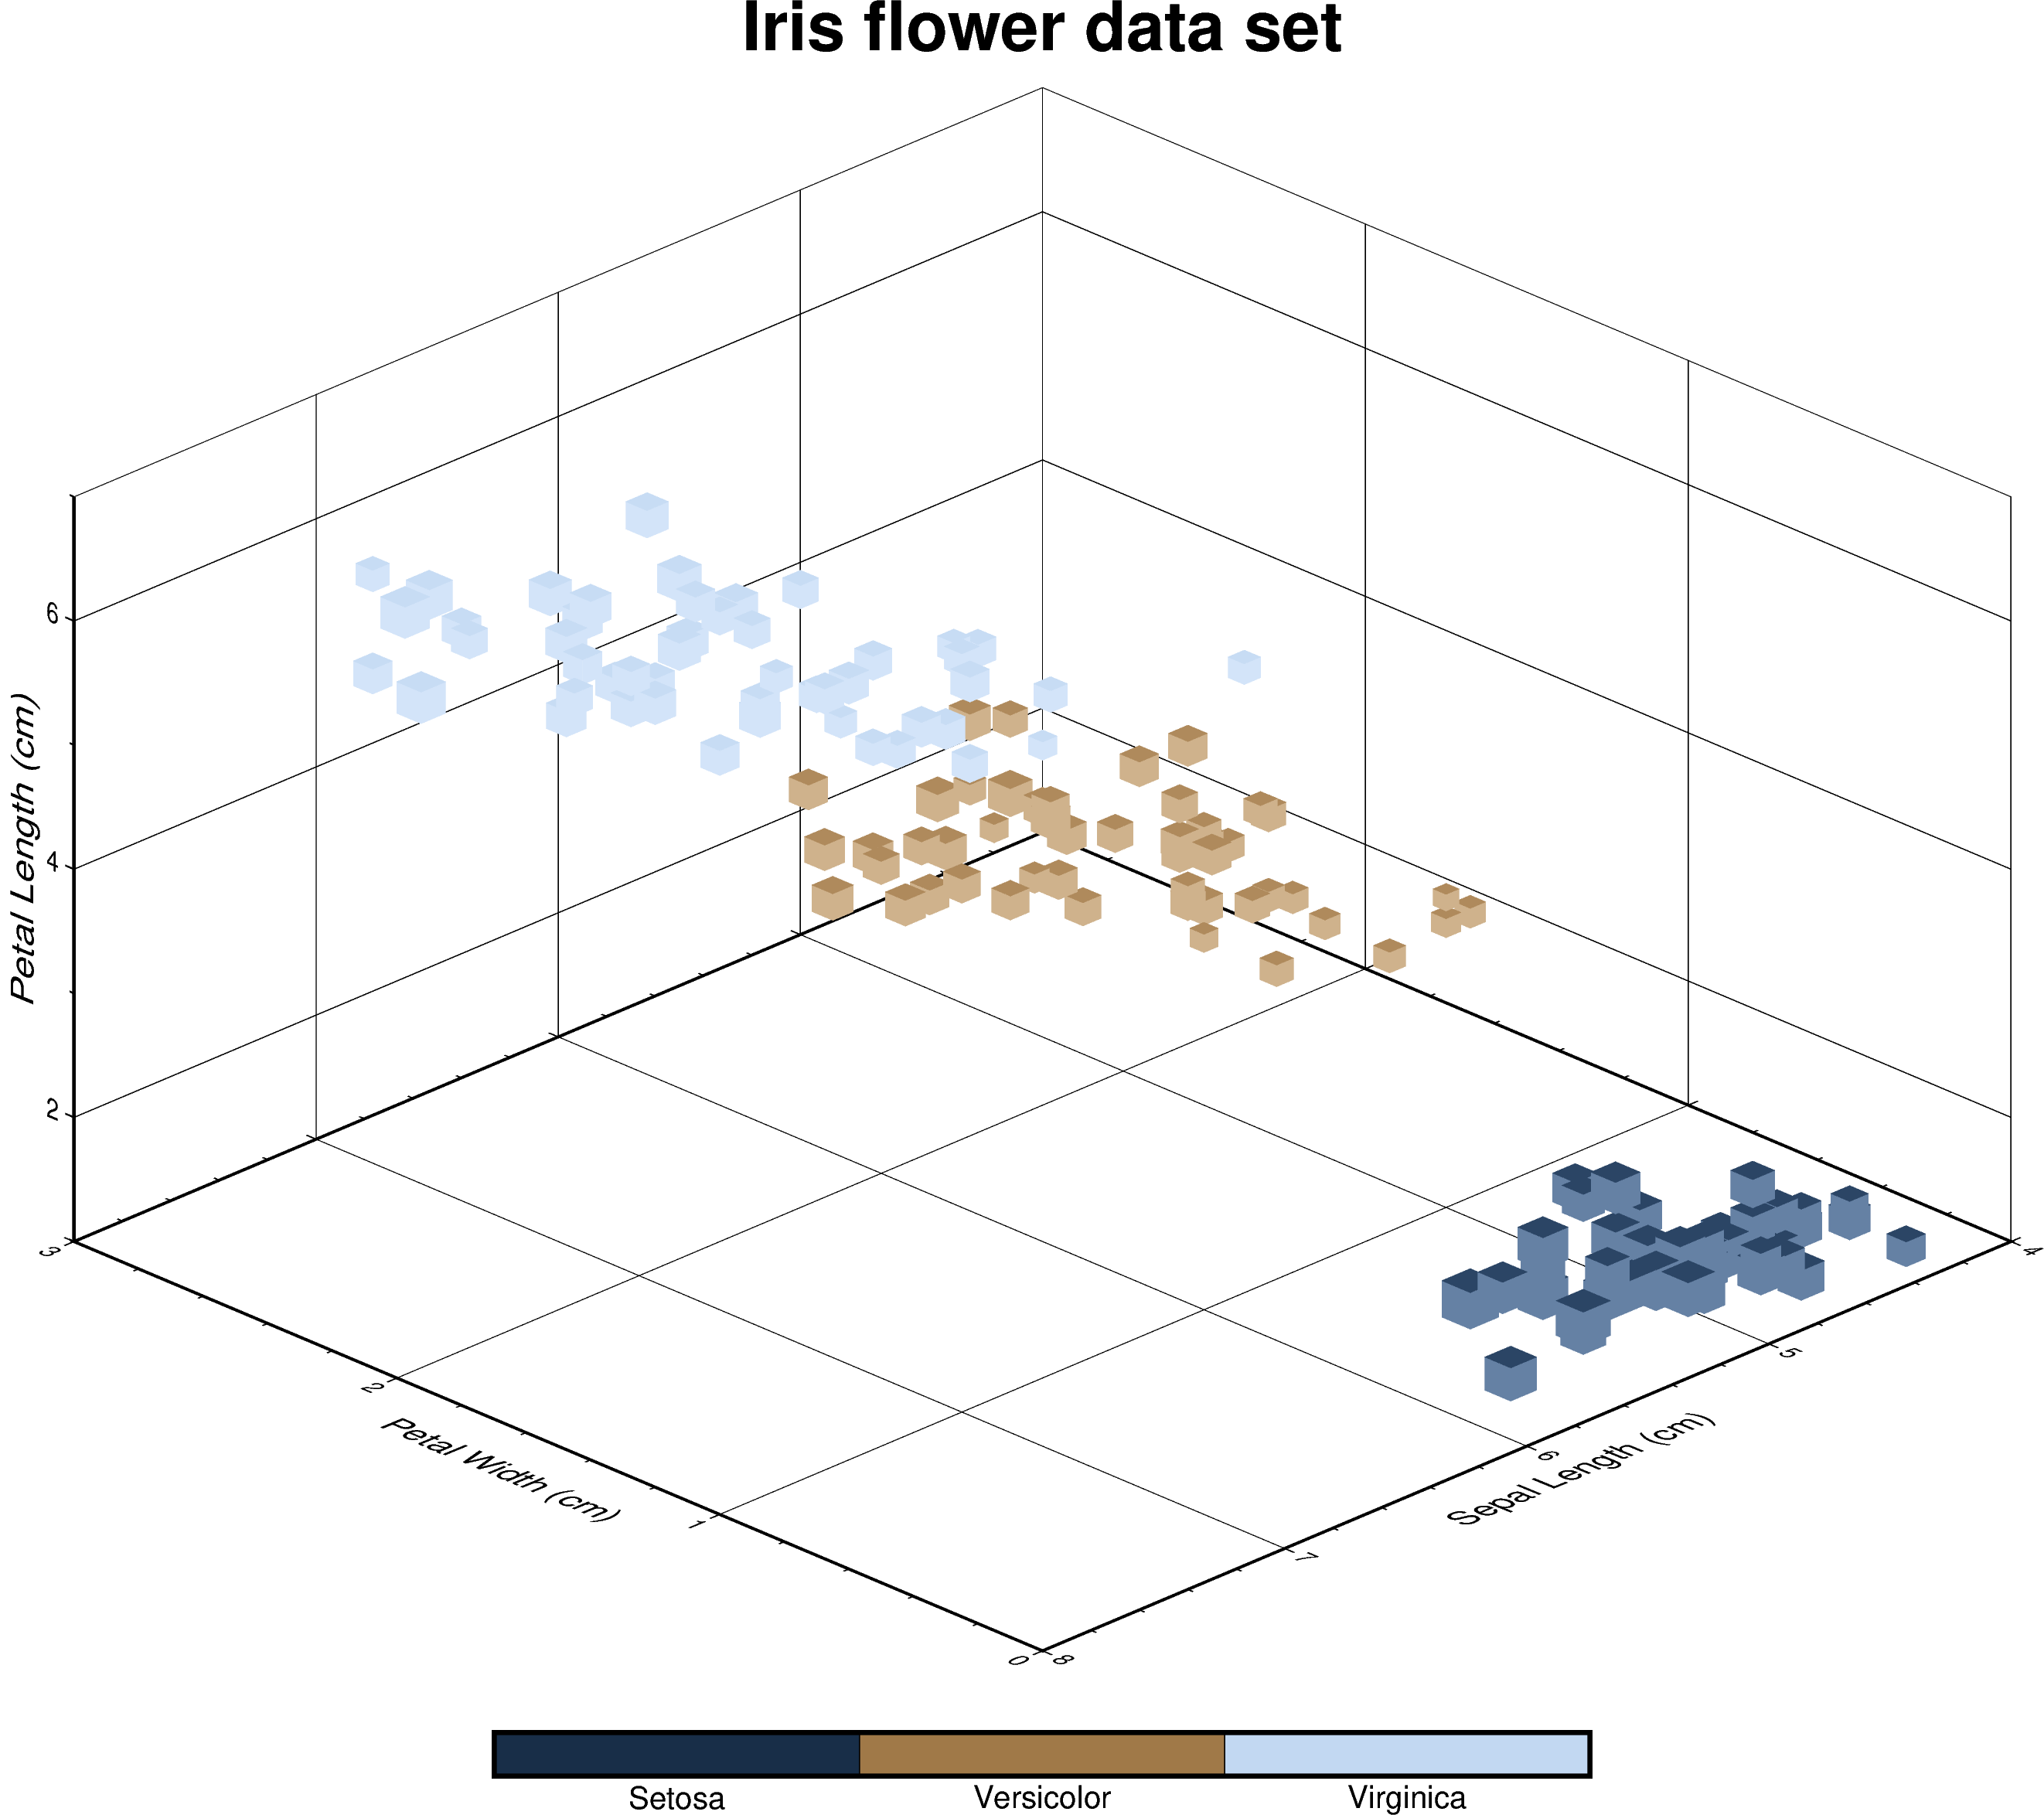

In [47]:
import pandas as pd
import pygmt

# Load sample iris data and convert 'species' column to categorical dtype
df = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/iris.csv")
df.species = df.species.astype(dtype="category")

# Use pygmt.info to get region bounds (xmin, xmax, ymin, ymax, zmin, zmax)
# The below example will return a numpy array [0.0, 3.0, 4.0, 8.0, 1.0, 7.0]
region = pygmt.info(
    data=df[["petal_width", "sepal_length", "petal_length"]],  # x, y, z columns
    per_column=True,  # report the min/max values per column as a numpy array
    # round the min/max values of the first three columns to the nearest
    # multiple of 1, 2 and 0.5, respectively
    spacing=(1, 2, 0.5),
)

# Make a 3D scatter plot, coloring each of the 3 species differently
fig = pygmt.Figure()

# Define a colormap to be used for three categories, define the range of the
# new discrete CPT using series=(lowest_value, highest_value, interval), use
# color_model="+cSetosa,Versicolor,Virginica" to write the discrete color
# palette "cubhelix" in categorical format and add the species names as
# annotations for the colorbar
pygmt.makecpt(
    cmap="cubhelix", color_model="+cSetosa,Versicolor,Virginica", series=(0, 2, 1)
)

fig.plot3d(
    # Use petal width, sepal length and petal length as x, y and z data input,
    # respectively
    x=df.petal_width,
    y=df.sepal_length,
    z=df.petal_length,
    # Vary each symbol size according to another feature (sepal width, scaled
    # by 0.1)
    size=0.1 * df.sepal_width,
    # Use 3D cubes ("u") as symbols, with size in centimeter units ("c")
    style="uc",
    # Points colored by categorical number code
    color=df.species.cat.codes.astype(int),
    # Use colormap created by makecpt
    cmap=True,
    # Set map dimensions (xmin, xmax, ymin, ymax, zmin, zmax)
    region=region,
    # Set frame parameters
    frame=[
        'WsNeZ3+t"Iris flower data set"',  # z axis label positioned on 3rd corner, add title
        'xafg+l"Petal Width (cm)"',
        'yafg+l"Sepal Length (cm)"',
        'zafg+l"Petal Length (cm)"',
    ],
    # Set perspective to azimuth NorthWest (315°), at elevation 25°
    perspective=[315, 25],
    # Vertical exaggeration factor
    zscale=1.5,
)

# Add colorbar legend
fig.colorbar(xshift=3.1)

fig.show()

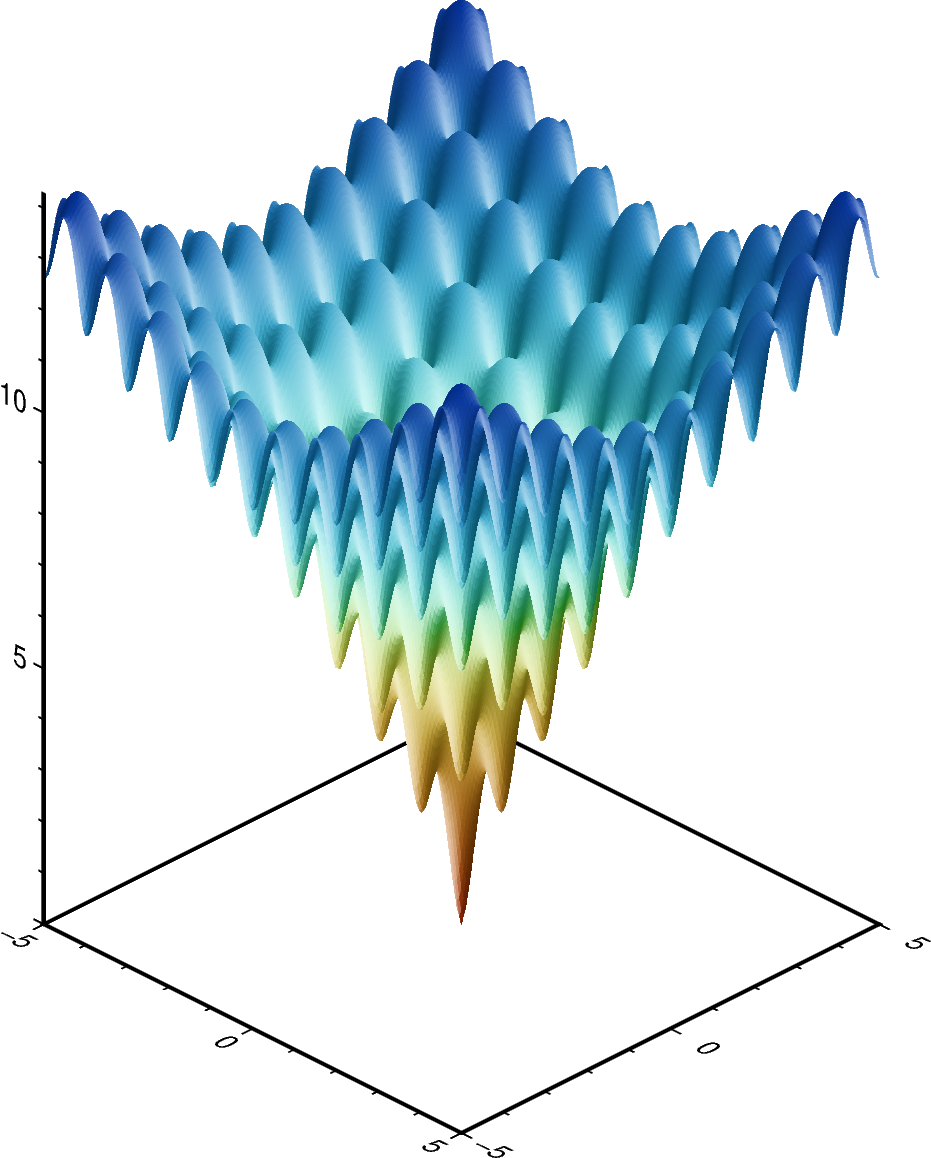

In [49]:
import numpy as np
import pygmt
import xarray as xr


# Define an interesting function of two variables, see:
# https://en.wikipedia.org/wiki/Ackley_function
def ackley(x, y):
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + np.exp(1)
        + 20
    )


# Create gridded data
INC = 0.05
x = np.arange(-5, 5 + INC, INC)
y = np.arange(-5, 5 + INC, INC)
data = xr.DataArray(ackley(*np.meshgrid(x, y)), coords=(x, y))

fig = pygmt.Figure()

# Plot grid as a 3-D surface
SCALE = 0.5  # in centimeter
fig.grdview(
    data,
    frame=["a5f1", "za5f1"],
    projection=f"x{SCALE}c",
    zscale=f"{SCALE}c",
    surftype="s",
    cmap="roma",
    perspective=[135, 30],  # Azimuth southeast (135°), at elevation 30°
    shading="+a45",
)

fig.show()

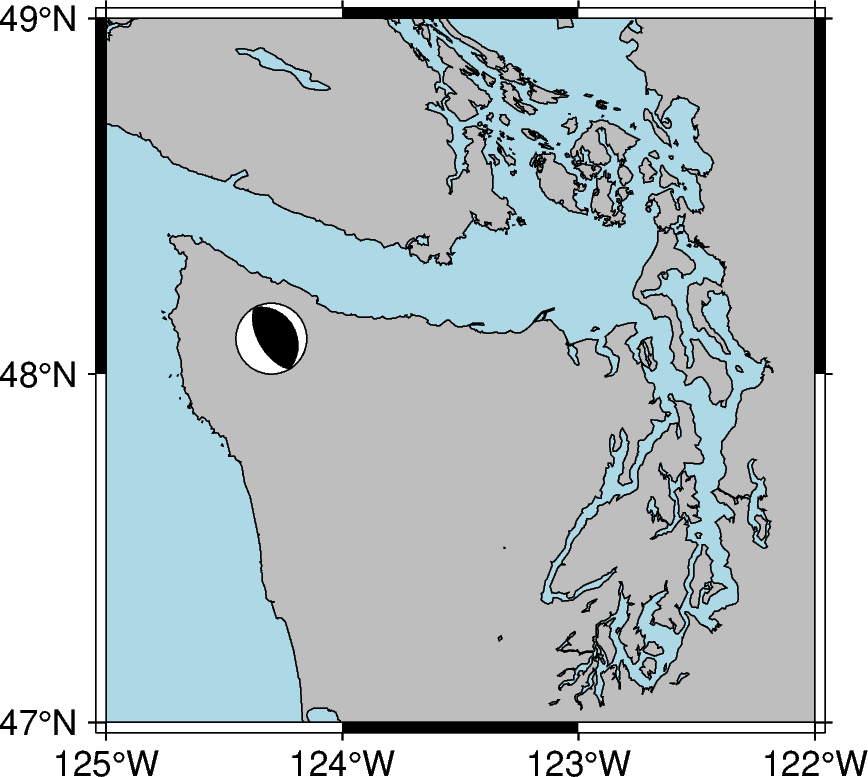

In [51]:
import pygmt

fig = pygmt.Figure()

# generate a basemap near Washington state showing coastlines, land, and water
fig.coast(
    region=[-125, -122, 47, 49],
    projection="M6c",
    land="grey",
    water="lightblue",
    shorelines=True,
    frame="a",
)

# store focal mechanisms parameters in a dict
focal_mechanism = dict(strike=330, dip=30, rake=90, magnitude=3)

# pass the focal mechanism data to meca in addition to the scale and event
# location
fig.meca(focal_mechanism, scale="1c", longitude=-124.3, latitude=48.1, depth=12.0)

fig.show()

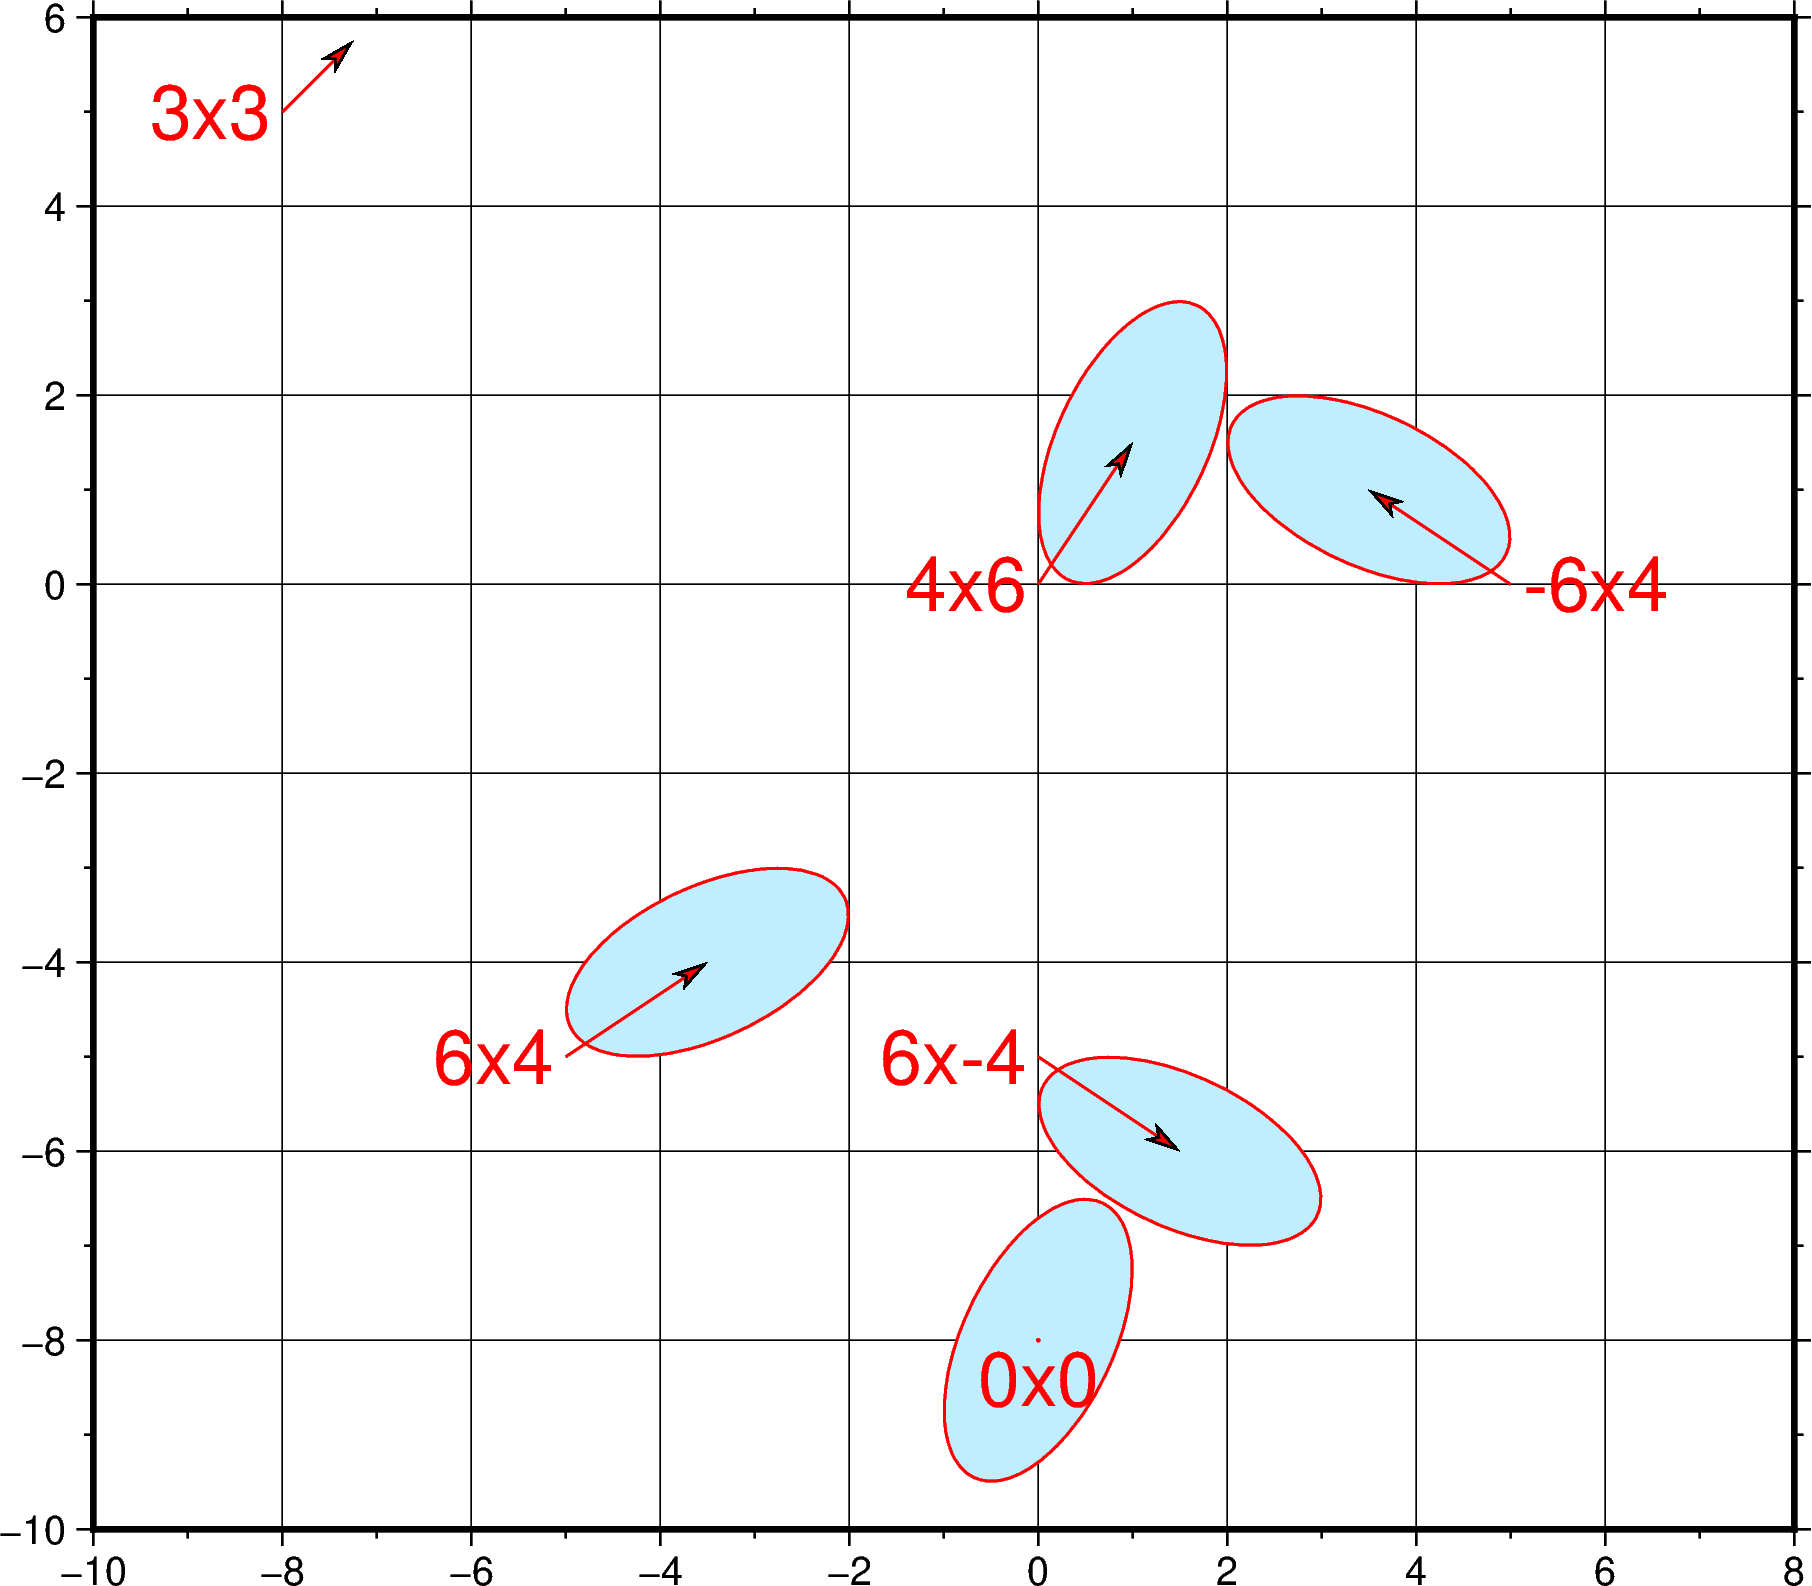

In [52]:
import pandas as pd
import pygmt

fig = pygmt.Figure()
df = pd.DataFrame(
    data={
        "x": [0, -8, 0, -5, 5, 0],
        "y": [-8, 5, 0, -5, 0, -5],
        "east_velocity": [0, 3, 4, 6, -6, 6],
        "north_velocity": [0, 3, 6, 4, 4, -4],
        "east_sigma": [4, 0, 4, 6, 6, 6],
        "north_sigma": [6, 0, 6, 4, 4, 4],
        "correlation_EN": [0.5, 0.5, 0.5, 0.5, -0.5, -0.5],
        "SITE": ["0x0", "3x3", "4x6", "6x4", "-6x4", "6x-4"],
    }
)
fig.velo(
    data=df,
    region=[-10, 8, -10, 6],
    pen="0.6p,red",
    uncertaintycolor="lightblue1",
    line=True,
    spec="e0.2/0.39/18",
    frame=["WSne", "2g2f"],
    projection="x0.8c",
    vector="0.3c+p1p+e+gred",
)

fig.show()

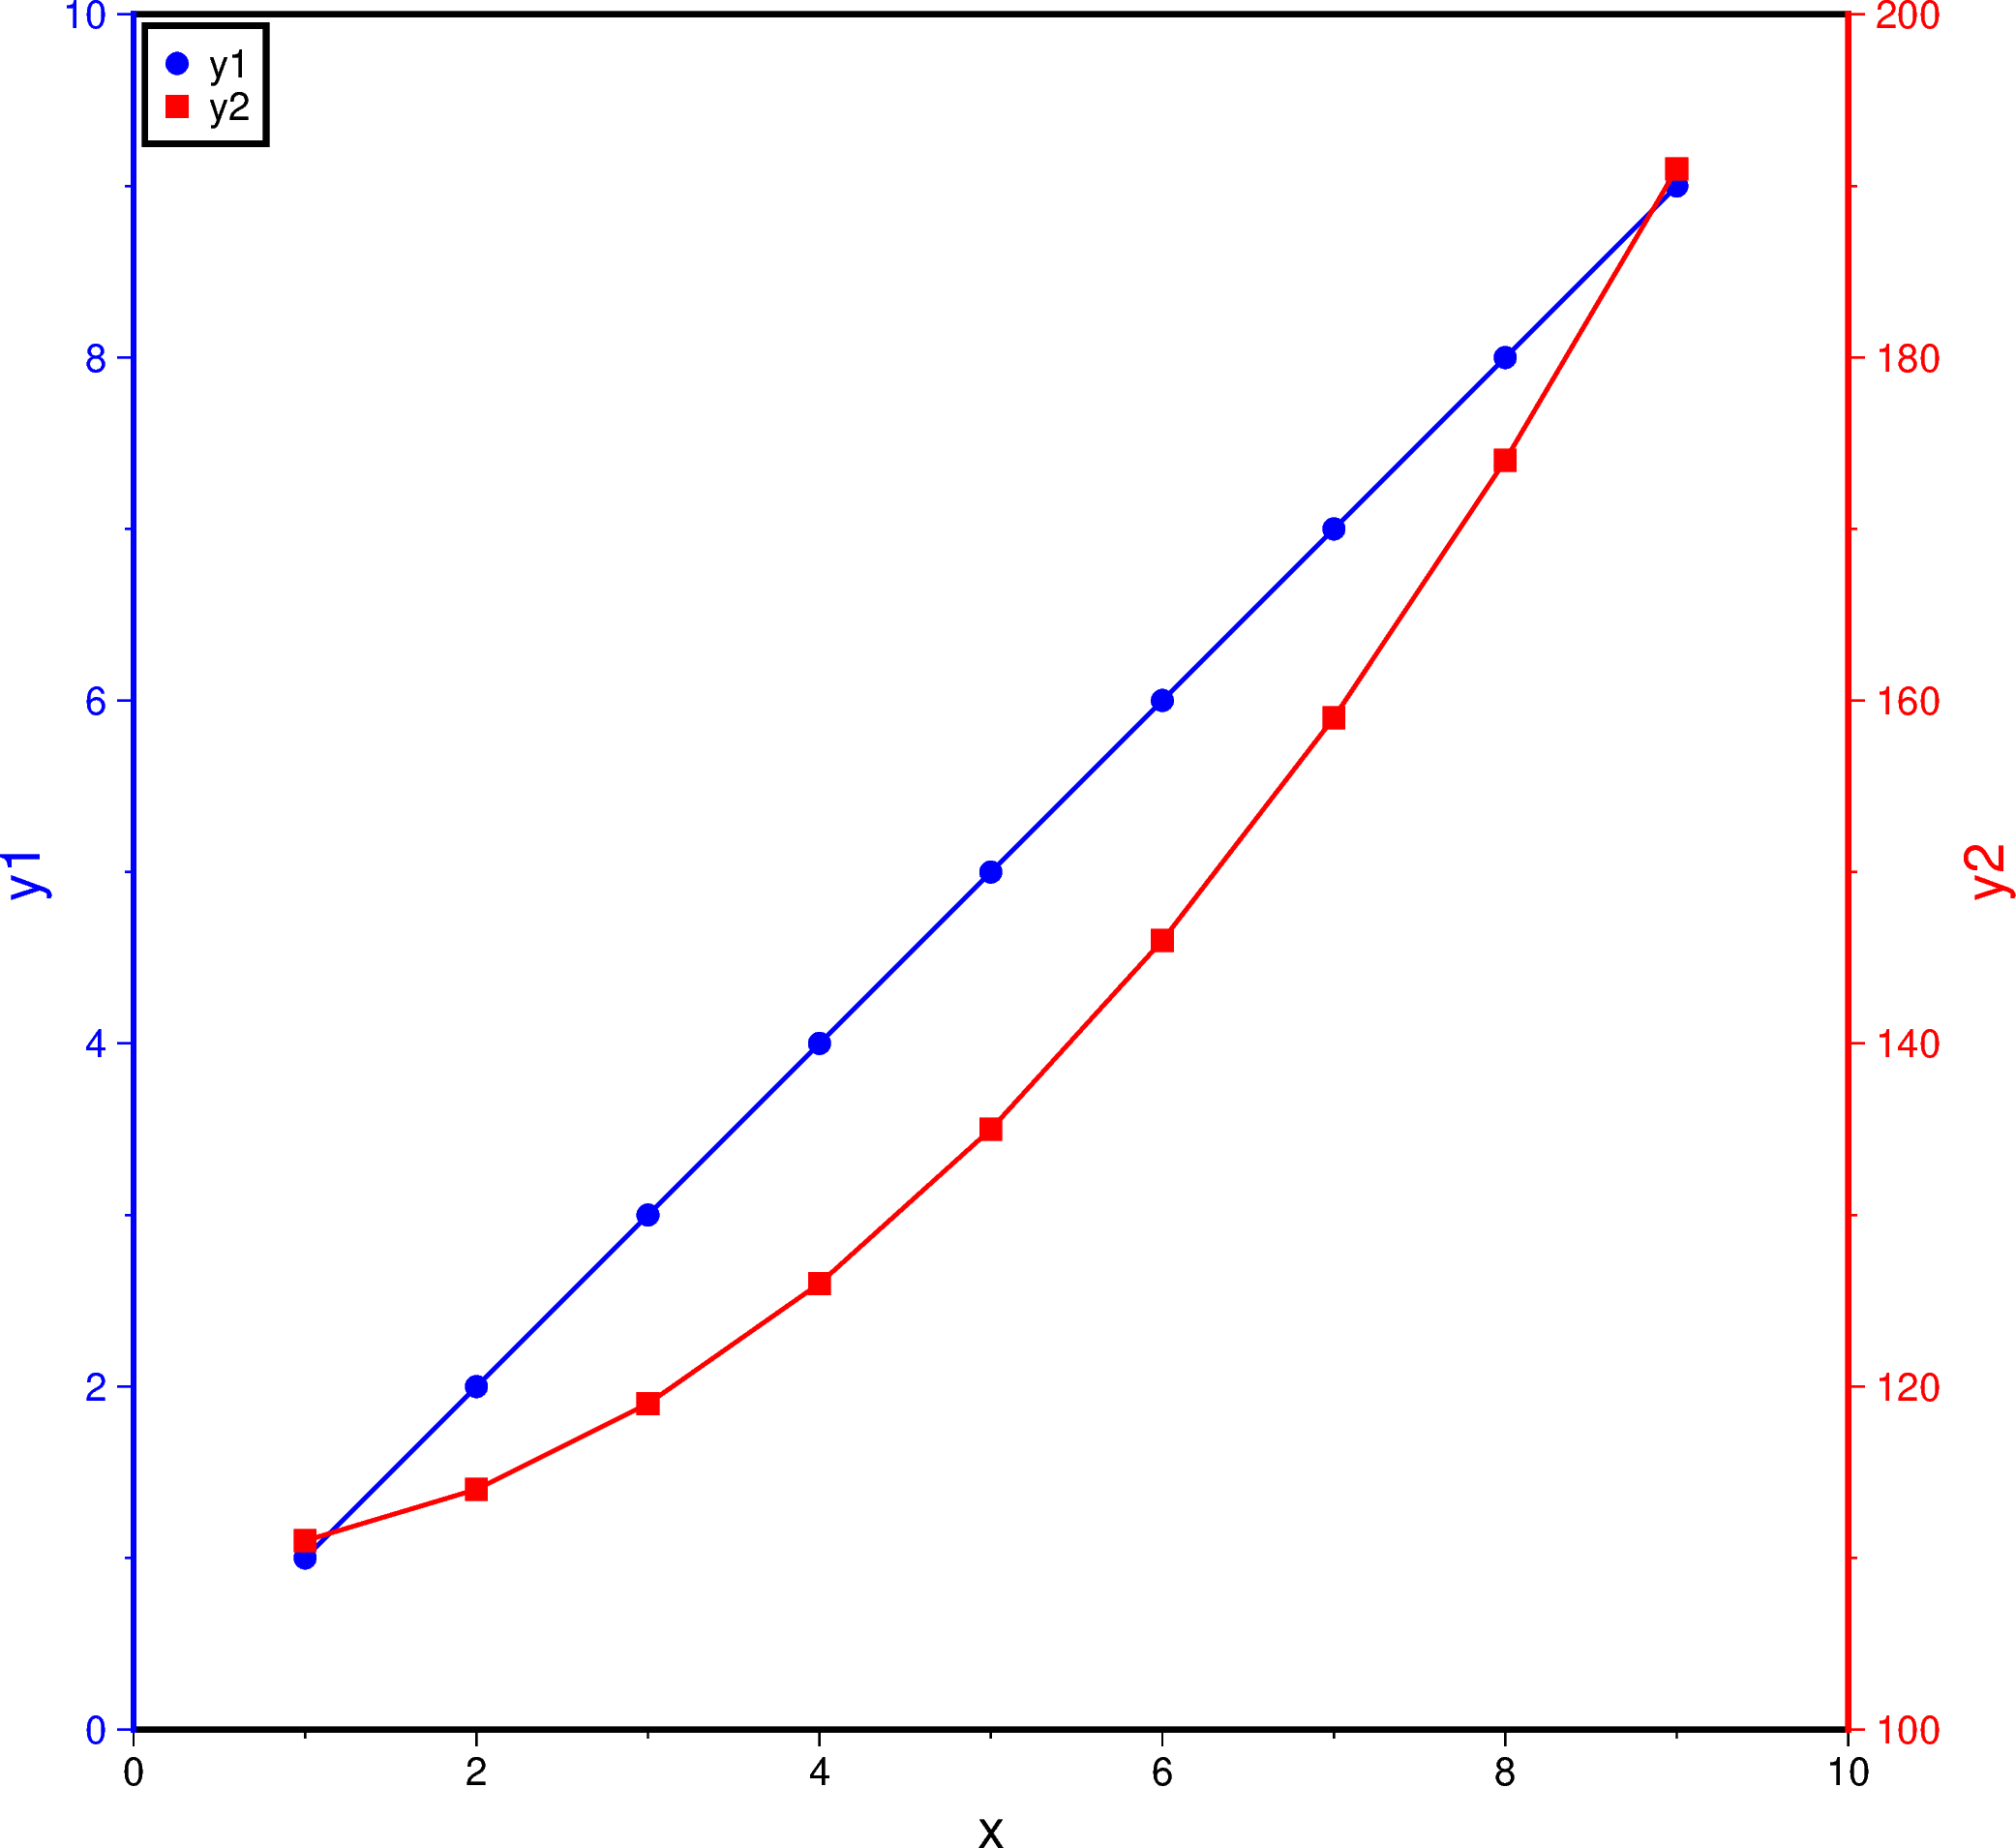

In [53]:
import numpy as np
import pygmt

# Generate two sample Y data from one common X data
x = np.linspace(1.0, 9.0, num=9)
y1 = x
y2 = x ** 2 + 110

fig = pygmt.Figure()

# Plot the common X axes
# The bottom axis (S) is plotted with annotations and tick marks
# The top axis (t) is plotted without annotations and tick marks
# The left and right axes are not drawn
fig.basemap(region=[0, 10, 0, 10], projection="X15c/15c", frame=["St", "xaf+lx"])

# Plot the Y axis for y1 data
# The left axis (W) is plotted with blue annotations, ticks, and label
with pygmt.config(
    MAP_FRAME_PEN="blue",
    MAP_TICK_PEN="blue",
    FONT_ANNOT_PRIMARY="blue",
    FONT_LABEL="blue",
):
    fig.basemap(frame=["W", "yaf+ly1"])

# Plot the line for y1 data
fig.plot(x=x, y=y1, pen="1p,blue")
# Plot points for y1 data
fig.plot(x=x, y=y1, style="c0.2c", color="blue", label="y1")

# Plot the Y axis for y2 data
# The right axis (E) is plotted with red annotations, ticks, and label
with pygmt.config(
    MAP_FRAME_PEN="red",
    MAP_TICK_PEN="red",
    FONT_ANNOT_PRIMARY="red",
    FONT_LABEL="red",
):
    fig.basemap(region=[0, 10, 100, 200], frame=["E", "yaf+ly2"])
# Plot the line for y2 data
fig.plot(x=x, y=y2, pen="1p,red")
# Plot points for y2 data
fig.plot(x=x, y=y2, style="s0.28c", color="red", label="y2")

# Create a legend in the top-left corner of the plot
fig.legend(position="jTL+o0.1c", box=True)

fig.show()

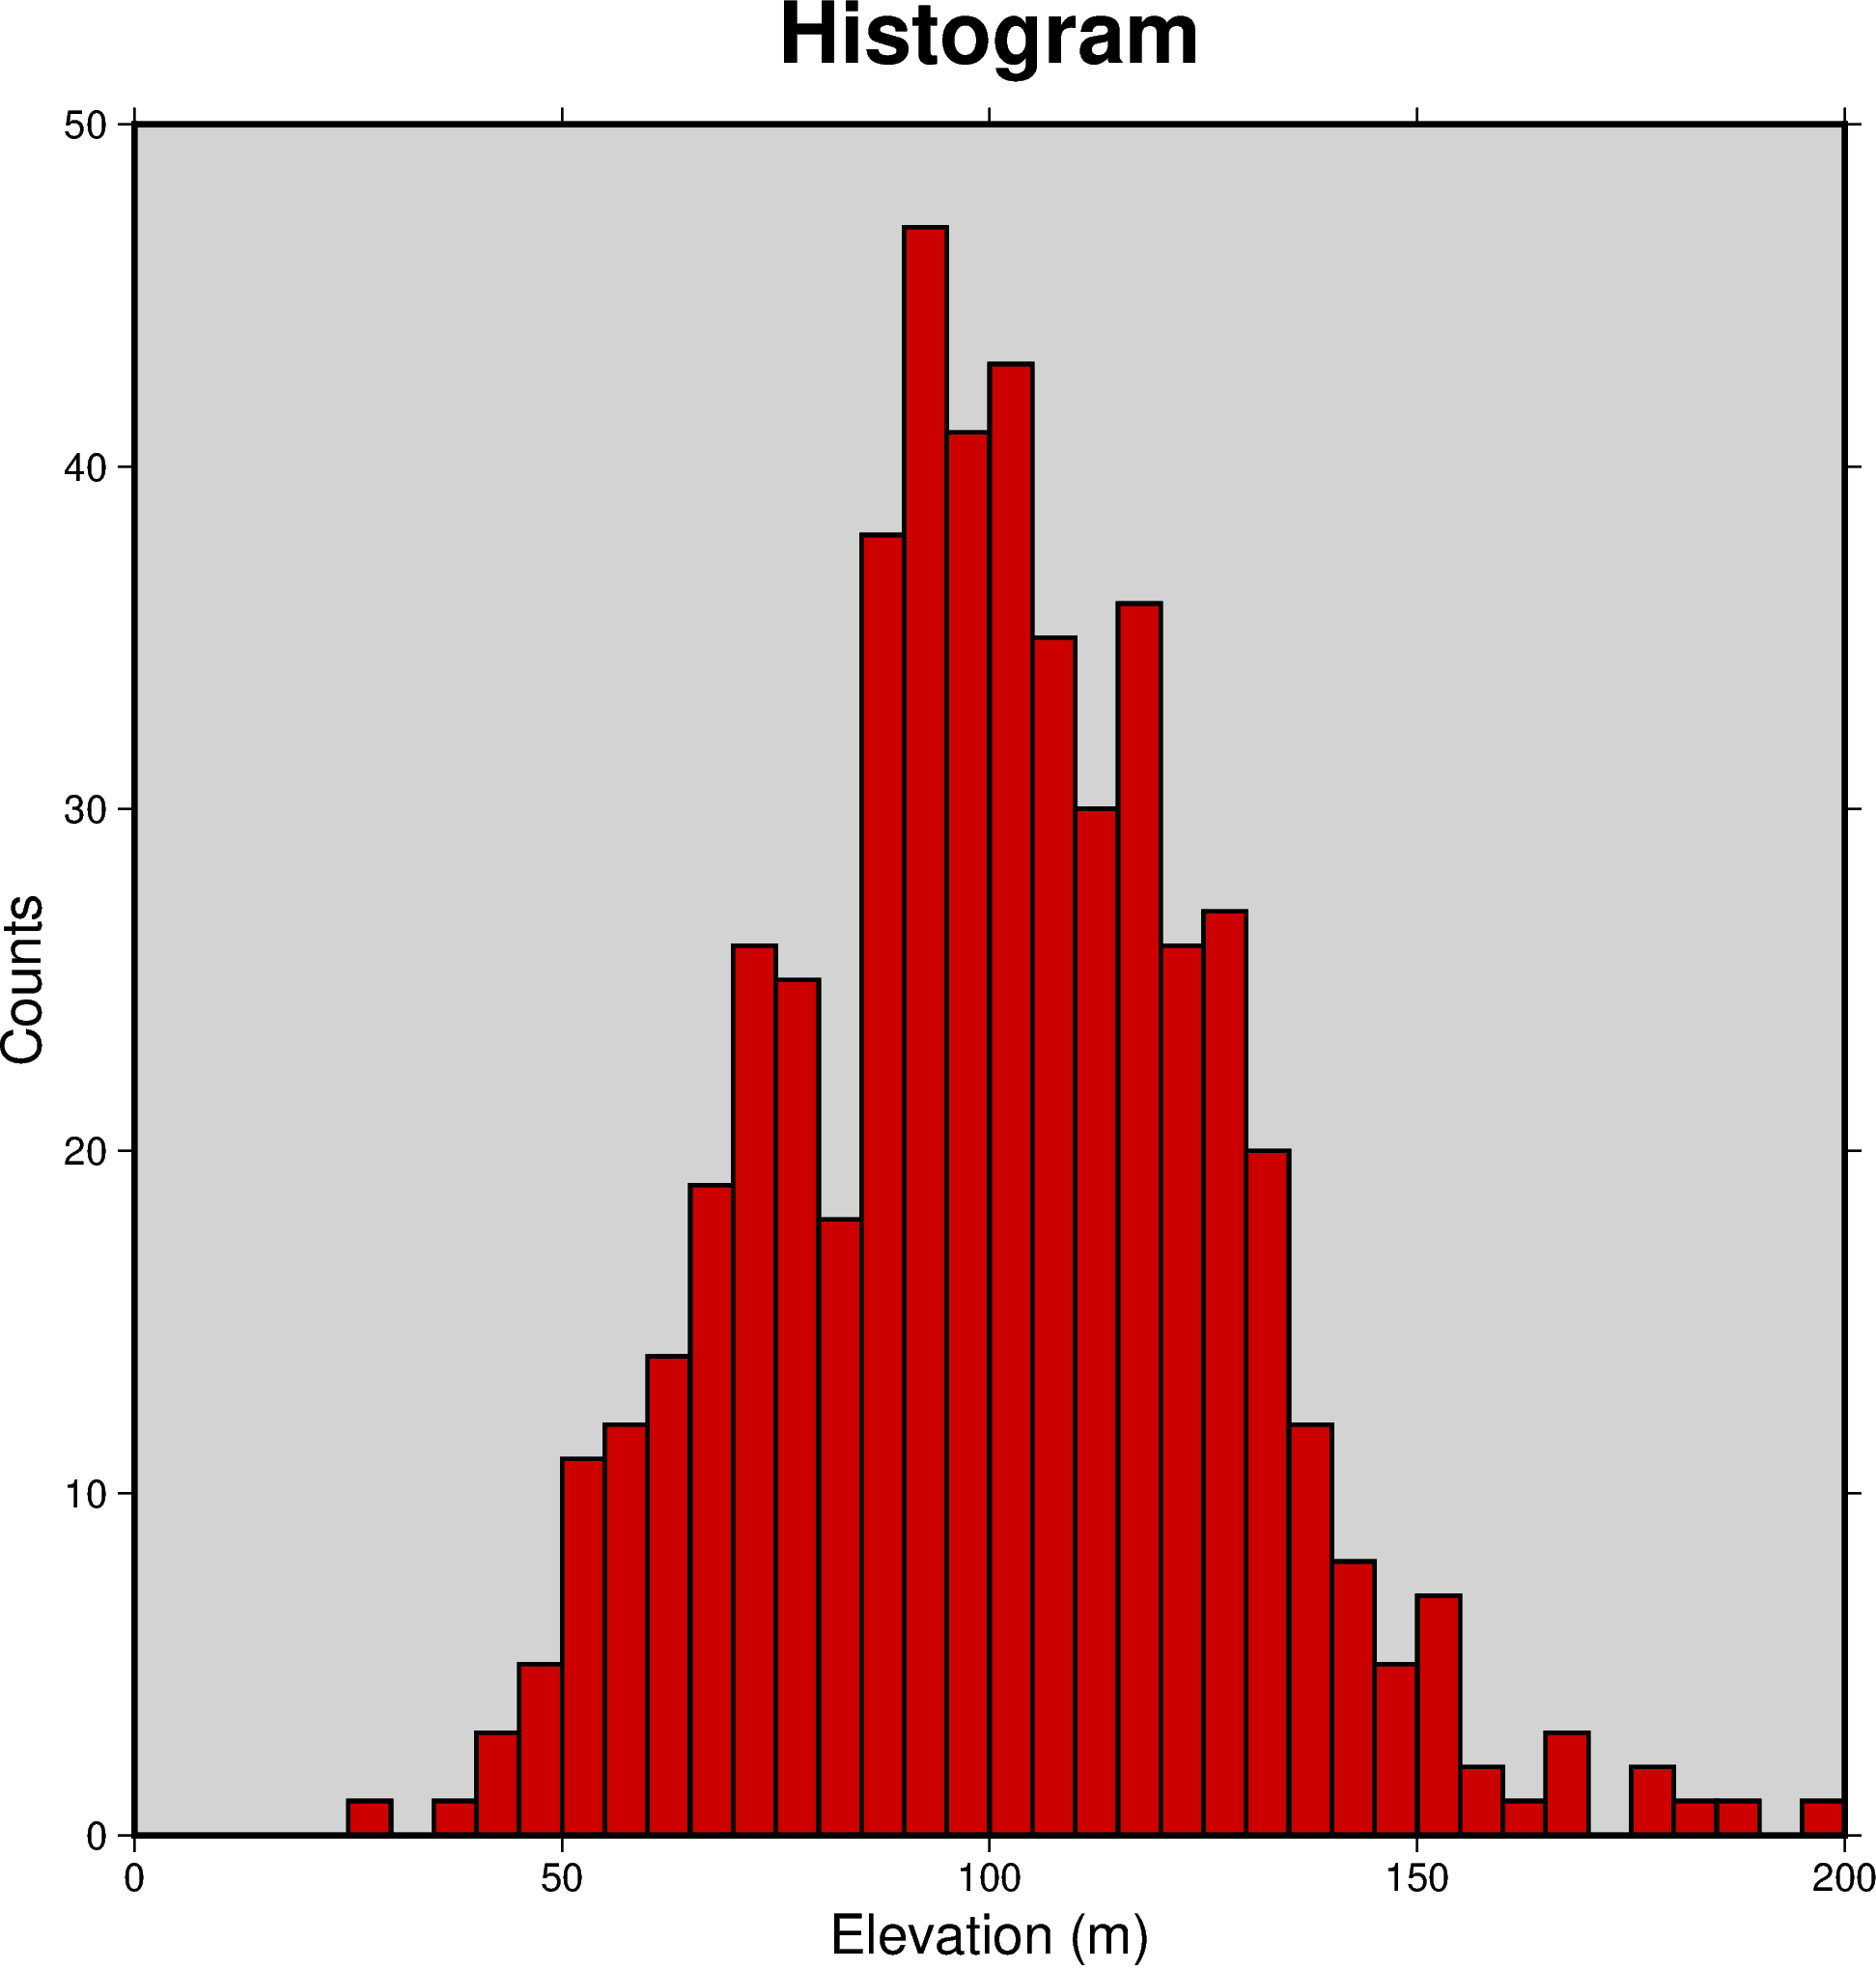

In [54]:
import numpy as np
import pygmt

np.random.seed(100)

# generate random elevation data from a normal distribution
mean = 100  # mean of distribution
stddev = 25  # standard deviation of distribution
data = mean + stddev * np.random.randn(521)

fig = pygmt.Figure()

fig.histogram(
    data=data,
    # define the frame, add title and set background color to
    # lightgray, add annotations for x and y axis
    frame=['WSne+t"Histogram"+glightgray', 'x+l"Elevation (m)"', 'y+l"Counts"'],
    # generate evenly spaced bins by increments of 5
    series=5,
    # use red3 as color fill for the bars
    fill="red3",
    # use a pen size of 1p to draw the outlines
    pen="1p",
    # choose histogram type 0 = counts [default]
    histtype=0,
)

fig.show()

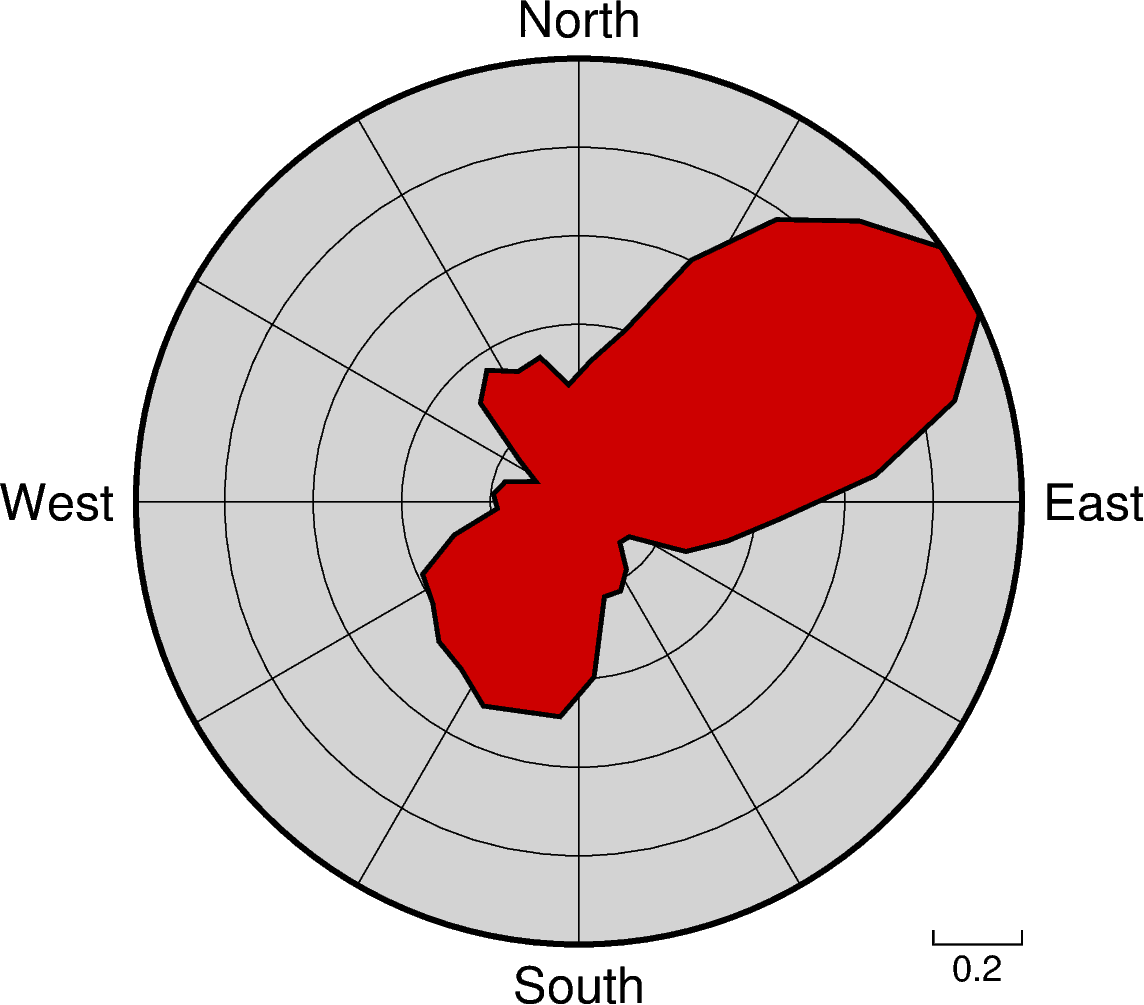

In [55]:
import pygmt

# Load sample compilation of fracture lengths and azimuth as
# hypothetically digitized from geological maps
data = pygmt.datasets.load_fractures_compilation()

fig = pygmt.Figure()

fig.rose(
    # use columns of the sample dataset as input for the length and azimuth
    # parameters
    length=data.length,
    azimuth=data.azimuth,
    # specify the "region" of interest in the (r,azimuth) space
    # [r0, r1, az0, az1], here, r0 is 0 and r1 is 1, for azimuth, az0 is 0 and
    # az1 is 360 which means we plot a full circle between 0 and 360 degrees
    region=[0, 1, 0, 360],
    # set the diameter of the rose diagram to 7.5 cm
    diameter="7.5c",
    # define the sector width in degrees, we append +r here to draw a rose
    # diagram instead of a sector diagram
    sector="10+r",
    # normalize bin counts by the largest value so all bin counts range from
    # 0 to 1
    norm=True,
    # use red3 as color fill for the sectors
    color="red3",
    # define the frame with ticks and gridlines every 0.2
    # length unit in radial direction and every 30 degrees
    # in azimuthal direction, set background color to
    # lightgray
    frame=["x0.2g0.2", "y30g30", "+glightgray"],
    # use a pen size of 1p to draw the outlines
    pen="1p",
)

fig.show()

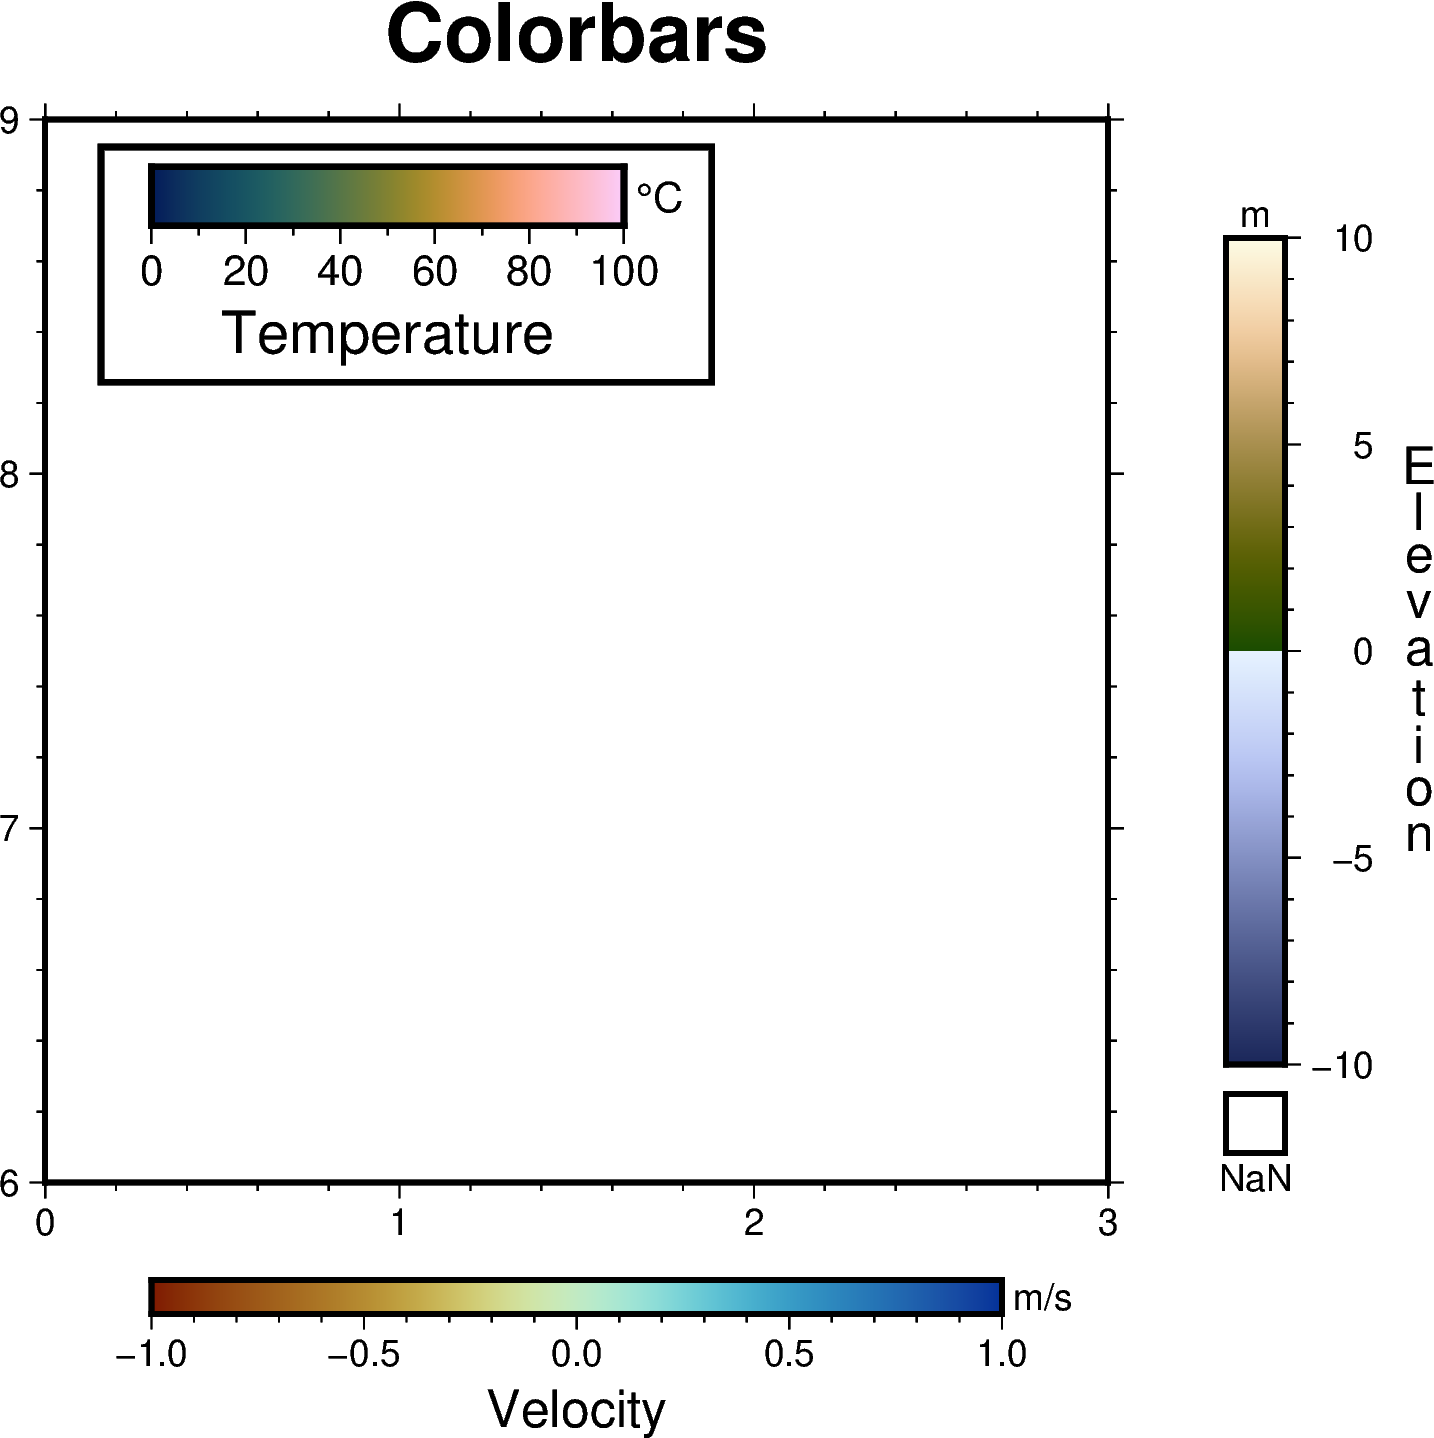

In [56]:
import pygmt

fig = pygmt.Figure()
fig.basemap(region=[0, 3, 6, 9], projection="x3c", frame=["af", 'WSne+t"Colorbars"'])

## Create a colorbar designed for seismic tomography - roma
# Colorbar is placed at bottom center (BC) by default if no position is given
fig.colorbar(cmap="roma", frame=["x+lVelocity", "y+lm/s"])

## Create a colorbar showing the scientific rainbow - batlow
fig.colorbar(
    cmap="batlow",
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g0.3/8.7+w4c/0.5c+h",
    box=True,
    frame=["x+lTemperature", r"y+l\260C"],
    scale=100,
)

## Create a colorbar suitable for surface topography - oleron
fig.colorbar(
    cmap="oleron",
    # Colorbar position justified outside map frame (J) at Middle Right (MR),
    # offset (+o) by 1 cm horizontally and 0 cm vertically from anchor point,
    # with a length/width (+w) of 7 cm by 0.5 cm and a box for NaN values (+n)
    position="JMR+o1c/0c+w7c/0.5c+n+mc",
    # Note that the label 'Elevation' is moved to the opposite side and plotted
    # vertically as a column of text using '+mc' in the position parameter
    # above
    frame=["x+lElevation", "y+lm"],
    scale=10,
)

fig.show()

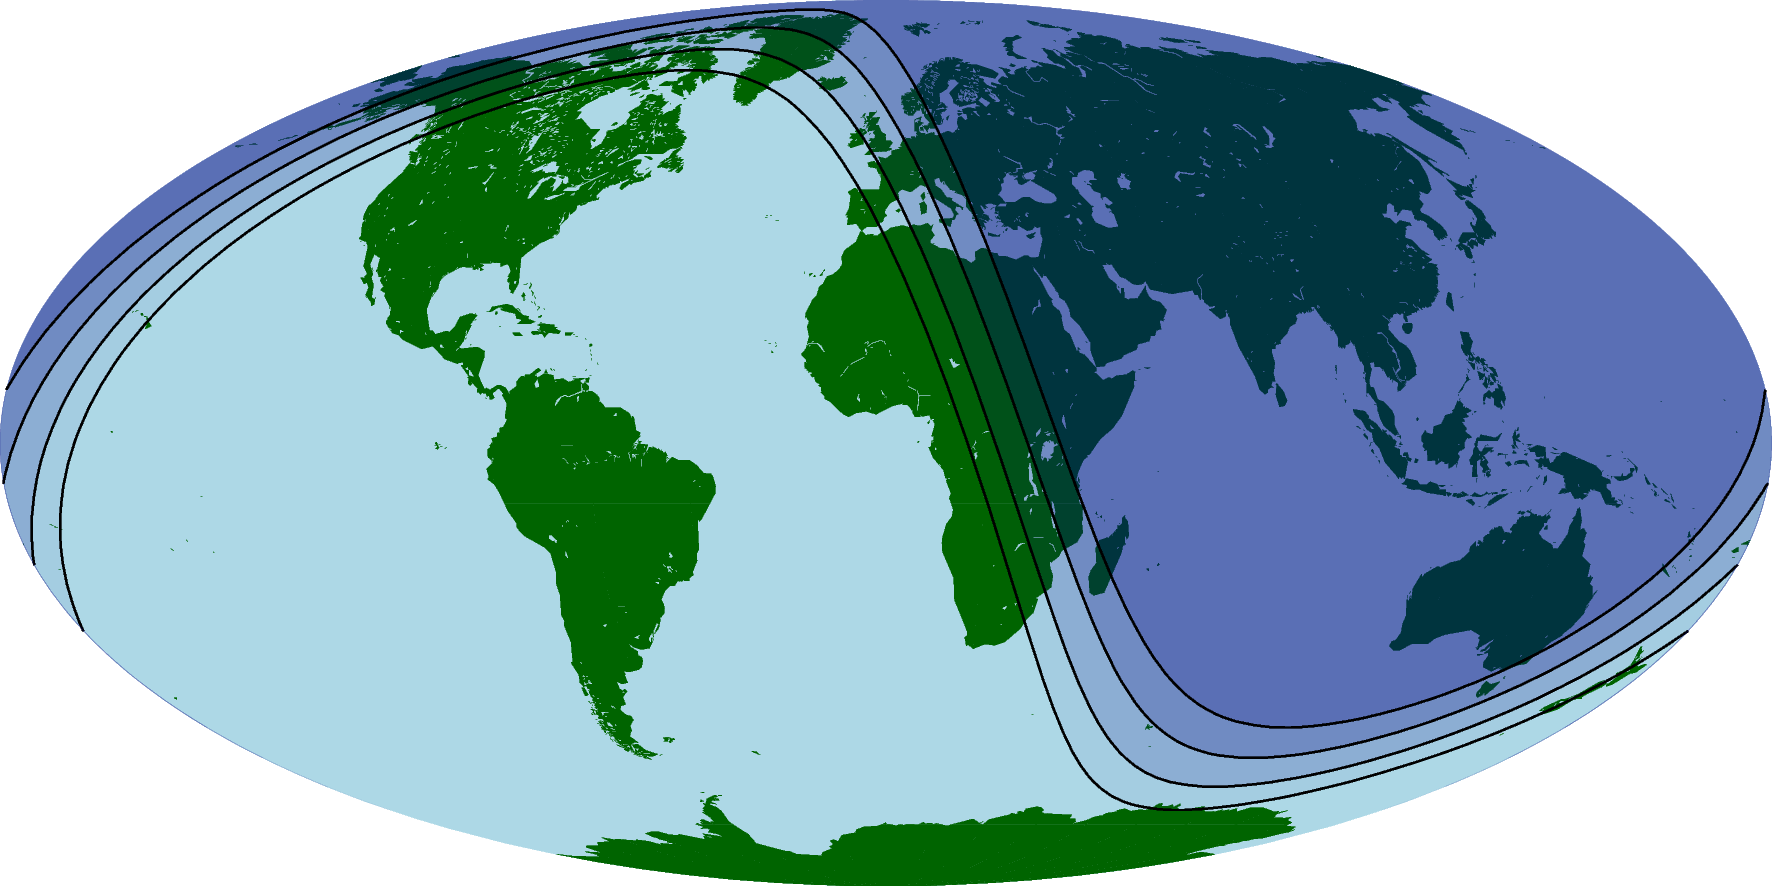

In [57]:
import datetime

import pygmt

fig = pygmt.Figure()
# Create a figure showing the global region on a Mollweide projection
# Land color is set to dark green and water color is set to light blue
fig.coast(region="d", projection="W0/15c", land="darkgreen", water="lightblue")
# Set a time for the day-night terminator and twilights, 1700 UTC on
# January 1, 2000
terminator_datetime = datetime.datetime(
    year=2000, month=1, day=1, hour=17, minute=0, second=0
)
# Set the pen line to be 0.5p thick
# Set the fill for the night area to be navy blue at different transparency
# levels
fig.solar(
    terminator="day_night",
    terminator_datetime=terminator_datetime,
    fill="navyblue@95",
    pen="0.5p",
)
fig.solar(
    terminator="civil",
    terminator_datetime=terminator_datetime,
    fill="navyblue@85",
    pen="0.5p",
)
fig.solar(
    terminator="nautical",
    terminator_datetime=terminator_datetime,
    fill="navyblue@80",
    pen="0.5p",
)
fig.solar(
    terminator="astronomical",
    terminator_datetime=terminator_datetime,
    fill="navyblue@80",
    pen="0.5p",
)
fig.show()

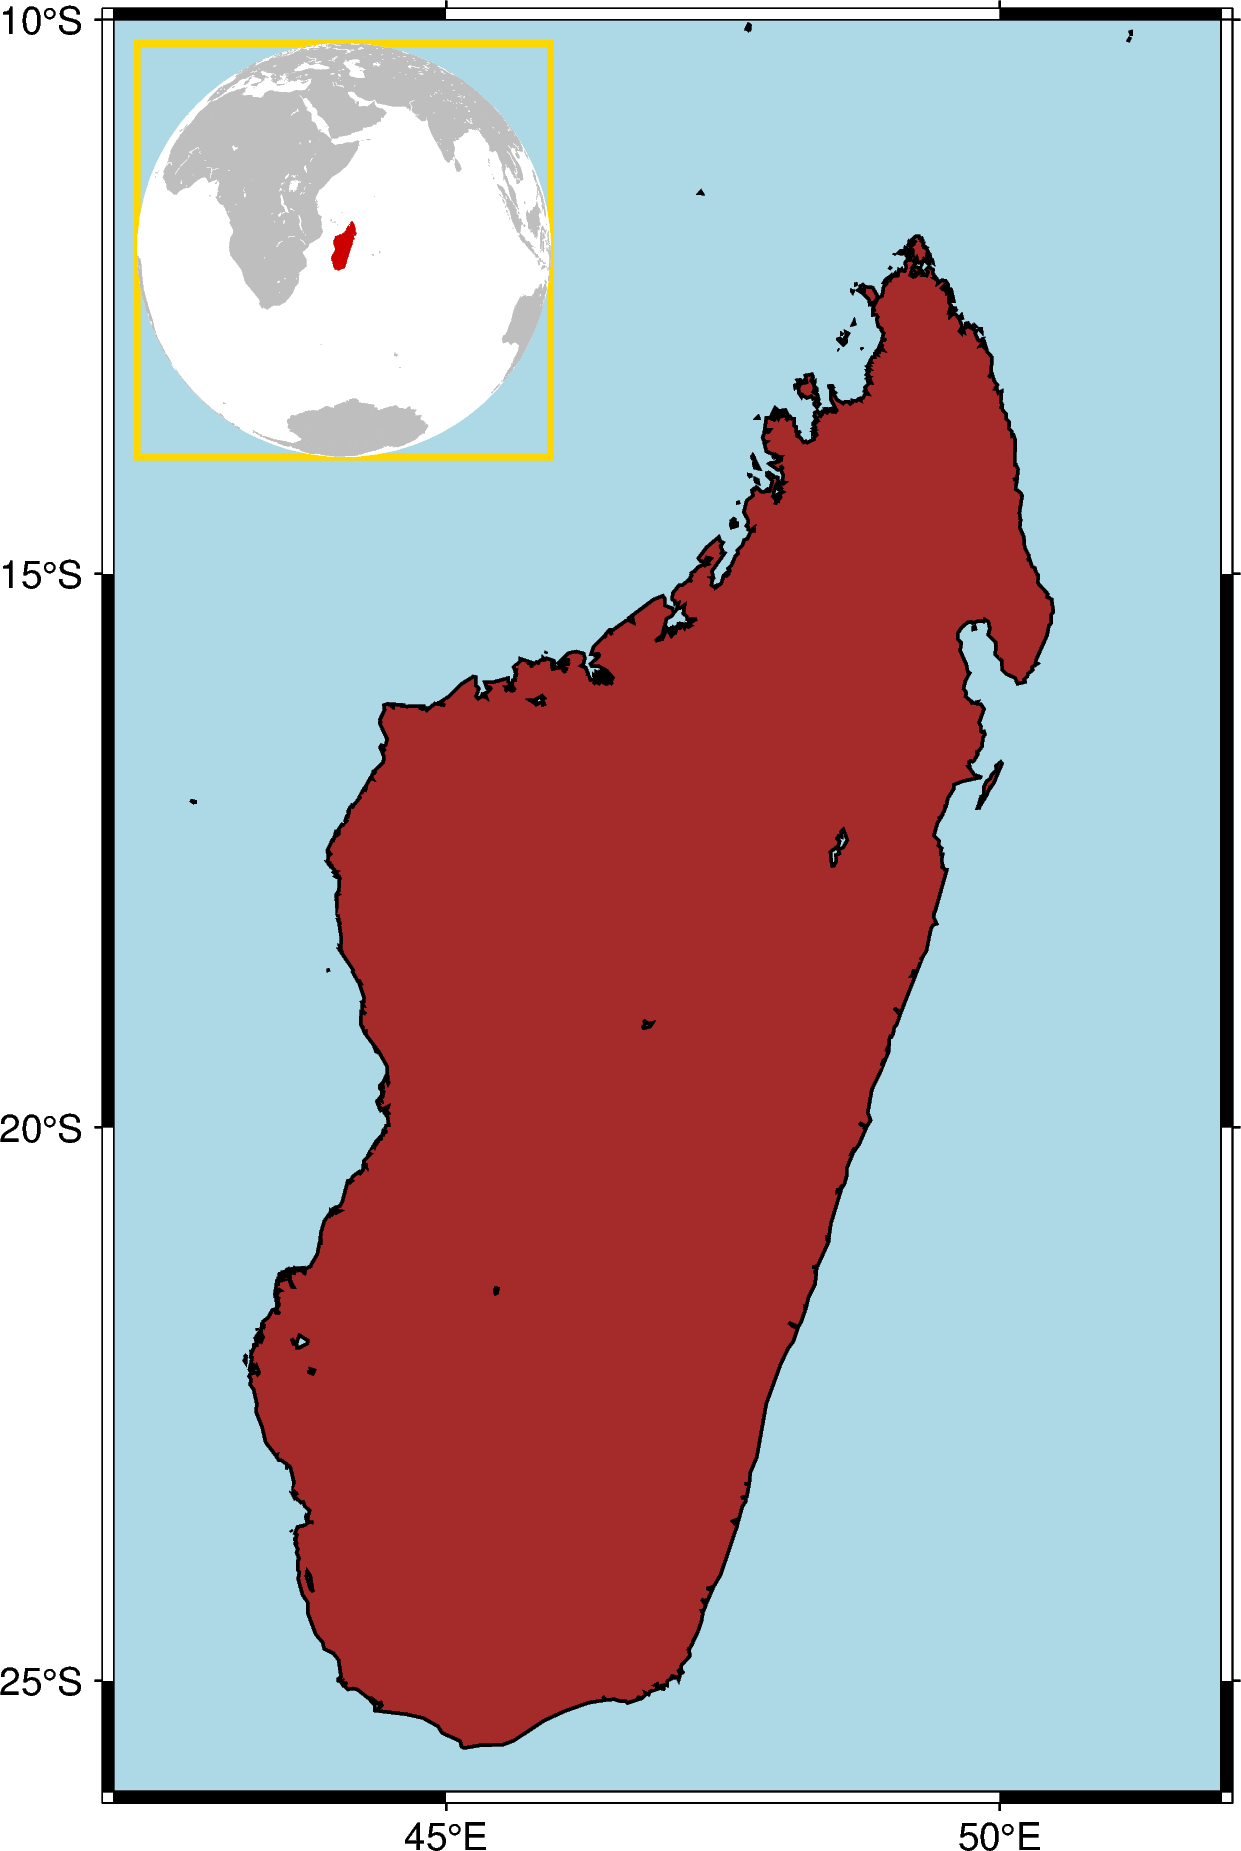

In [58]:
import pygmt

fig = pygmt.Figure()
# Create the primary figure, setting the region to Madagascar, the land color
# to "brown", the water to "lightblue", the shorelines width to "thin", and
# adding a frame
fig.coast(region="MG+r2", land="brown", water="lightblue", shorelines="thin", frame="a")
# Create an inset, setting the position to top left, the width to 3.5 cm, and
# the x- and y-offsets to 0.2 cm. The margin is set to 0, and the border is
# "gold" with a pen size of 1.5p.
with fig.inset(position="jTL+w3.5c+o0.2c", margin=0, box="+p1.5p,gold"):
    # Create a figure in the inset using coast. This example uses the azimuthal
    # orthogonal projection centered at 47E, 20S. The land color is set to
    # "gray" and Madagascar is highlighted in "red3".
    fig.coast(
        region="g",
        projection="G47/-20/?",
        land="gray",
        water="white",
        dcw="MG+gred3",
    )
fig.show()

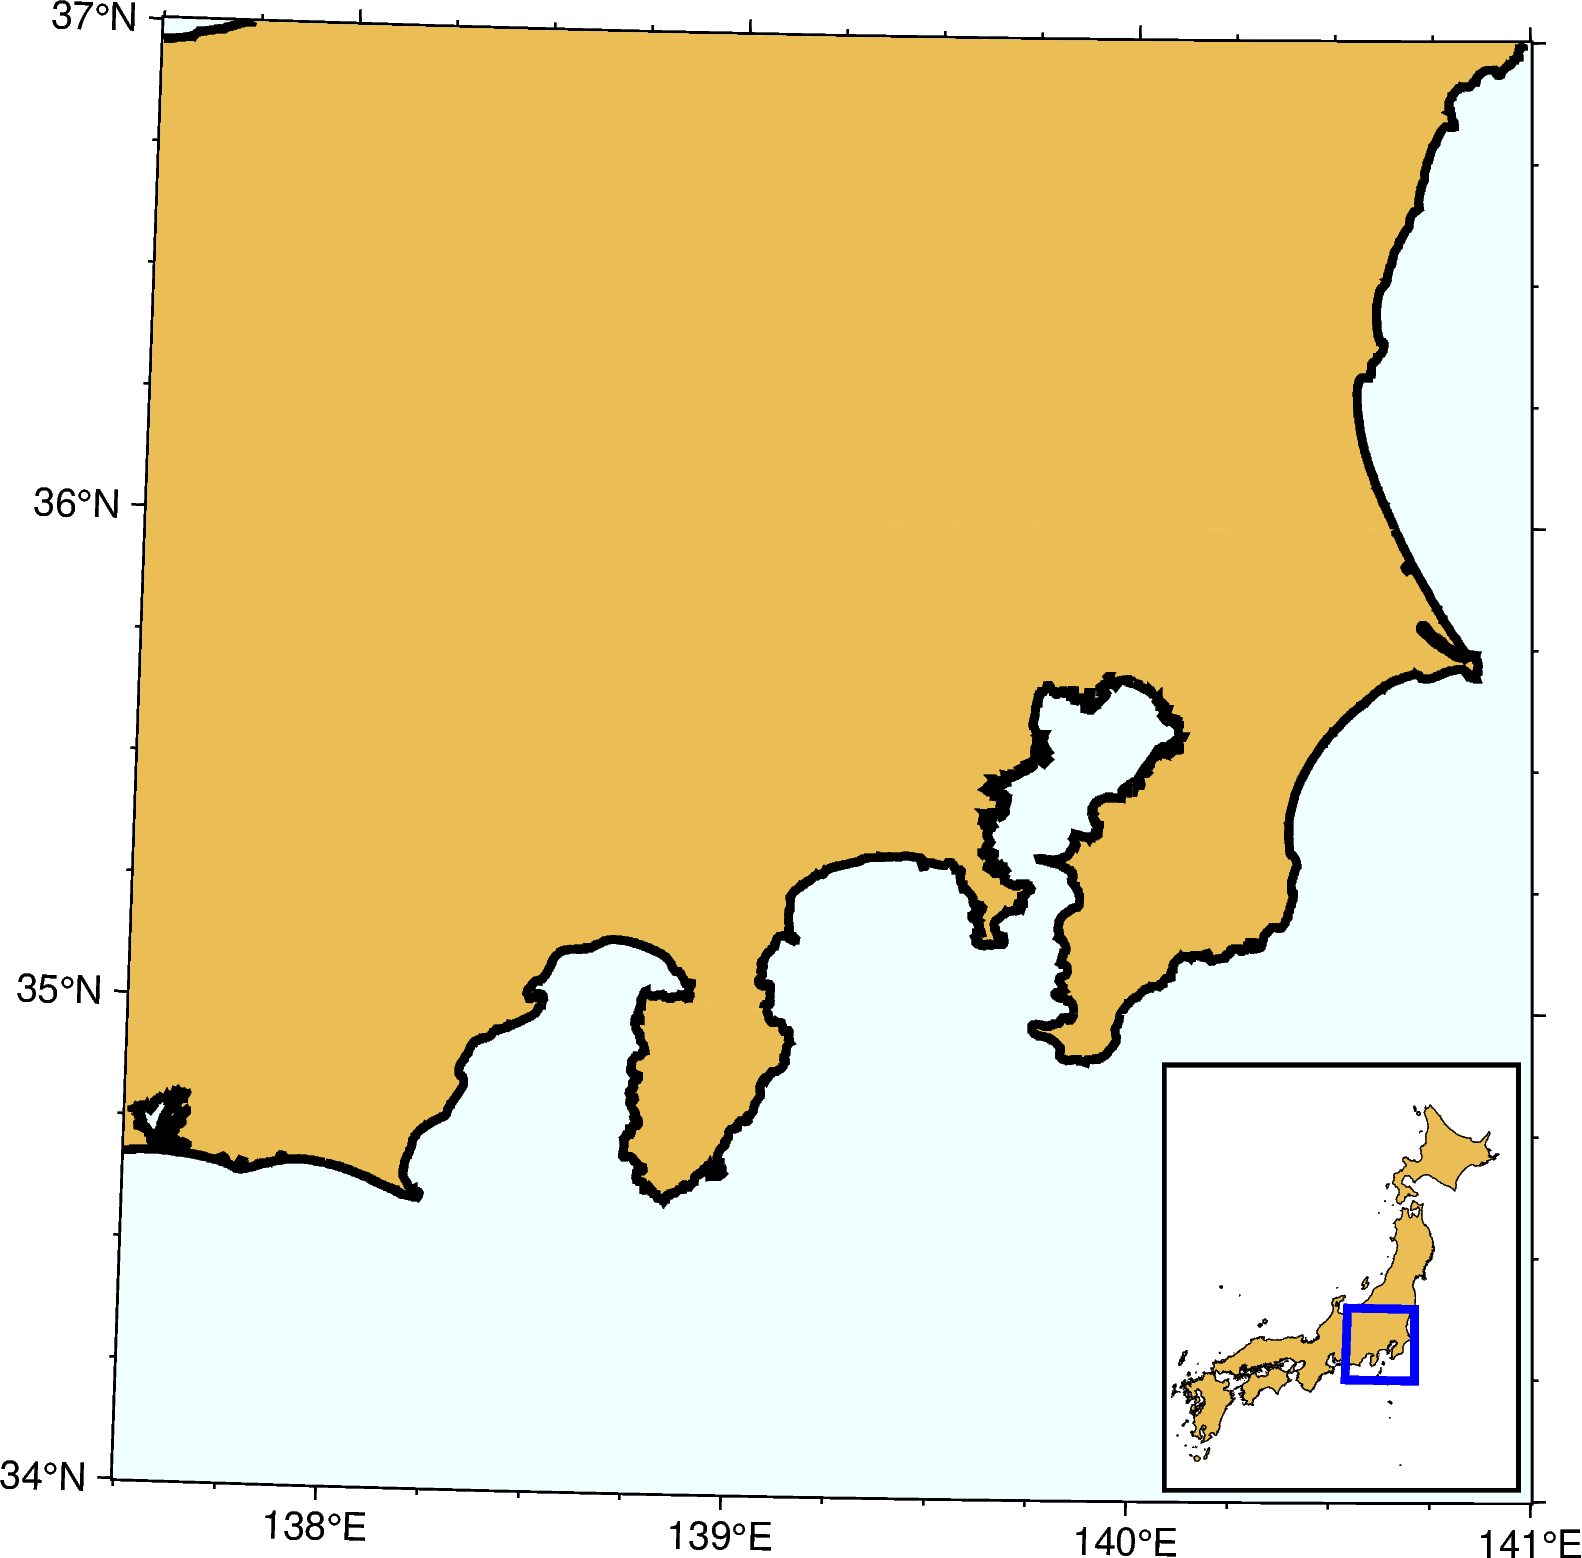

In [59]:
import pygmt

# Set the region of the main figure
region = [137.5, 141, 34, 37]

fig = pygmt.Figure()

# Plot the base map of the main figure. Universal Transverse Mercator (UTM)
# projection is used and the UTM zone is set to be "54S".
fig.basemap(region=region, projection="U54S/12c", frame=["WSne", "af"])

# Set the land color to "lightbrown", the water color to "azure1", the
# shoreline width to "2p", and the area threshold to 1000 km^2 for the main
# figure
fig.coast(land="lightbrown", water="azure1", shorelines="2p", area_thresh=1000)

# Create an inset map, setting the position to bottom right, the width to
# 3 cm, the height to 3.6 cm, and the x- and y-offsets to
# 0.1 cm, respectively. Draws a rectangular box around the inset with a fill
# color of "white" and a pen of "1p".
with fig.inset(position="jBR+w3c/3.6c+o0.1c", box="+gwhite+p1p"):
    # Plot the Japan main land in the inset using coast. "U54S/?" means UTM
    # projection with map width automatically determined from the inset width.
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    fig.coast(
        region=[129, 146, 30, 46],
        projection="U54S/?",
        dcw="JP+glightbrown+p0.2p",
        area_thresh=10000,
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main
    # figure. "+s" means that the first two columns are the longitude and
    # latitude of the bottom left corner of the rectangle, and the last two
    # columns the longitude and latitude of the uppper right corner.
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="2p,blue")

fig.show()

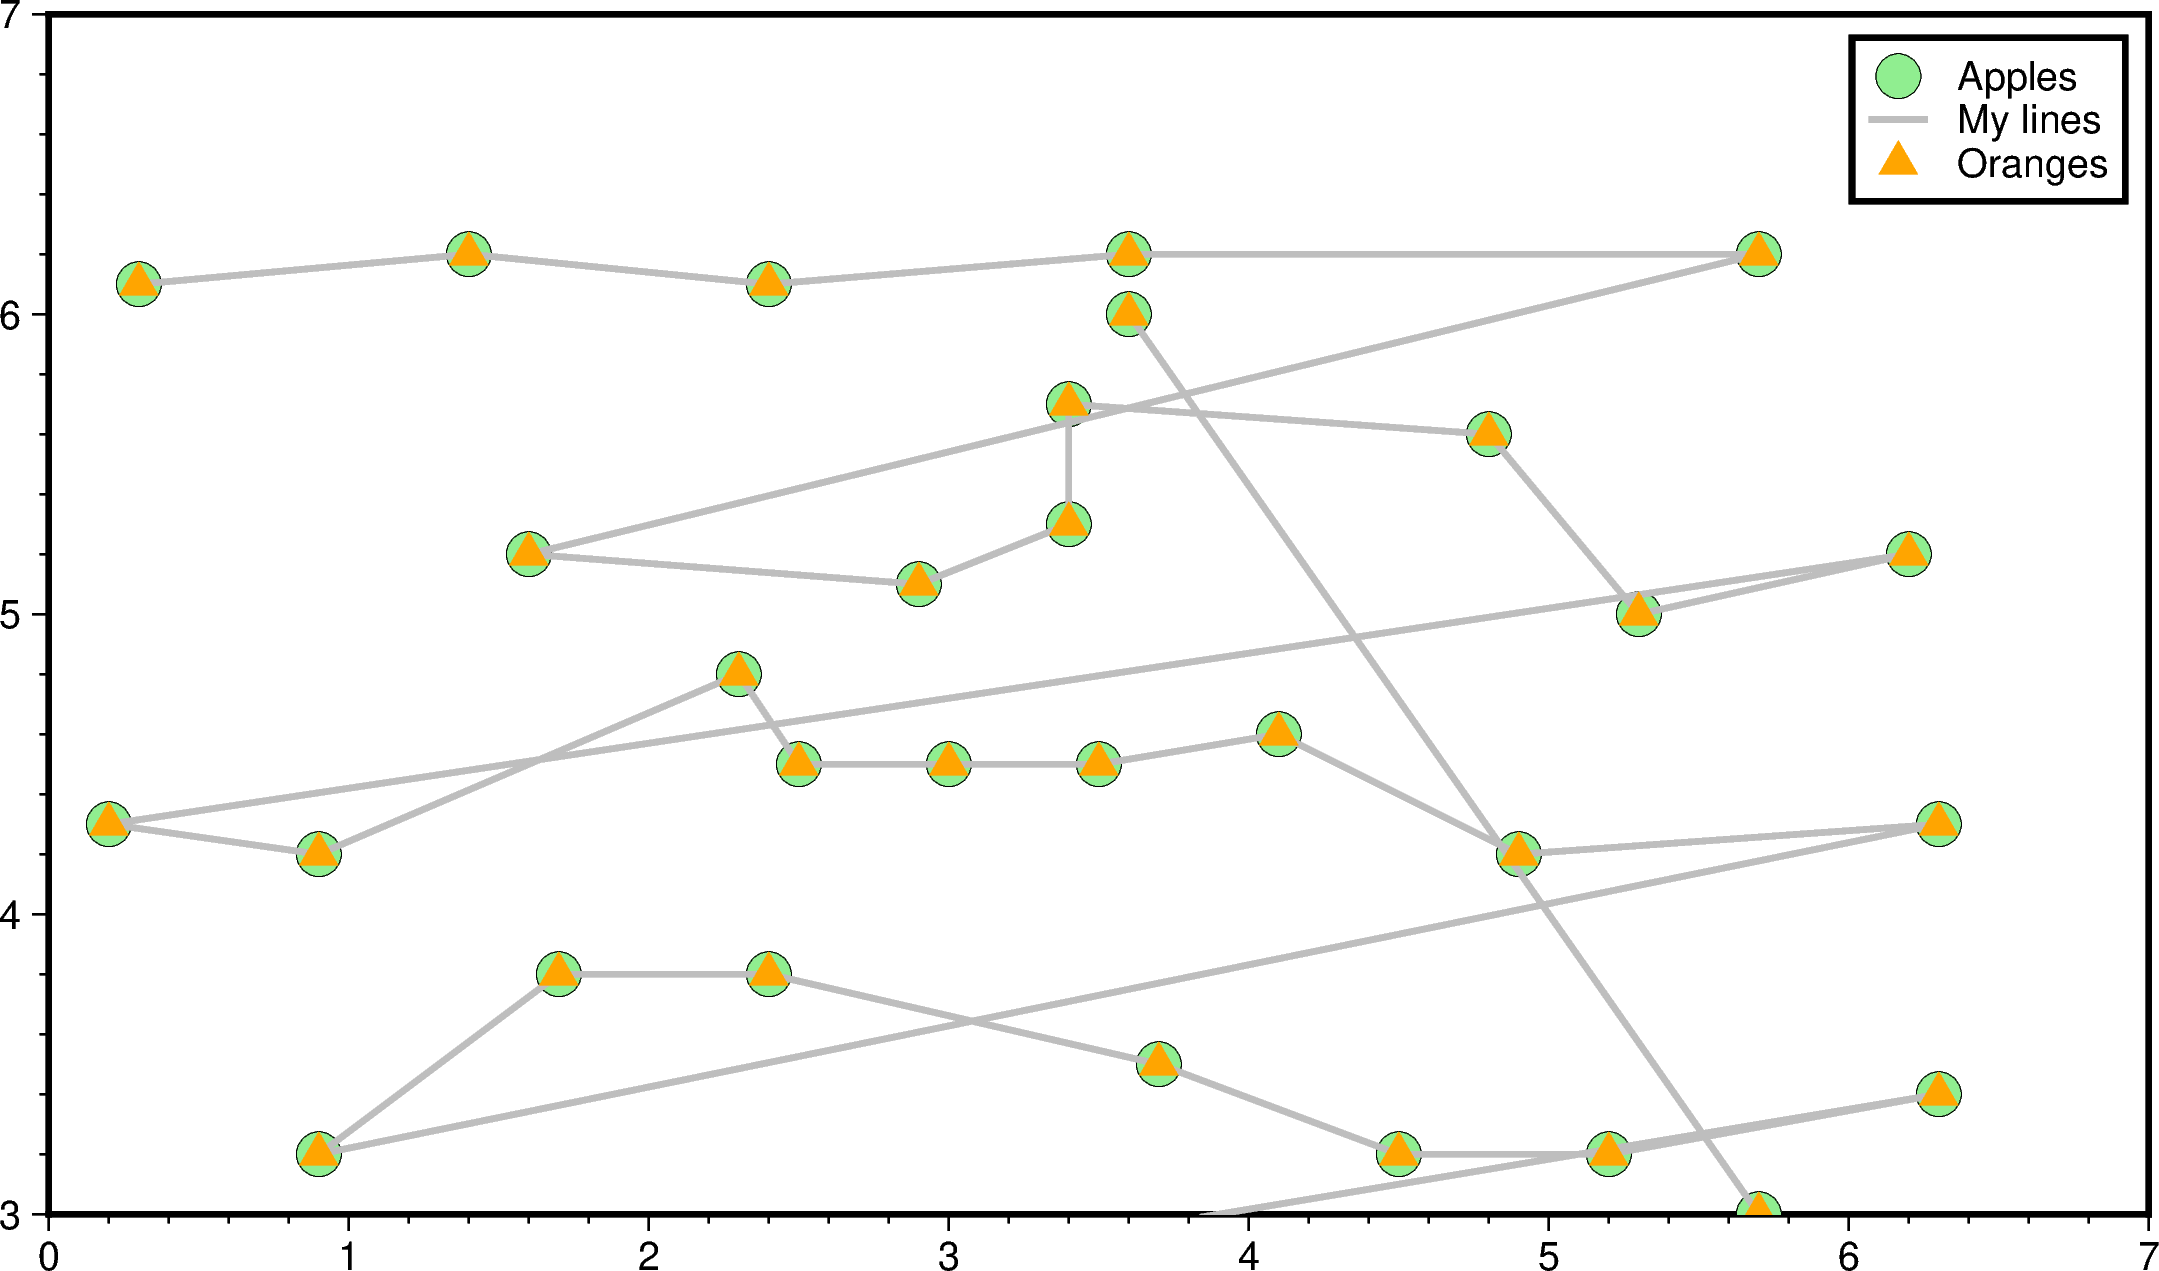

In [60]:
import pygmt

fig = pygmt.Figure()

fig.basemap(projection="x1i", region=[0, 7, 3, 7], frame=True)

fig.plot(
    data="@Table_5_11.txt",
    style="c0.15i",
    color="lightgreen",
    pen="faint",
    label="Apples",
)
fig.plot(data="@Table_5_11.txt", pen="1.5p,gray", label='"My lines"')
fig.plot(data="@Table_5_11.txt", style="t0.15i", color="orange", label="Oranges")

fig.legend(position="JTR+jTR+o0.2c", box=True)

fig.show()

In [ ]:
"""
Multiple colormaps
------------------
This gallery example shows how to create multiple colormaps for different
subplots. To better understand how GMT modern mode maintains several levels of
colormaps, please refer to
:gmt-docs:`cookbook/features.html#gmt-modern-mode-hierarchical-levels` for
details.
"""
import pygmt

fig = pygmt.Figure()

# Load Earth relief data for the entire globe and a subset region
grid_globe = pygmt.datasets.load_earth_relief(resolution="01d")
subset_region = [-14, 30, 35, 60]
grid_subset = pygmt.datasets.load_earth_relief(resolution="10m", region=subset_region)

# Define a 1-row, 2-column subplot layout. The overall figure dimensions is set
# to be 15 cm wide and 8 cm high. Each subplot is automatically labelled.
# The space between the subplots is set to be 0.5 cm.
with fig.subplot(
    nrows=1, ncols=2, figsize=("15c", "8c"), autolabel=True, margins="0.5c"
):
    # Activate the first panel so that the colormap created by the makecpt
    # method is a panel-level CPT
    with fig.set_panel(panel=0):
        pygmt.makecpt(cmap="geo", series=[-8000, 8000])
        # "R?" means Winkel Tripel projection with map width automatically
        # determined from the subplot width.
        fig.grdimage(grid=grid_globe, projection="R?", region="g", frame=True)
        fig.colorbar(frame=["a4000f2000", "x+lElevation", "y+lm"])
    # Activate the second panel so that the colormap created by the makecpt
    # method is a panel-level CPT
    with fig.set_panel(panel=1):
        pygmt.makecpt(cmap="globe", series=[-6000, 3000])
        # "M?" means Mercator projection with map width also automatically
        # determined from the subplot width.
        fig.grdimage(
            grid=grid_subset, projection="M?", region=subset_region, frame=True
        )
        fig.colorbar(frame=["a2000f1000", "x+lElevation", "y+lm"])

fig.show()